About Dataset

Problem Statement

A telecommunication company wants to analyze its customer’s behavior. Given the following dataset, build a solution that aims to provide meaningful insights to the telecommunication company. The solution can be in the form of an AI model, dashboard, or analysis report. If participants plan to build an AI model, participants are free to decide features, labels, and metrics when building the model. You are expected to propose an innovative solution from the dataset.
Dataset Description

The dataset shows the usage of telecommunication services in Q3 of a particular year adapted from a Kaggle public dataset with several modifications. There are several columns provided in the dataset:

**Customer ID** (A unique customer identifier)

**Tenure Months** (How long the customer has been with the company by the end of the quarter specified above)

**Location** (Customer's residence - City)

**Device Class** (Device classification)

**Games Product** (Whether the customer uses the internet service for games product)

**Music Product** (Whether the customer uses the internet service for music product)

**Education Product** (Whether the customer uses the internet service for education product)

**Call Center** (Whether the customer uses the call center service)

**Video Product** (Whether the customer uses video product service)

**Use MyApp** (Whether the customer uses MyApp service)

**Payment Method** (The method used for paying the bill)

**Monthly Purchase** (Total customer’s monthly spent for all services with the unit of thousands of IDR)

**Churn Label** (Whether the customer left the company in this quarter)

**Longitude** (Customer’s residence - Longitude)

**Latitude** (Customer’s residence - Latitude)

**CLTV Scoring** (Customer Lifetime Value with the unit of thousands of IDR - Calculated using company's formulas)

In [148]:
import pandas as pd

df = pd.read_excel('Telco_customer_churn_adapted_v2.xlsx')

In [2]:
df['Tenure Months'].min()

0

## Missing Value Check

In [3]:
df.isna().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

## Exploratory Data Analysis

### 1. Univariate Analysis

In [4]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np

In [5]:
def plot_pie_charts(df, columns, ncols=3):
    # Calculate the number of rows needed for the grid layout
    nrows = math.ceil(len(columns) / ncols)

    # Create a grid of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

    for col, ax in zip(columns, axes.flat):
        values = df[col].value_counts()
        labels = values.index
        sizes = values.values
        total = sum(sizes)

        wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * total / 100))
        ax.set_title(f'Proportion of {col}')
        ax.axis('equal')  # Equal aspect ratio ensures that pies are drawn as circles
        ax.legend(wedges, labels, title='Categories', loc='upper right')

    # Remove any empty subplots
    for i in range(len(columns), nrows * ncols):
        fig.delaxes(axes.flat[i])

    plt.tight_layout()
    plt.show()

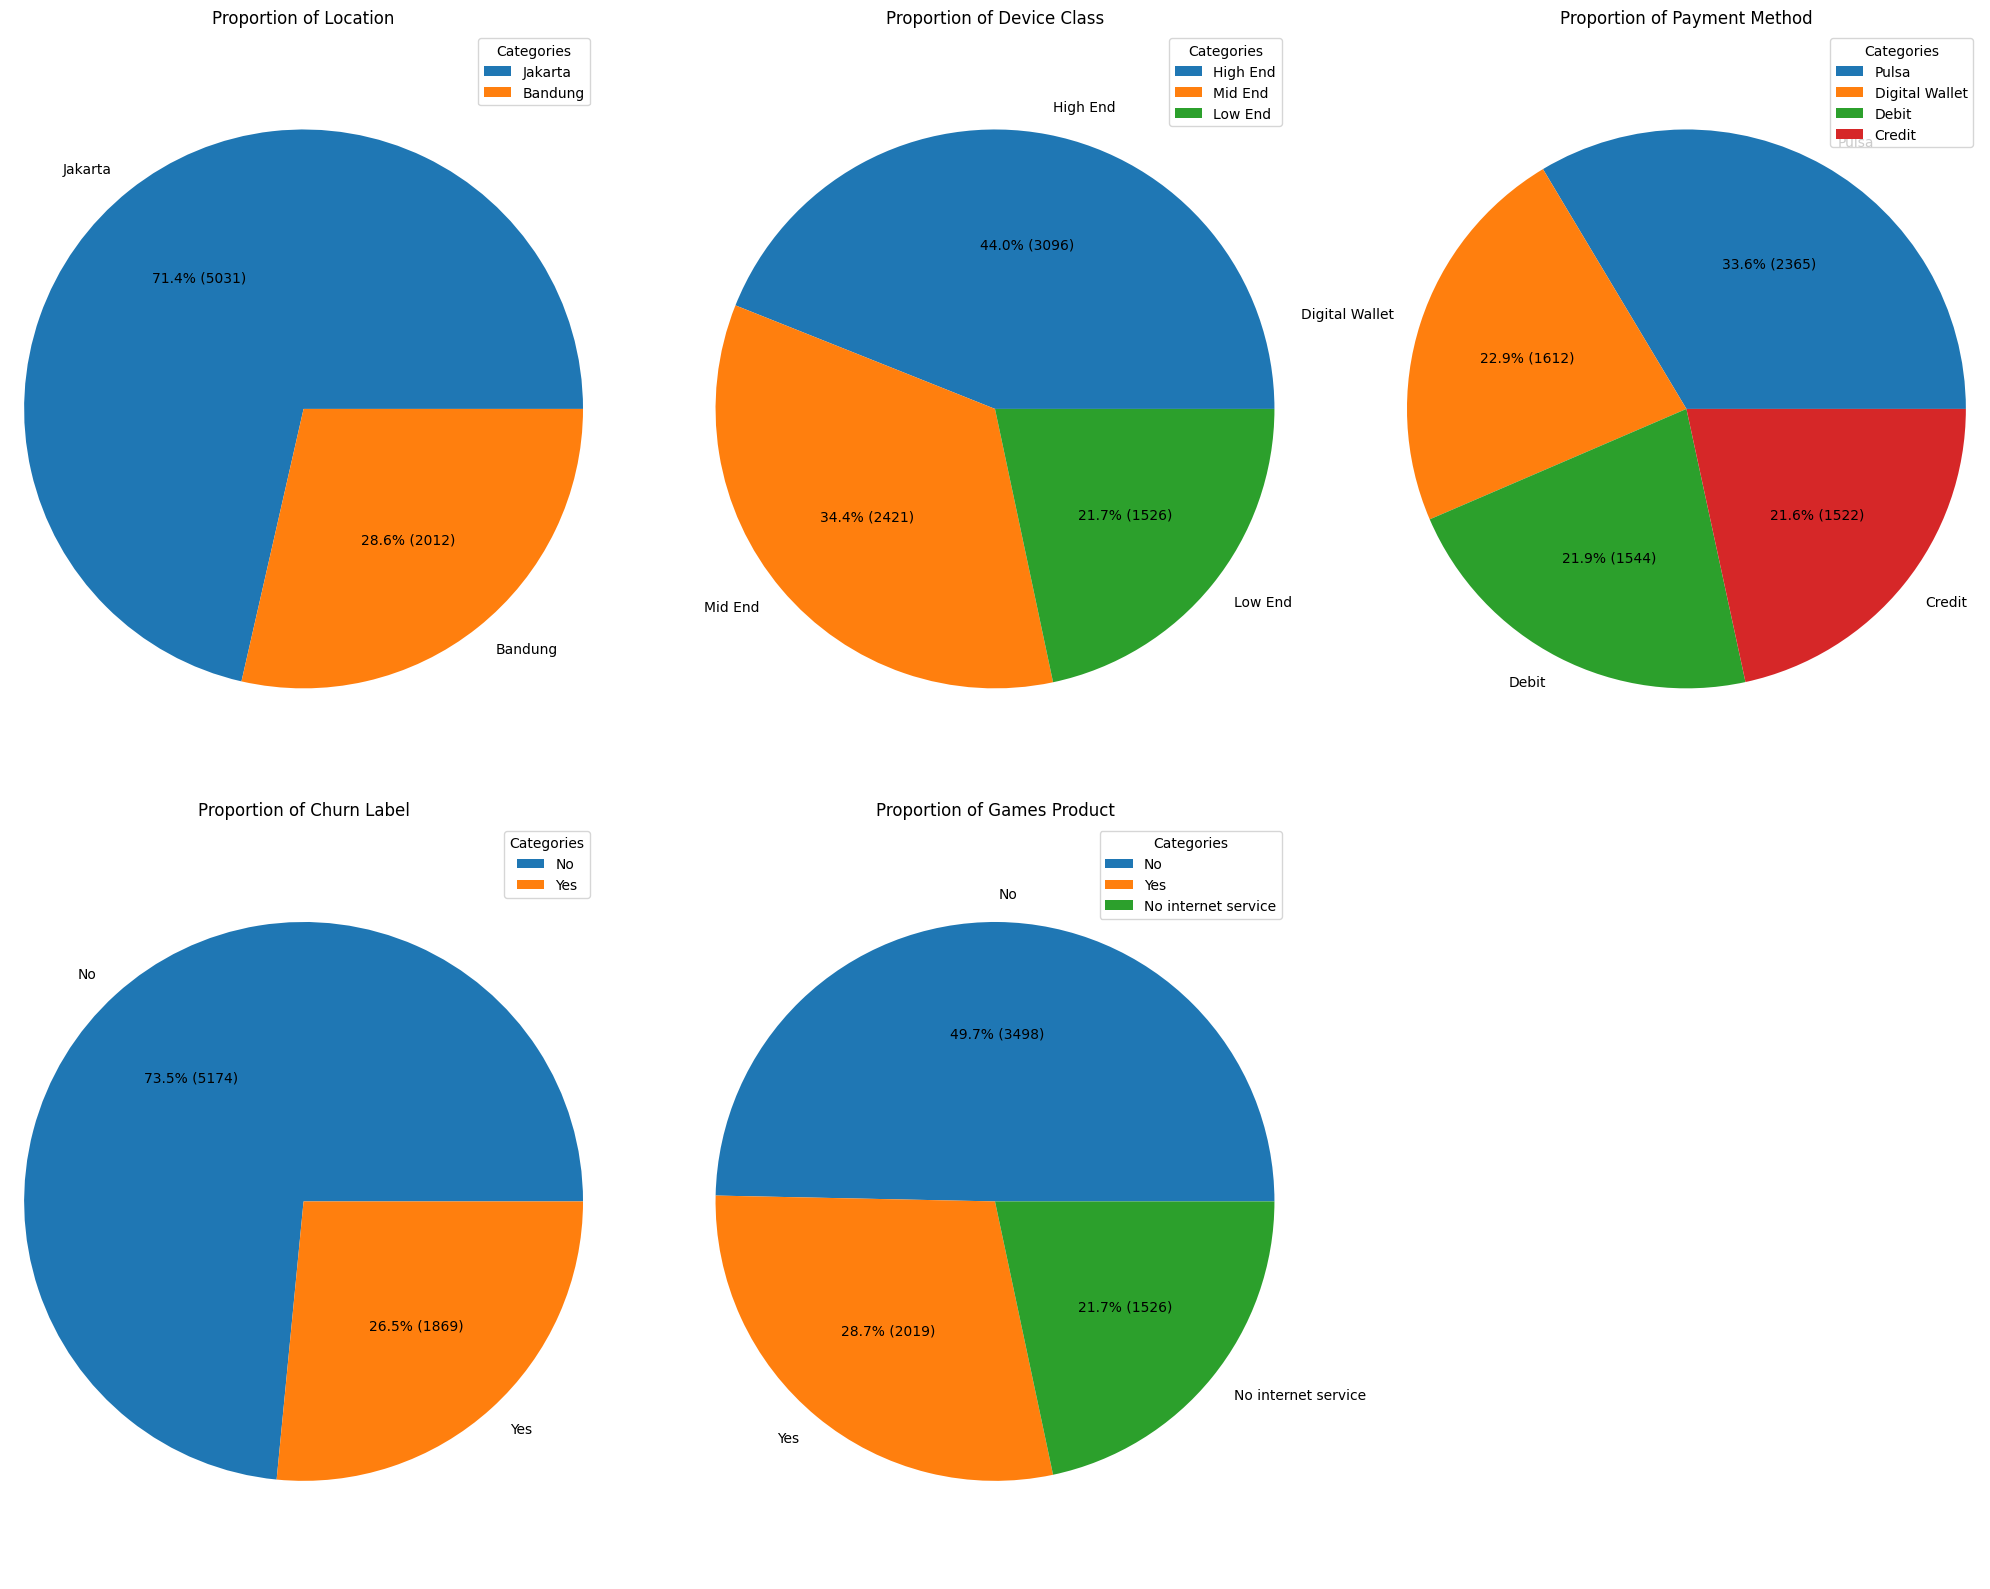

In [6]:
plot_pie_charts(df, ['Location', 'Device Class', 'Payment Method', 'Churn Label', 'Games Product'])

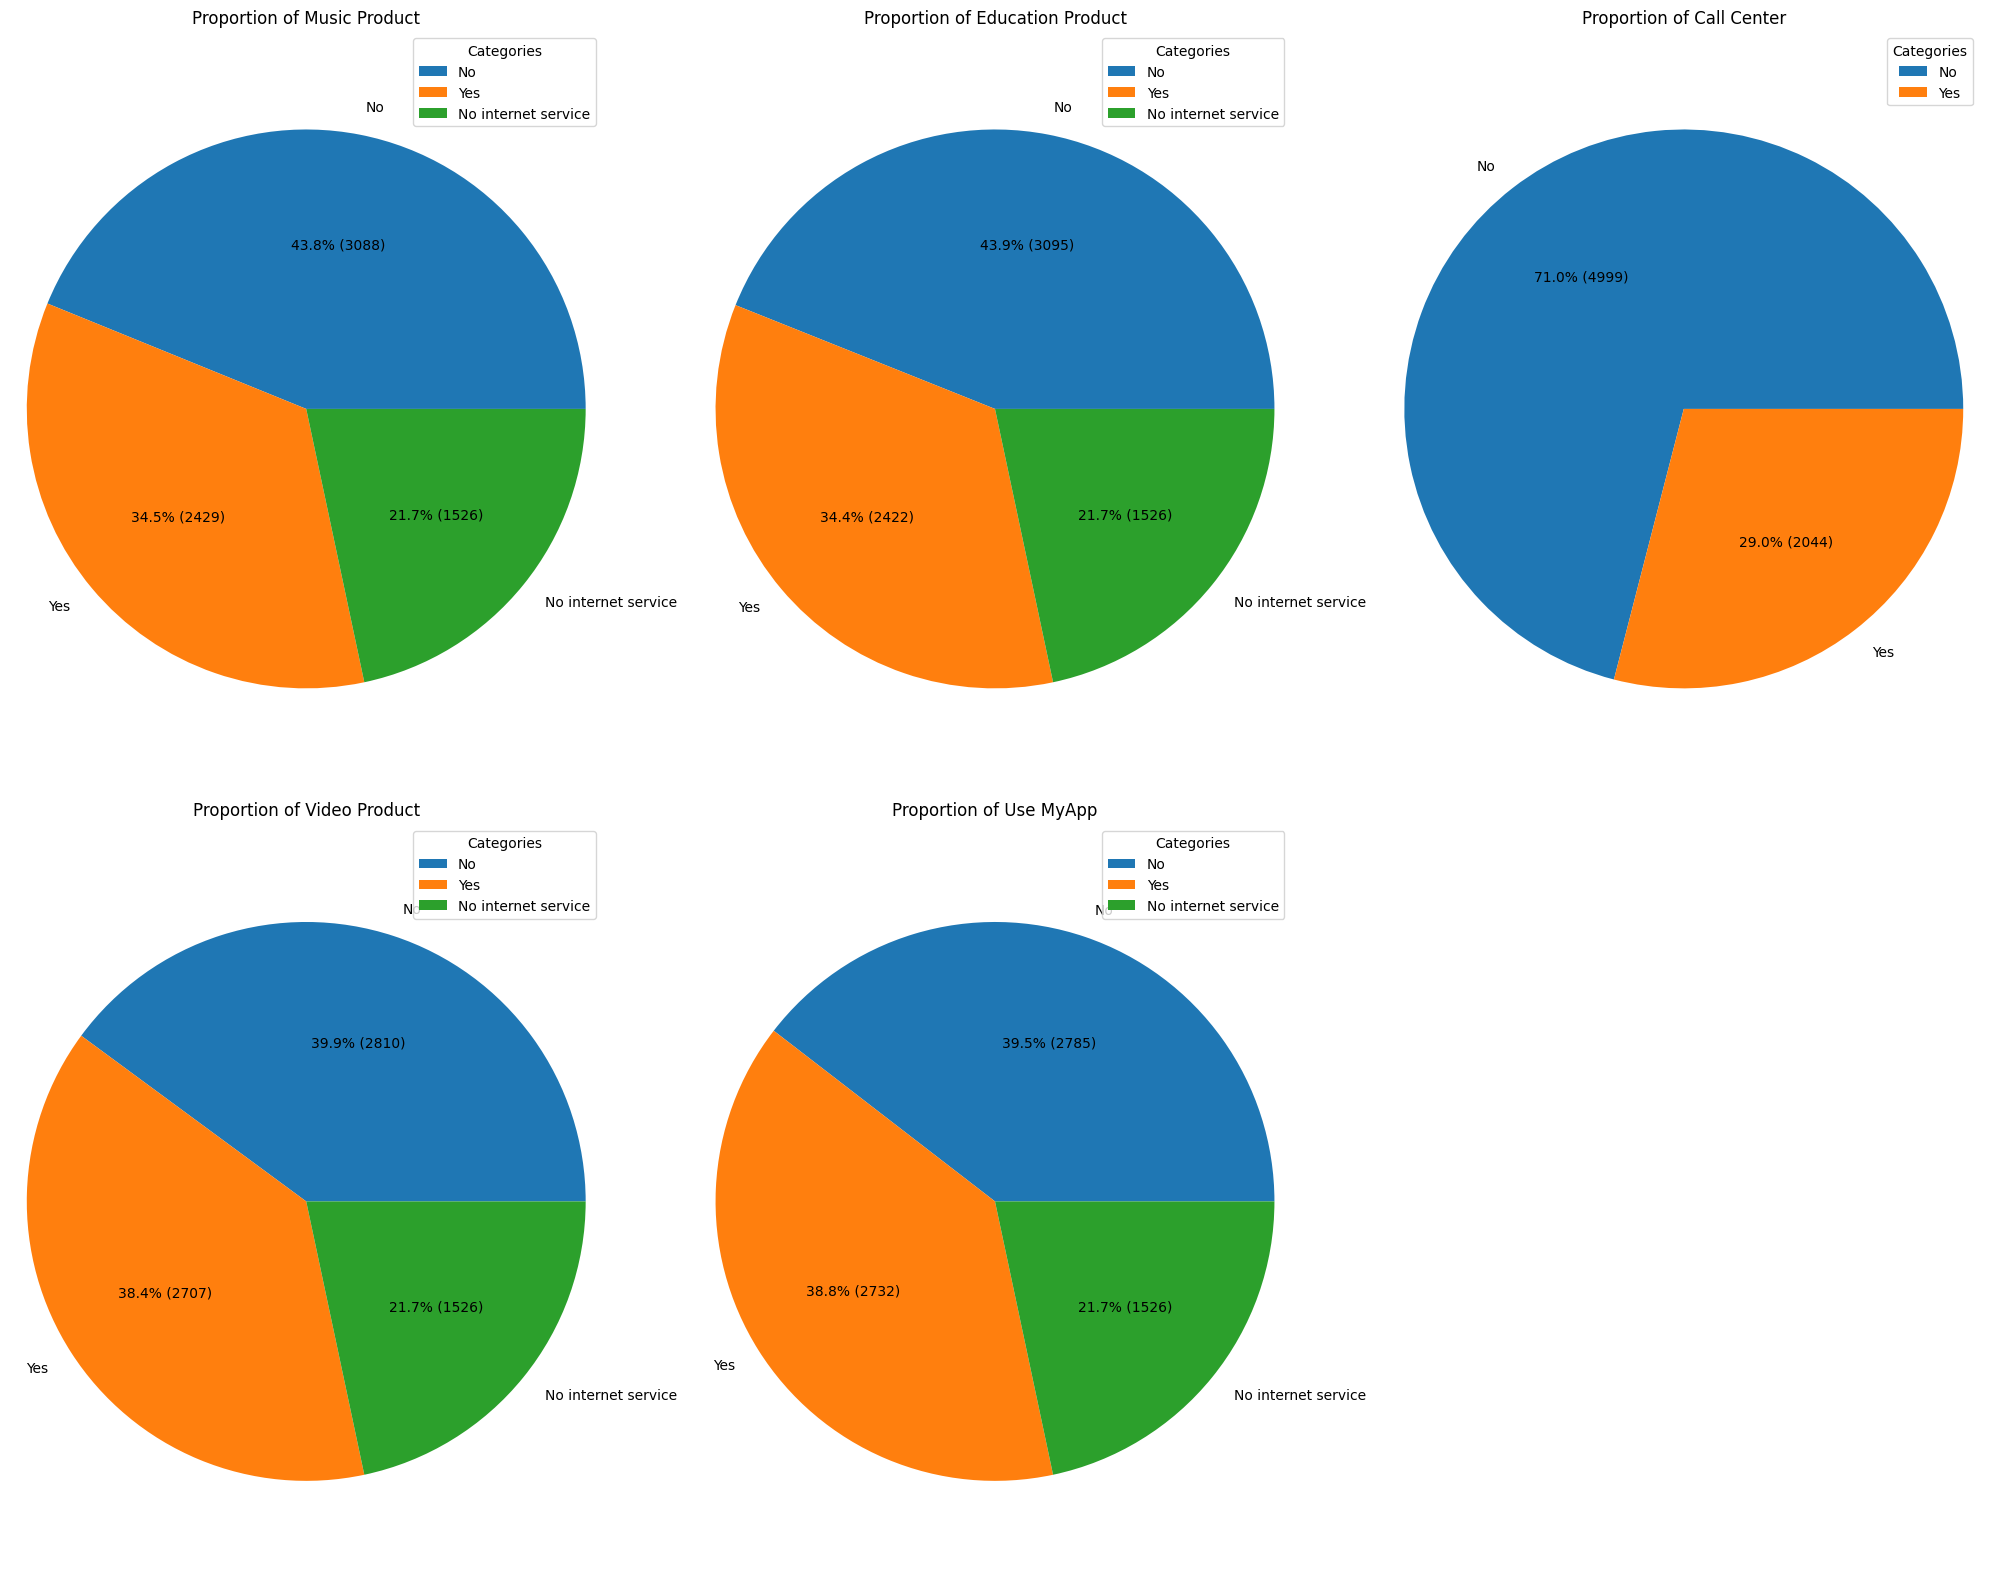

In [7]:
plot_pie_charts(df, ['Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp'])

In [8]:
def plot_multiple_histograms(df, columns):
    num_plots = len(columns)
    num_cols = 3  # Number of columns in the grid
    num_rows = math.ceil(num_plots / num_cols)

    # Set up the grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.ravel()  # Flatten the axes into a 1D array for easy iteration

    for i, column in enumerate(columns):
        ax = axes[i]

        # Create a histogram with 'density' stat and blue color
        sns.histplot(data=df, x=column, kde=False, stat='density', color='blue', ax=ax, bins=20)
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')

        # Overlay a KDE plot with red color
        sns.kdeplot(data=df, x=column, color='red', ax=ax)

        # Calculate mean and median
        mean = np.mean(df[column])
        median = np.median(df[column])

        # Add mean and median lines
        ax.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
        ax.axvline(median, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

        # Calculate quartiles and IQR for identifying outliers
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Add lines for quartiles and outliers if they exist
        ax.axvline(Q1, color='b', linestyle='dashed', linewidth=2, label=f'25th Percentile: {Q1:.2f}')
        ax.axvline(Q3, color='c', linestyle='dashed', linewidth=2, label=f'75th Percentile: {Q3:.2f}')

        outliers_exist = (df[column] < lower_bound) | (df[column] > upper_bound)
        if any(outliers_exist):
            ax.axvline(lower_bound, color='m', linestyle='dashed', linewidth=2, label='Lower Bound (Outliers)')
            ax.axvline(upper_bound, color='y', linestyle='dashed', linewidth=2, label='Upper Bound (Outliers)')

        # Show legend
        ax.legend()

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

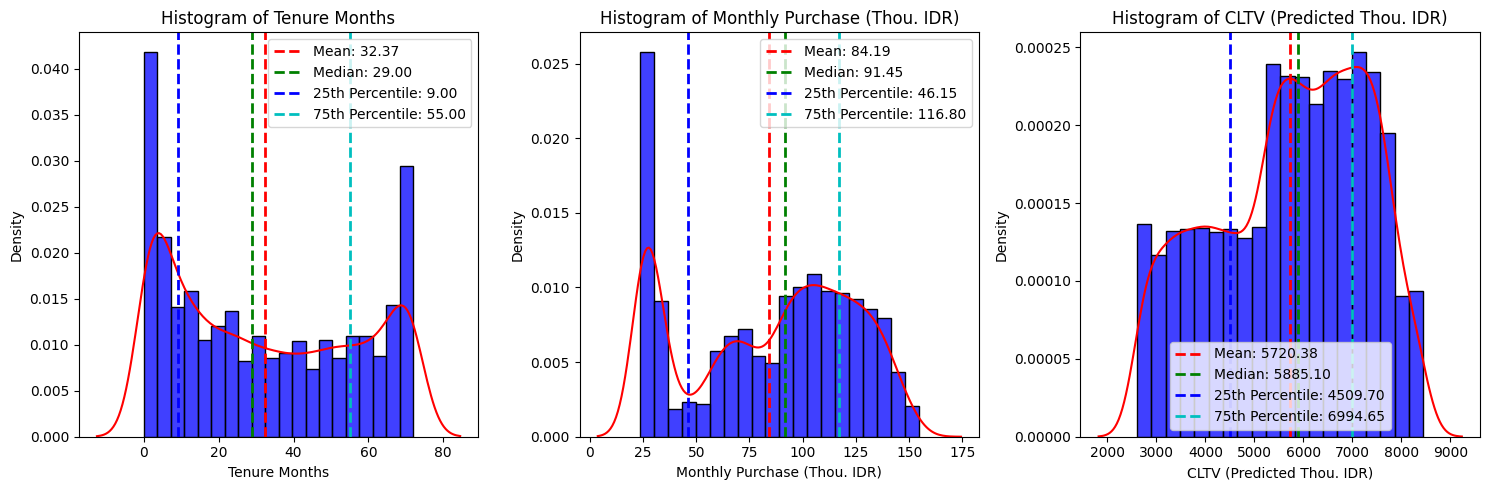

In [9]:
plot_multiple_histograms(df, ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

### 2. Multivariate Analysis

#### 2.1. Are there any differences between Jakarta and Bandung Customers?

##### 2.1.1. How is the distribution of the data in each city?

In [10]:
def plot_comparison_pie_charts(df, columns_to_compare, cities_to_compare):
    # Create a figure with subplots for each city and each column
    num_cities = len(cities_to_compare)
    num_columns = len(columns_to_compare)
    fig, axes = plt.subplots(num_columns, num_cities, figsize=(5 * num_cities, 5 * num_columns))

    for i, city in enumerate(cities_to_compare):
        for j, column in enumerate(columns_to_compare):
            ax = axes[j, i]

            # Filter the DataFrame for the specific city
            city_df = df[df['Location'] == city]

            # Calculate the proportions for the specified column
            proportions = city_df[column].value_counts(normalize=True)

            # Plot a pie chart for the specified column
            labels = proportions.index
            colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink']
            ax.pie(proportions, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
            ax.set_title(f'{column} in {city}')
            ax.axis('equal')  # Equal aspect ratio ensures that pies are drawn as circles

    plt.tight_layout()
    plt.show()

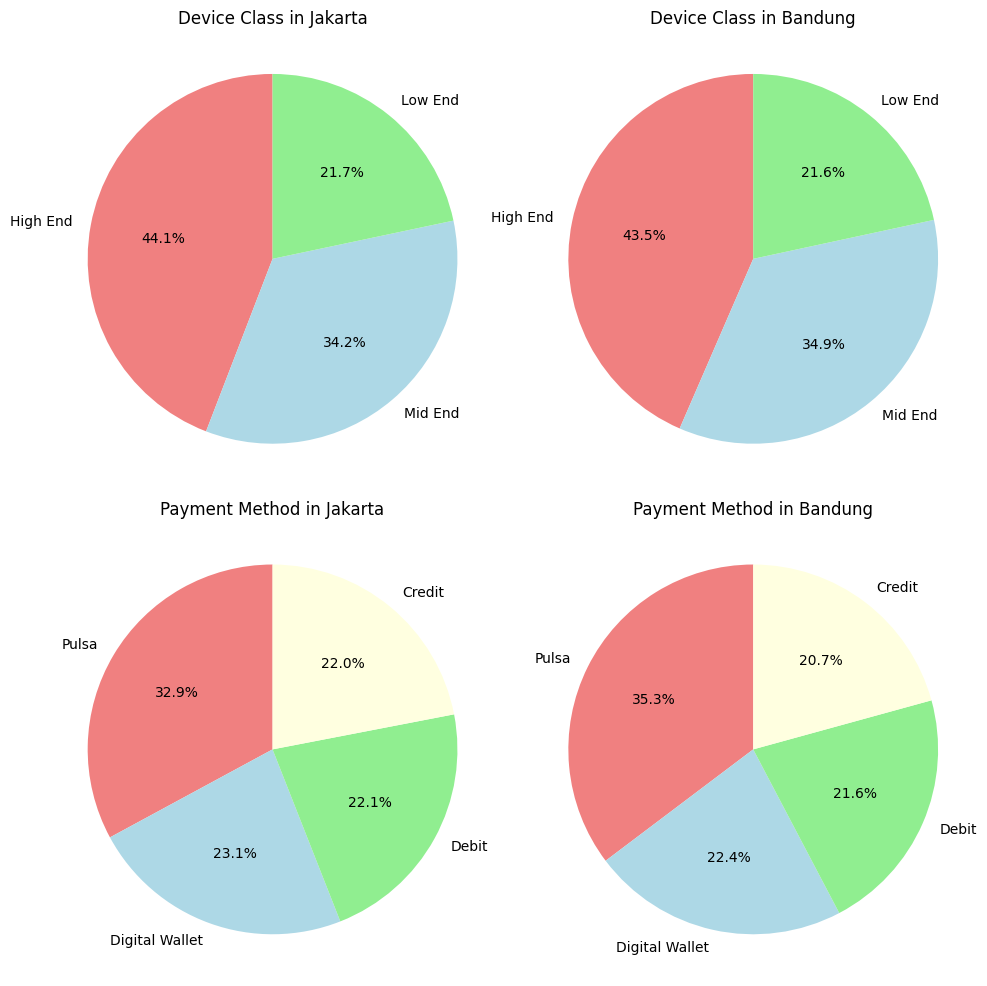

In [11]:
plot_comparison_pie_charts(df, ['Device Class', 'Payment Method'], ['Jakarta', 'Bandung'])

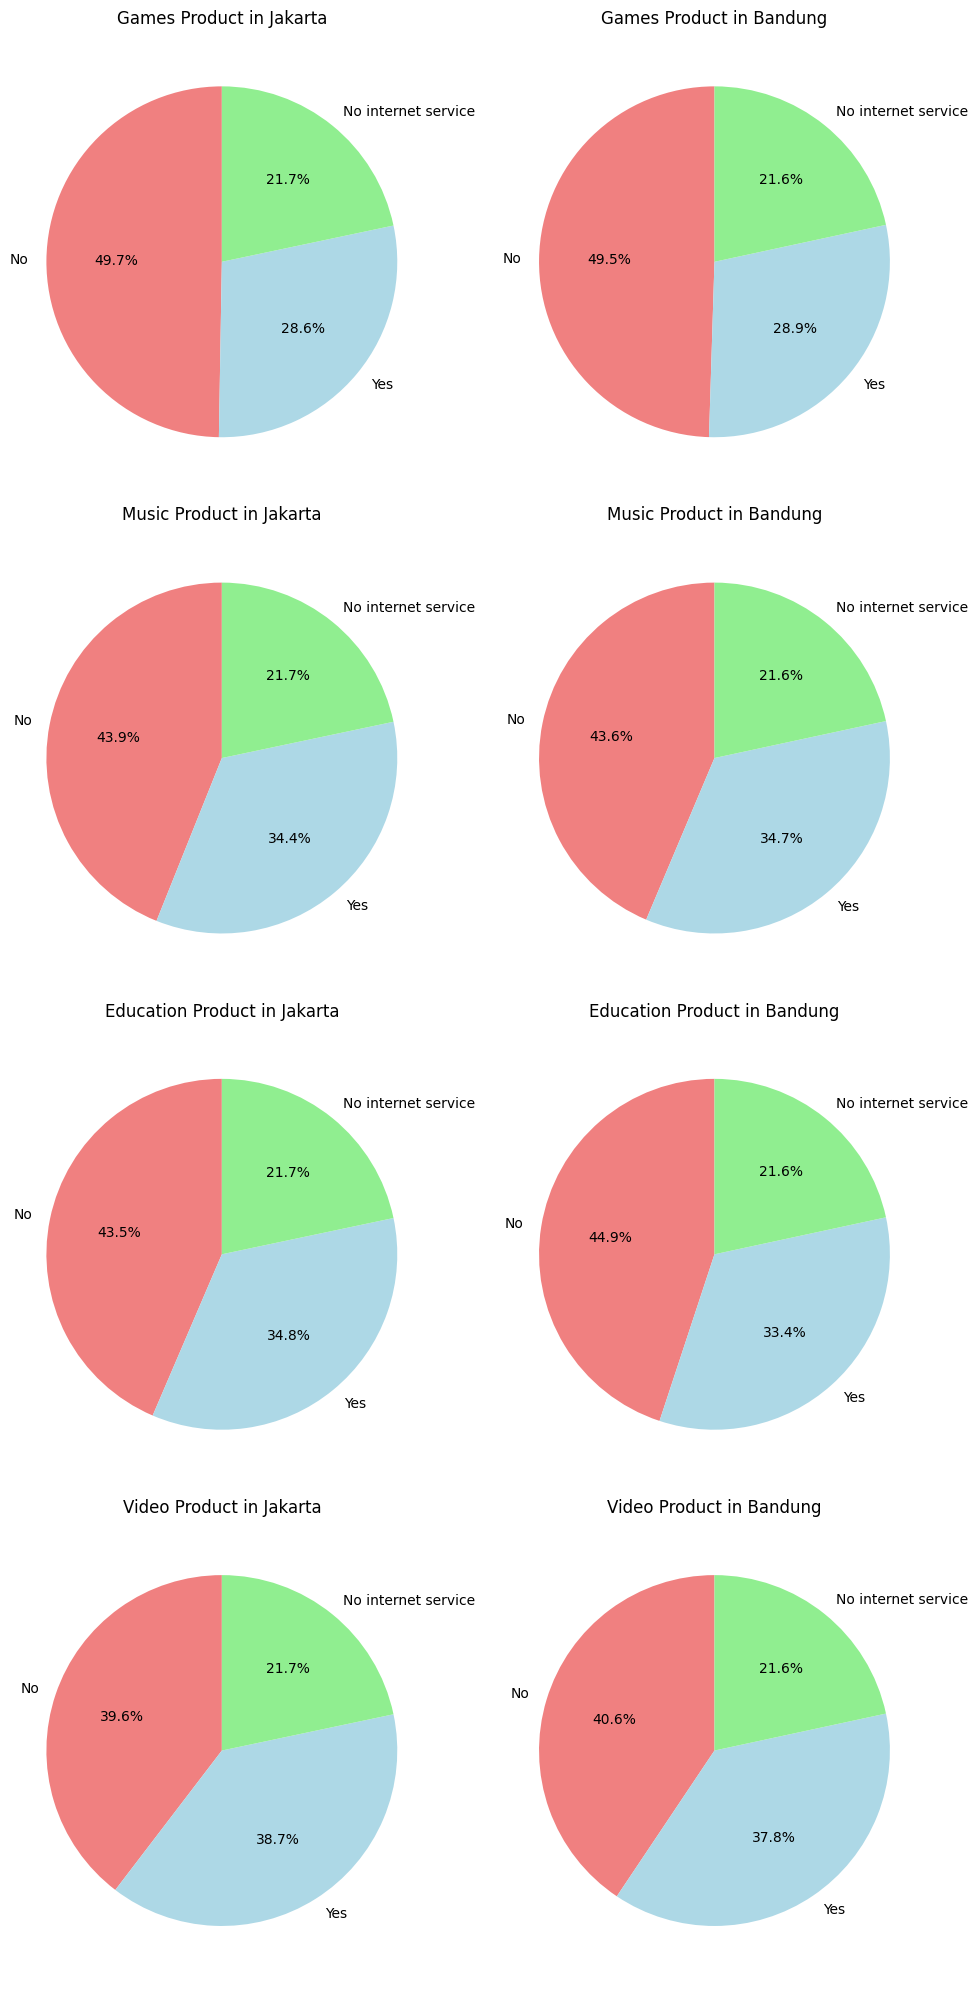

In [12]:
plot_comparison_pie_charts(df, ['Games Product', 'Music Product', 'Education Product', 'Video Product'],
                           ['Jakarta', 'Bandung'])

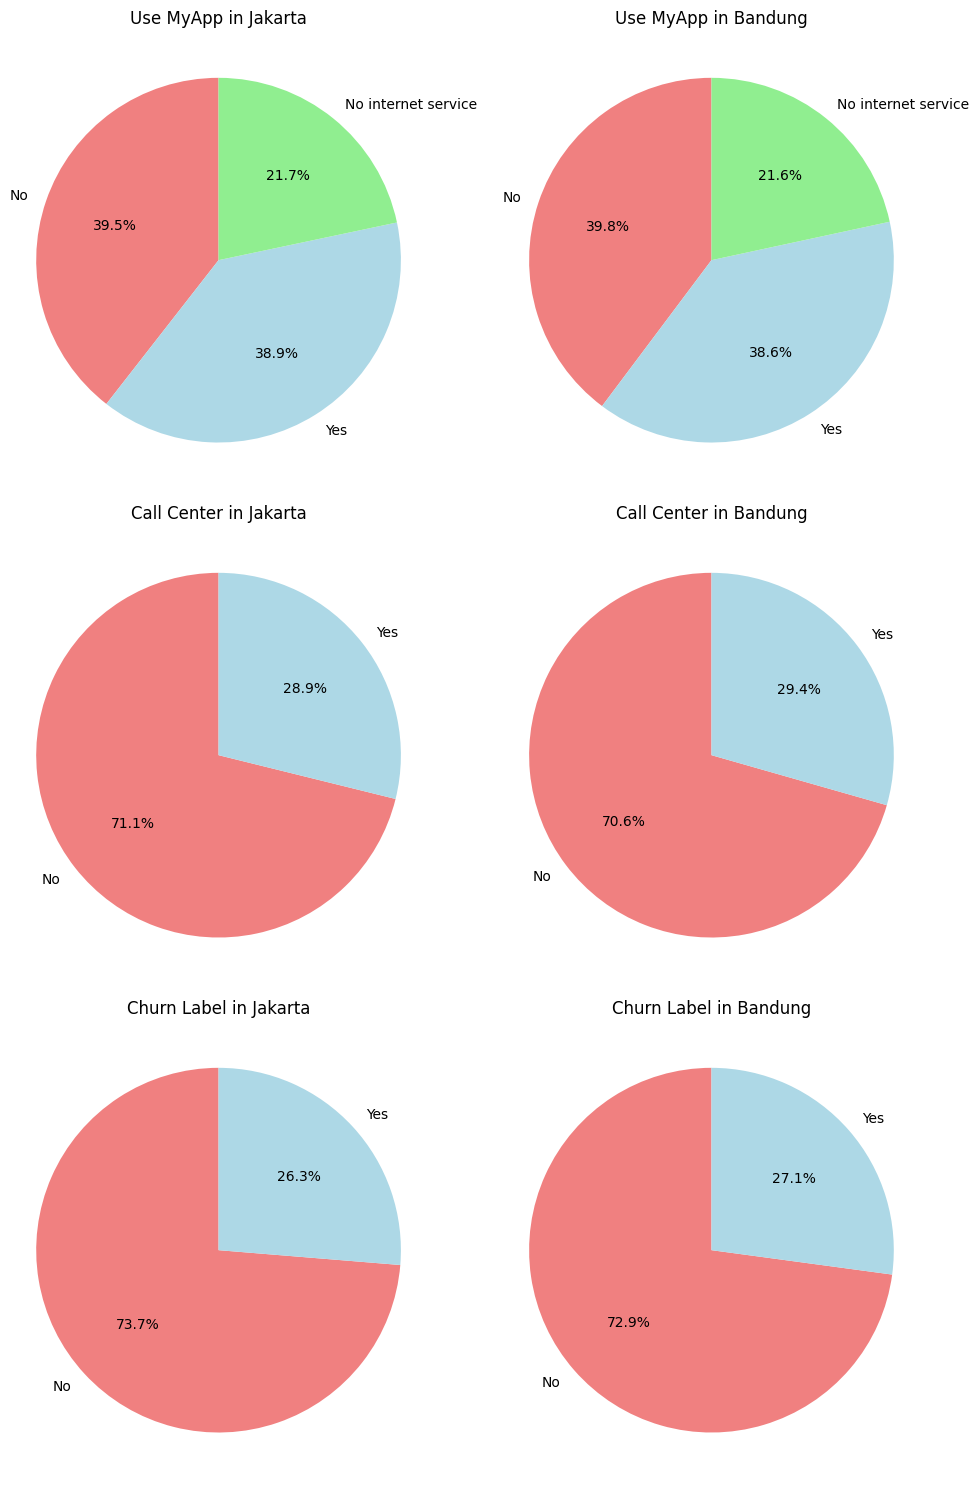

In [13]:
plot_comparison_pie_charts(df, ['Use MyApp', 'Call Center', 'Churn Label'], ['Jakarta', 'Bandung'])

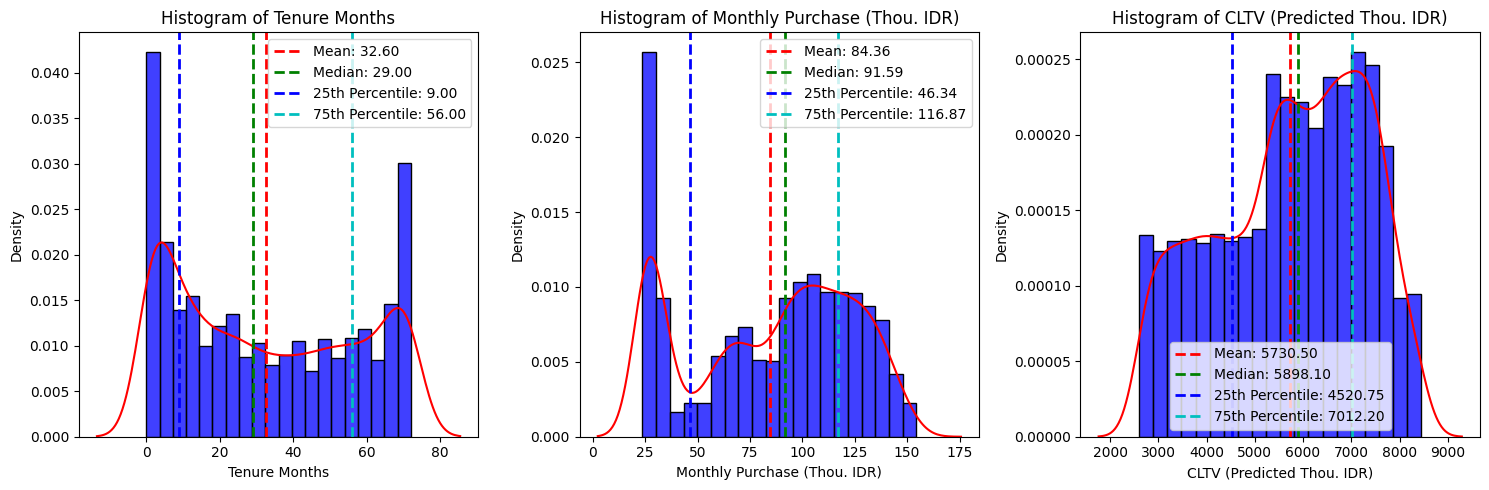

In [14]:
plot_multiple_histograms(df[df['Location'] == 'Jakarta'],
                         ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

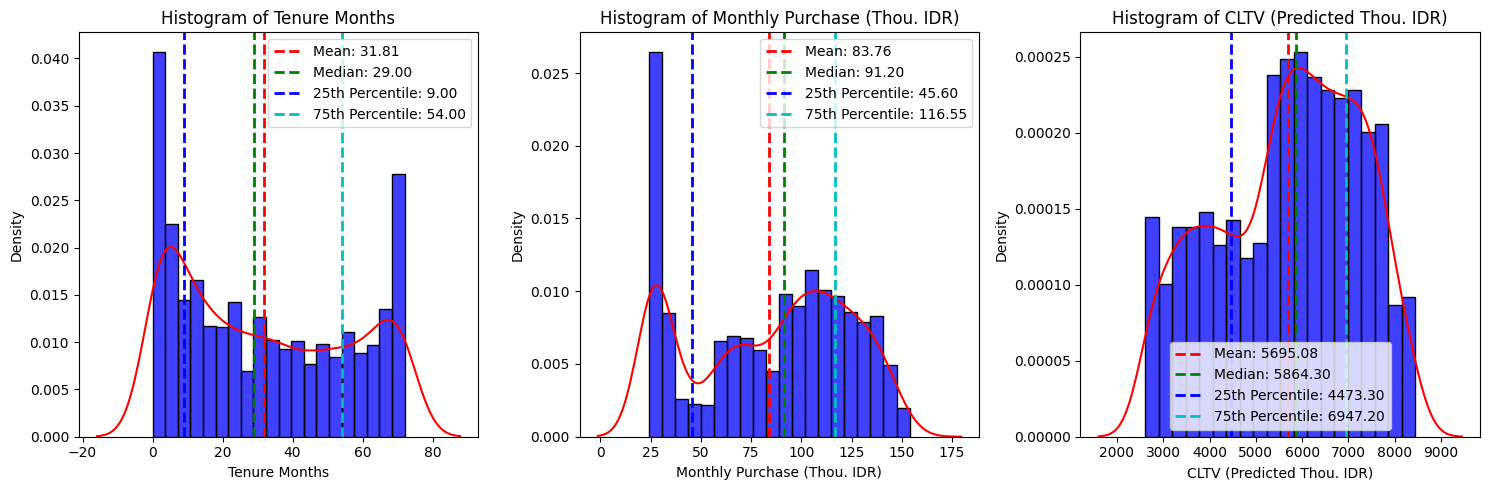

In [15]:
plot_multiple_histograms(df[df['Location'] == 'Bandung'],
                         ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

#### Answer: Data distribution patterns in each city is the same

##### 2.1.2. Segregation of cities based on device classes analysis

In [16]:
jakarta = df[df['Location'] == 'Jakarta']
bandung = df[df['Location'] == 'Bandung']

In [17]:
def plot_comparison_pie_charts(df, columns_to_compare, device_categories_to_compare):
    # Create a figure with subplots for each device category and each column
    num_device_categories = len(device_categories_to_compare)
    num_columns = 1 if isinstance(columns_to_compare, str) else len(columns_to_compare)

    # Handle the case when columns_to_compare is a single column (a string)
    if isinstance(columns_to_compare, str):
        columns_to_compare = [columns_to_compare]

    fig, axes = plt.subplots(num_columns, num_device_categories, figsize=(5 * num_device_categories, 5 * num_columns))

    for i, device_category in enumerate(device_categories_to_compare):
        for j, column in enumerate(columns_to_compare):
            # When num_columns is 1, use axes[i] directly; otherwise, use axes[j, i]
            ax = axes[i] if num_columns == 1 else axes[j, i]

            # Filter the DataFrame for the specific device category
            device_df = df[df['Device Class'] == device_category]

            # Calculate the proportions for the specified column
            proportions = device_df[column].value_counts(normalize=True)

            # Plot a pie chart for the specified column
            labels = proportions.index
            ax.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=90)
            ax.set_title(f'{column} in {device_category}')
            ax.axis('equal')  # Equal aspect ratio ensures that pies are drawn as circles

    plt.tight_layout()
    plt.show()

##### **How is the churn distribution for each device category?**

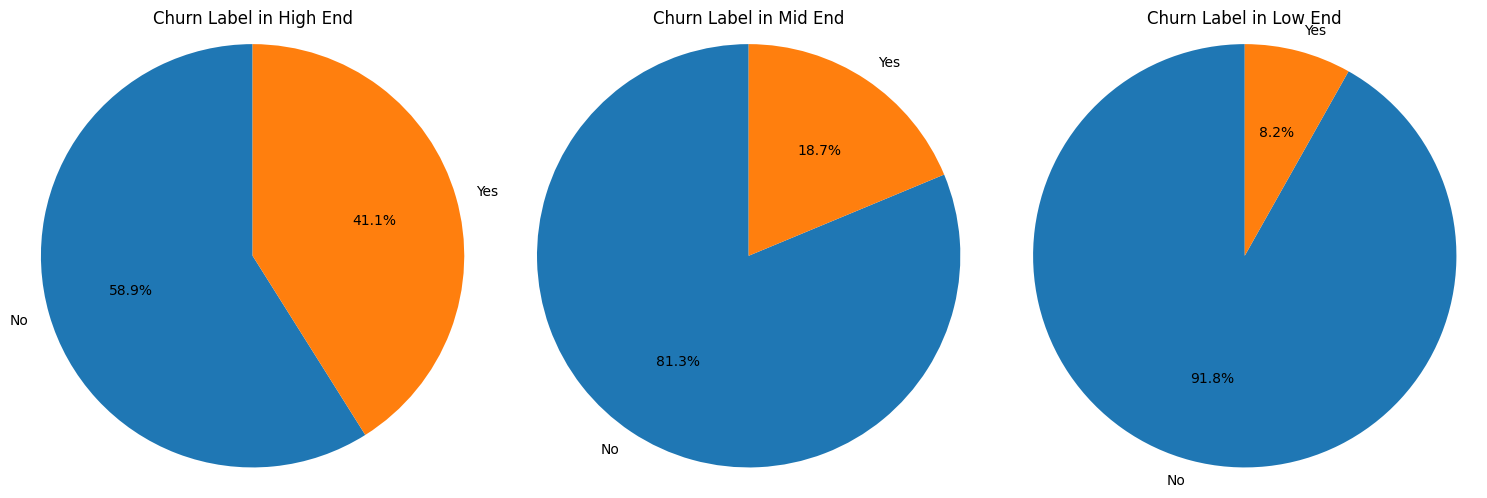

In [18]:
plot_comparison_pie_charts(jakarta, 'Churn Label', ['High End', 'Mid End', 'Low End'])

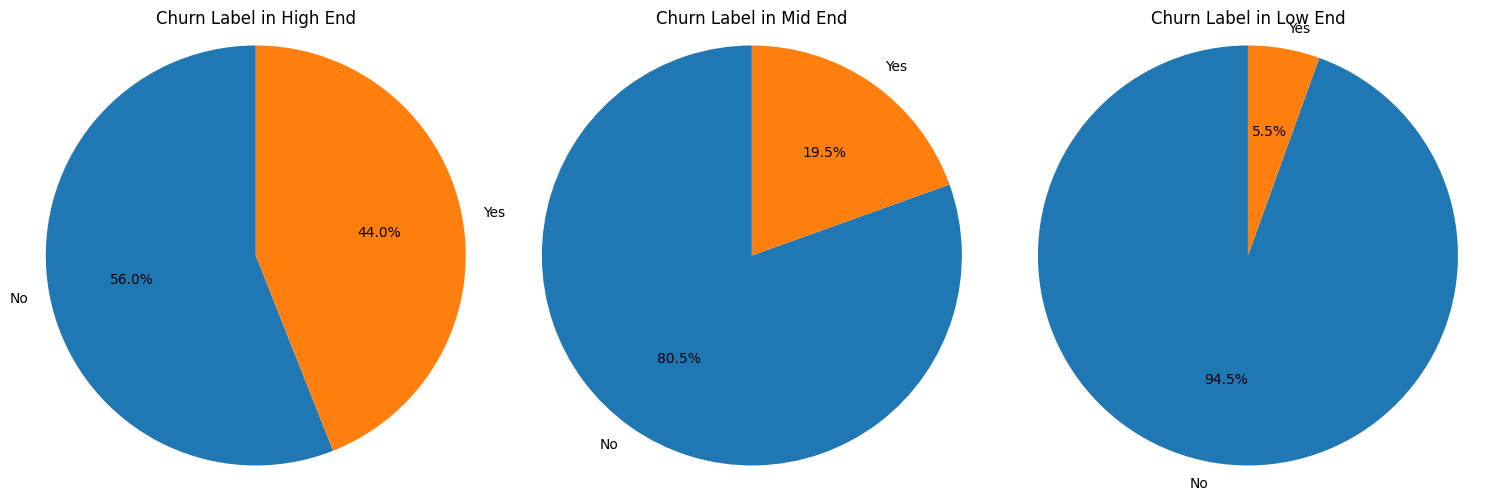

In [19]:
plot_comparison_pie_charts(bandung, 'Churn Label', ['High End', 'Mid End', 'Low End'])

#### Answers

1. High End have the highest chance of churn at around 40%
2. Mid End have around 18-19% chance of churning
3. Low End have the lowest chance of churning at only 5-8%
4. The findings are consistent in both cities, this means that the city variable does not have an impact in each device categories behaviour

##### How is the product distribution for each device category?

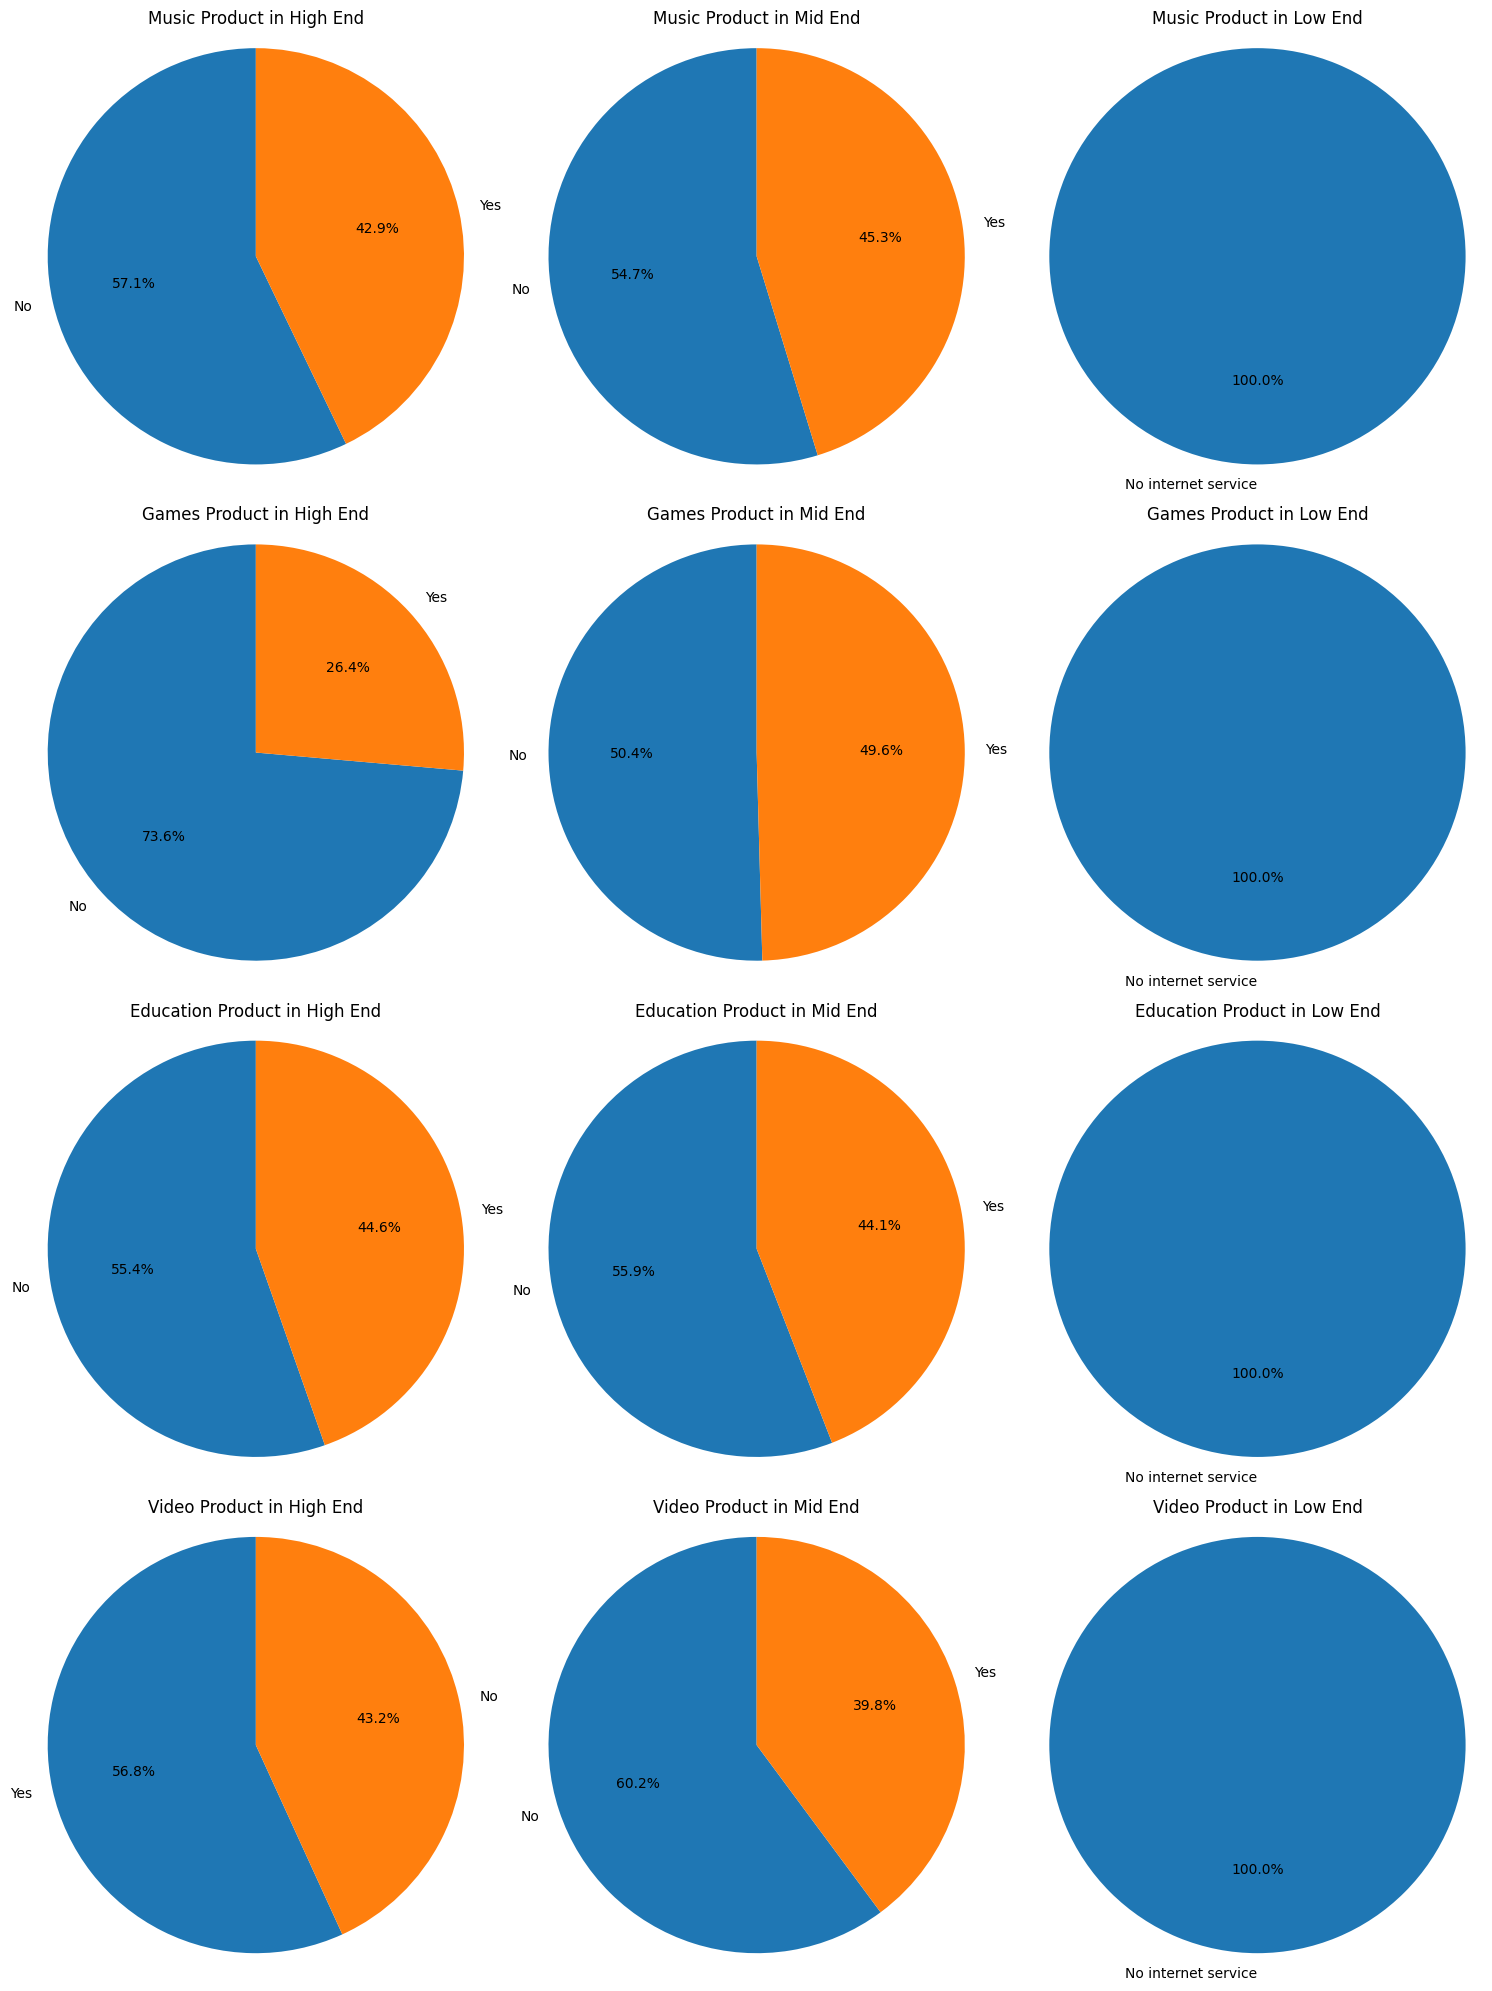

In [20]:
plot_comparison_pie_charts(jakarta, ['Music Product', 'Games Product',
                                    'Education Product',
                                    'Video Product'], ['High End', 'Mid End', 'Low End'])

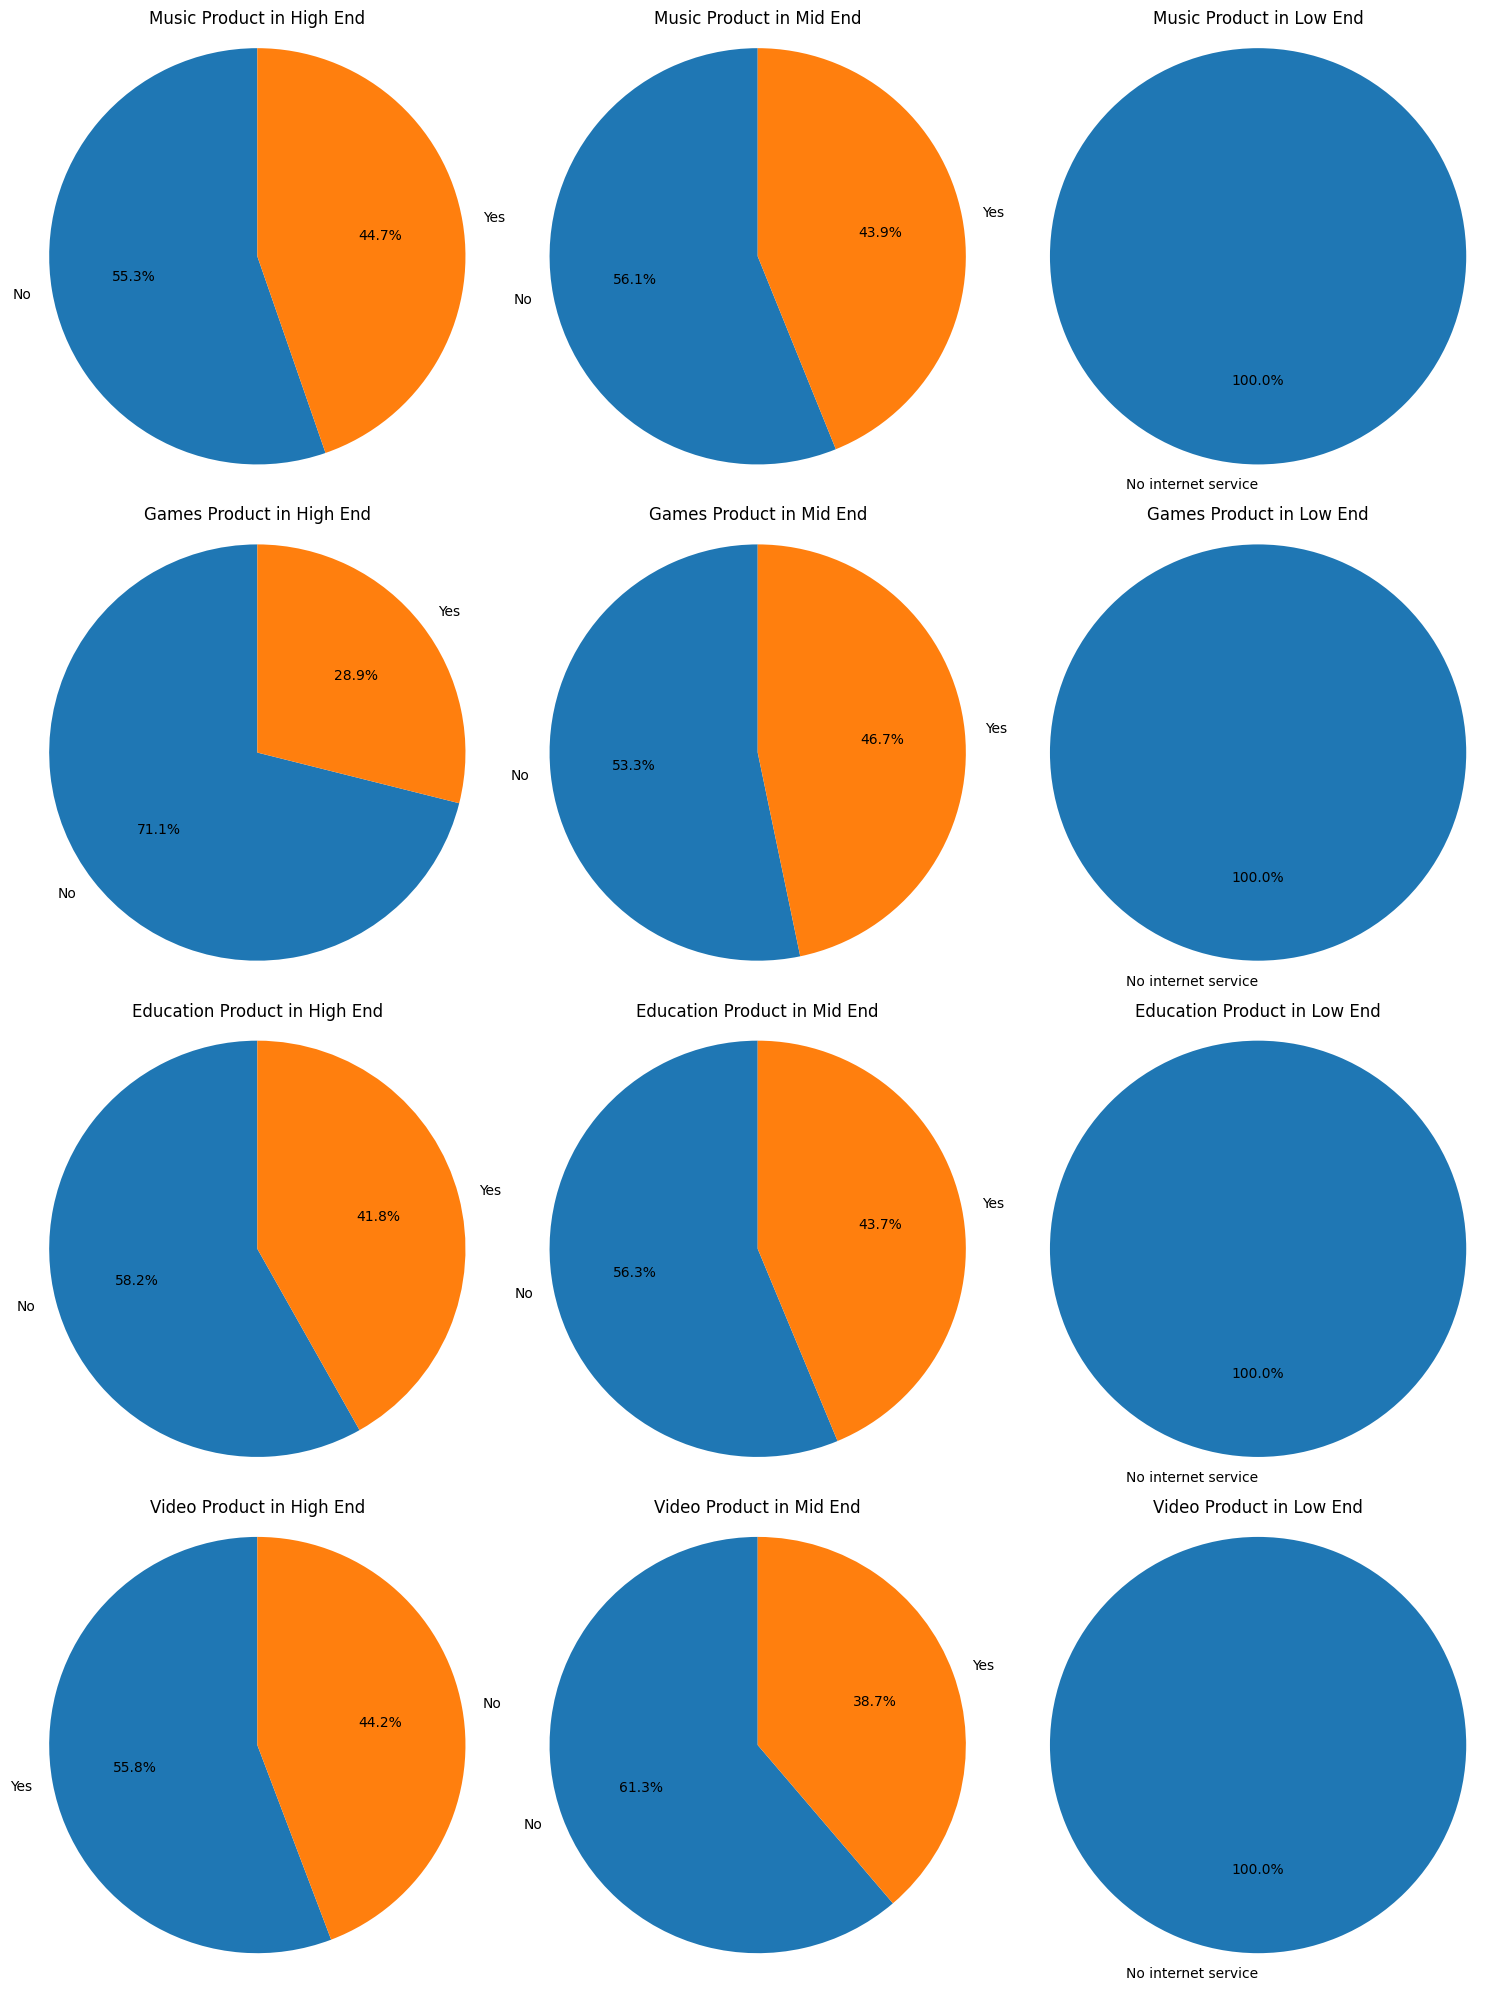

In [21]:
plot_comparison_pie_charts(bandung, ['Music Product', 'Games Product',
                                    'Education Product',
                                    'Video Product'], ['High End', 'Mid End', 'Low End'])

#### Answers

1. **Low End doesn't have internet services at all**
2. High End and Mid End have roughly the same distribution patterns except in games product and video product
3. **Mid End devices user like games product more compared to high end devices users**
4. **There is a chance to better maximize game product potential in mid end devices**
5. **High End devices user like video product more compared to mid end devices users**
6. **Majoriy of High End devices user have already like video product**
7. **The findings are consistent in both cities, this means that the city variable does not have an impact in each device categories behaviour**

##### Is there a difference in usage of MyApp and Call Center for each device category?

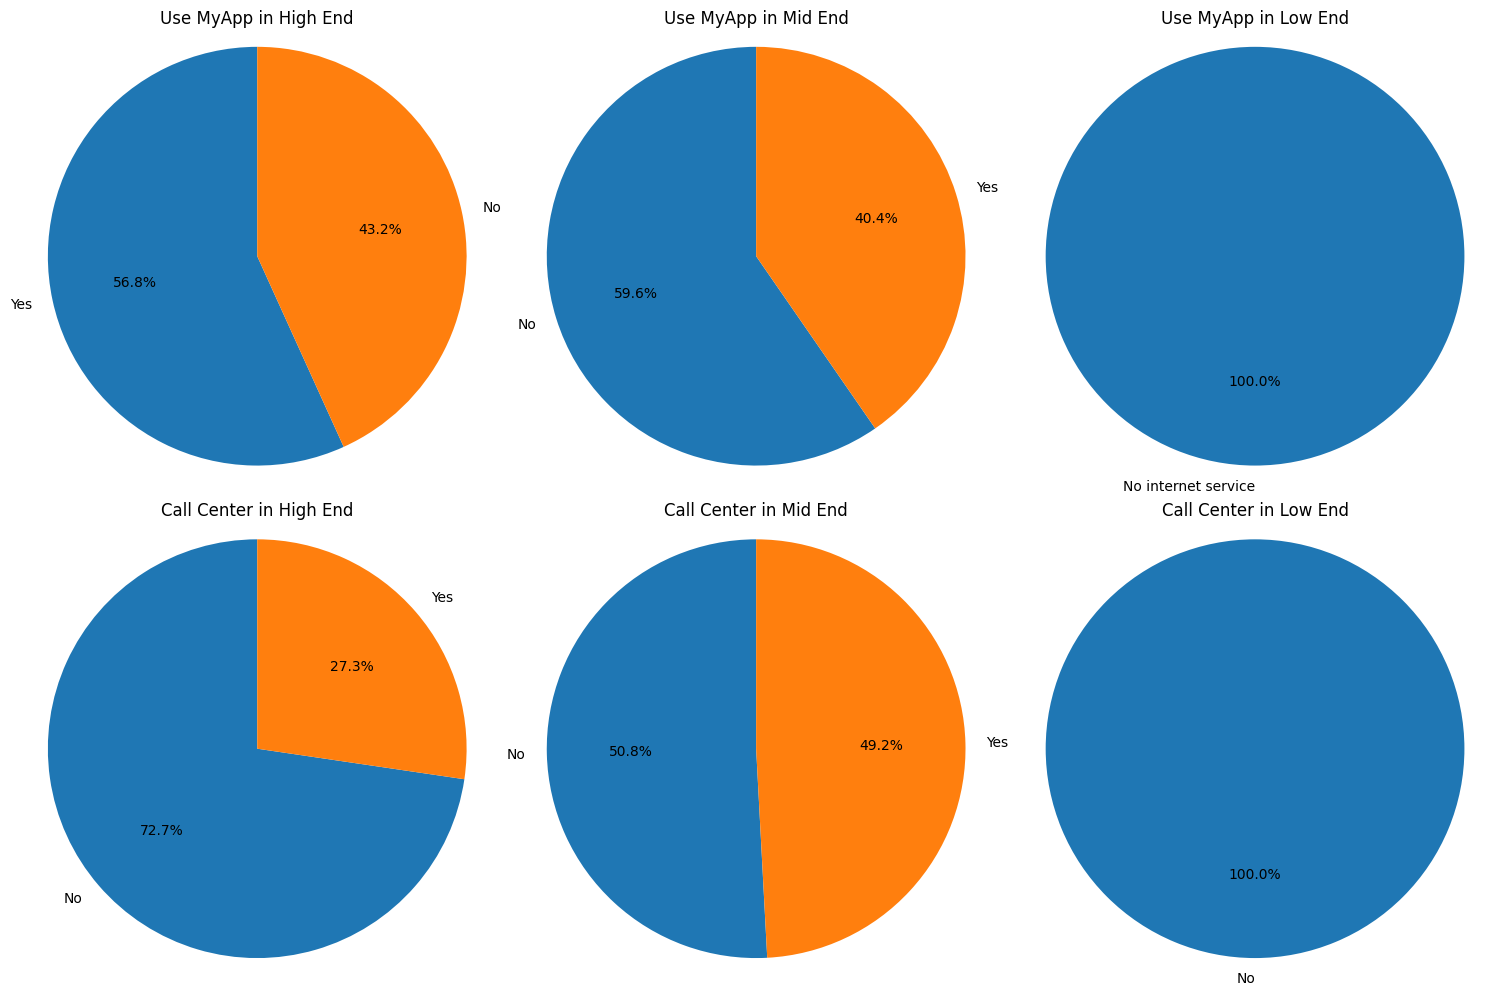

In [22]:
plot_comparison_pie_charts(jakarta, ['Use MyApp', 'Call Center'], ['High End', 'Mid End', 'Low End'])

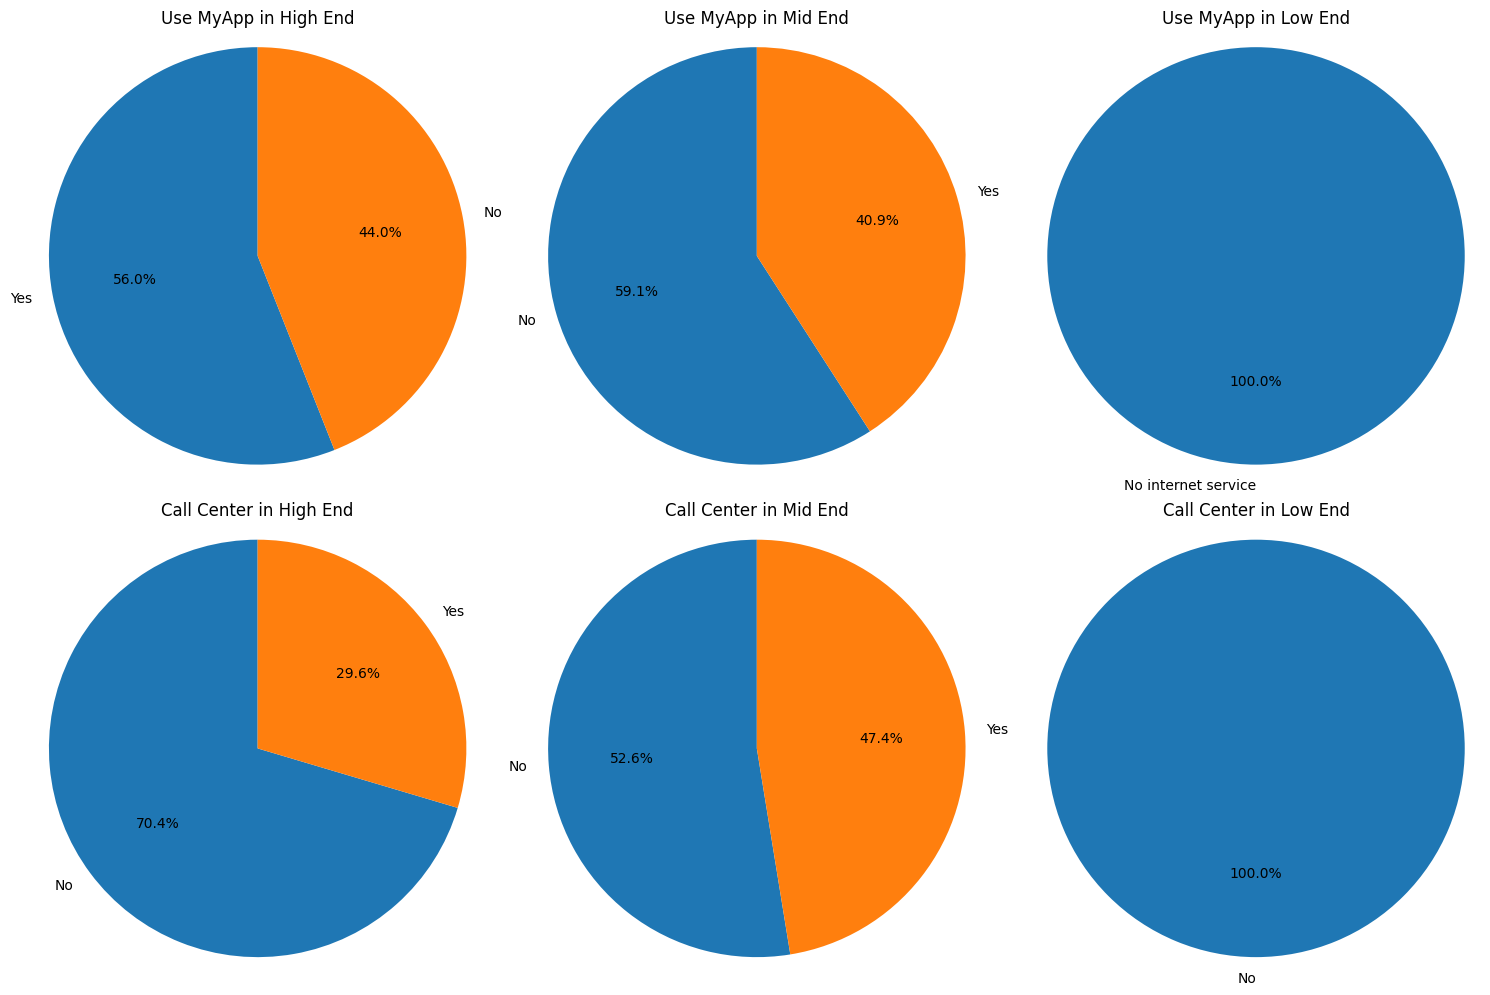

In [23]:
plot_comparison_pie_charts(bandung, ['Use MyApp', 'Call Center'], ['High End', 'Mid End', 'Low End'])

#### Answers

1. Low End doesn't use MyApp and Call Center
2. High End use MyApp more than Mid End and less in Call Center, and vice versa
3. The findings are consistent in both cities, this means that the city variable does not have an impact in each device categories behaviour

##### Is there a difference in the frequency of payment method used for each device category?

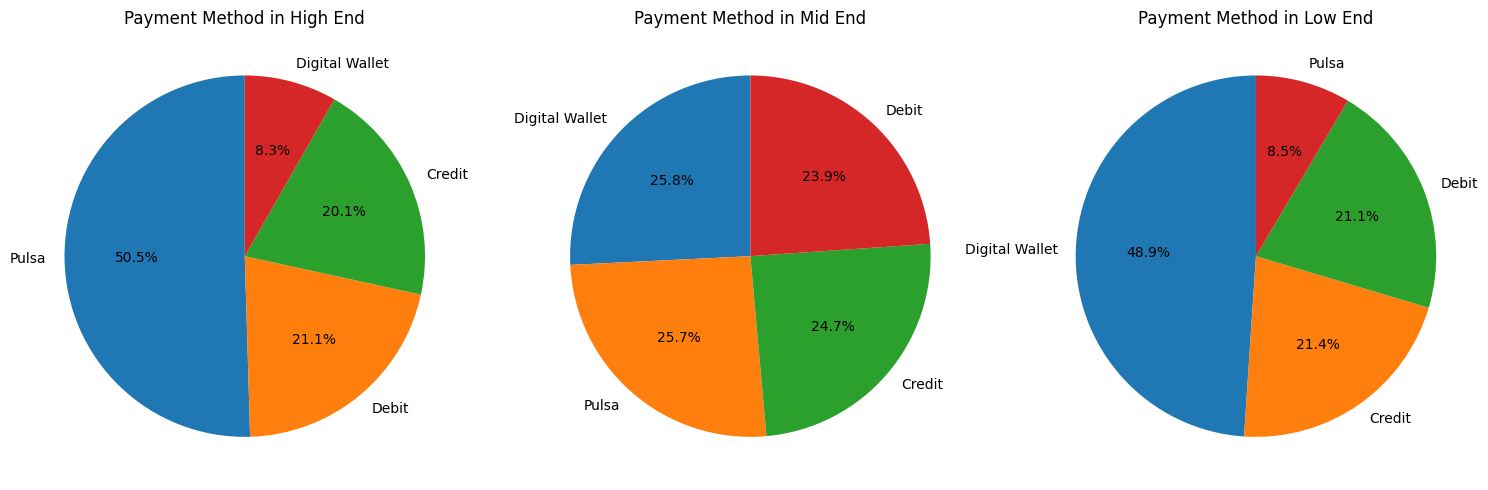

In [24]:
plot_comparison_pie_charts(jakarta, 'Payment Method', ['High End', 'Mid End', 'Low End'])

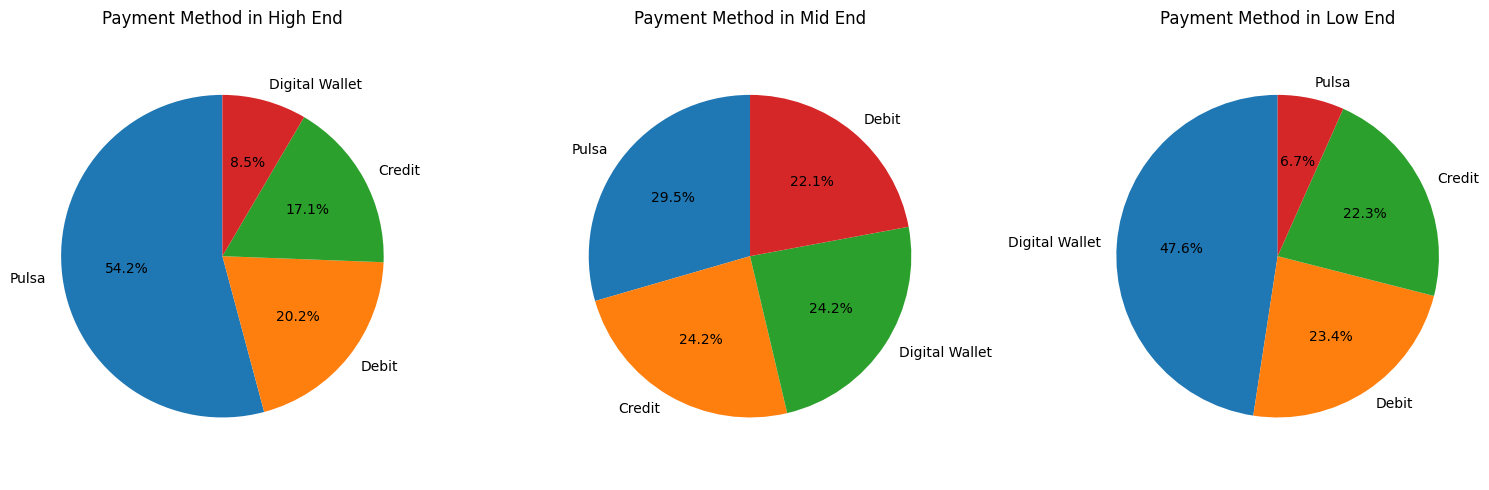

In [25]:
plot_comparison_pie_charts(bandung, 'Payment Method', ['High End', 'Mid End', 'Low End'])

#### Answers

1. Low End uses digital wallet more, followed by roughly equal frequency in debit and credit with "pulsa" to be the least popular
2. Mid End have roughly equal spread between all the payment method
3. High end uses pulsa more, followed by debit and credit, with "pulsa" to be the least popular
3. The findings are consistent in both cities, this means that the city variable does not have an impact in each device categories behaviour

##### How about the distribution of monthly purchase, CLTV, and tenure months?

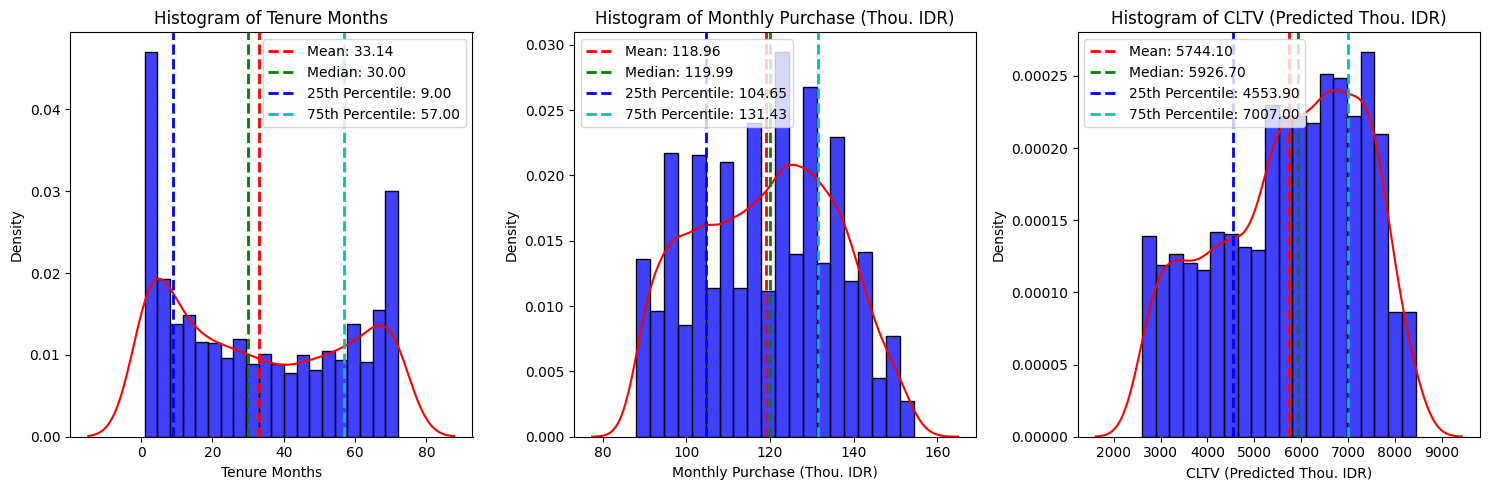

In [26]:
plot_multiple_histograms(jakarta[jakarta['Device Class'] == 'High End'],
                         ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

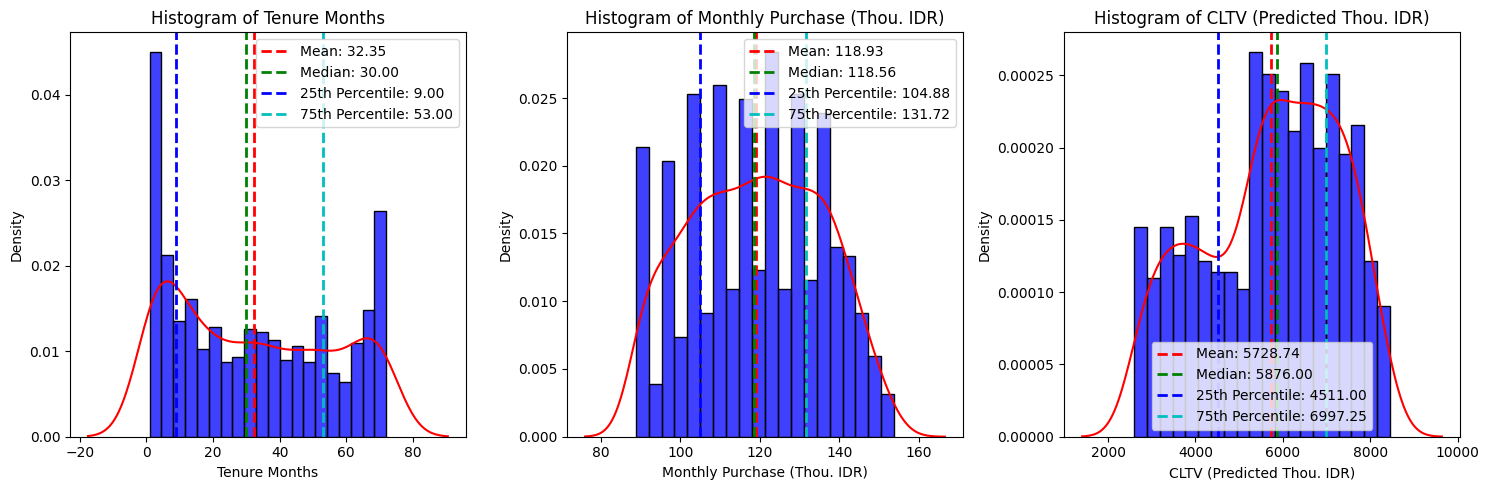

In [27]:
plot_multiple_histograms(bandung[bandung['Device Class'] == 'High End'],
                         ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

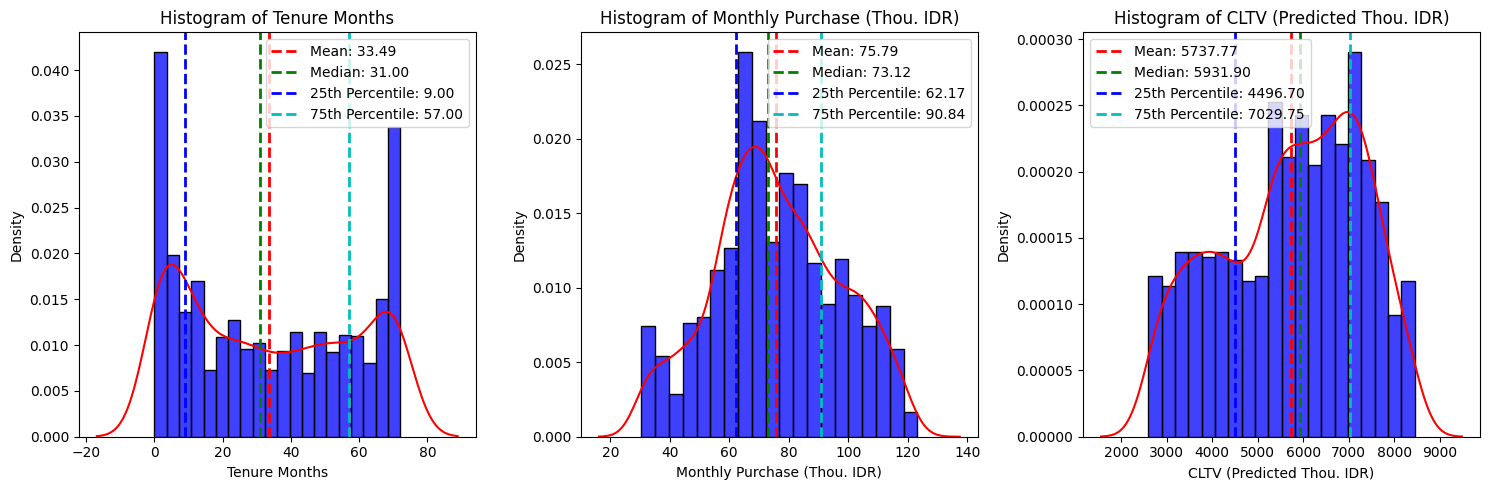

In [28]:
plot_multiple_histograms(jakarta[jakarta['Device Class'] == 'Mid End'],
                         ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

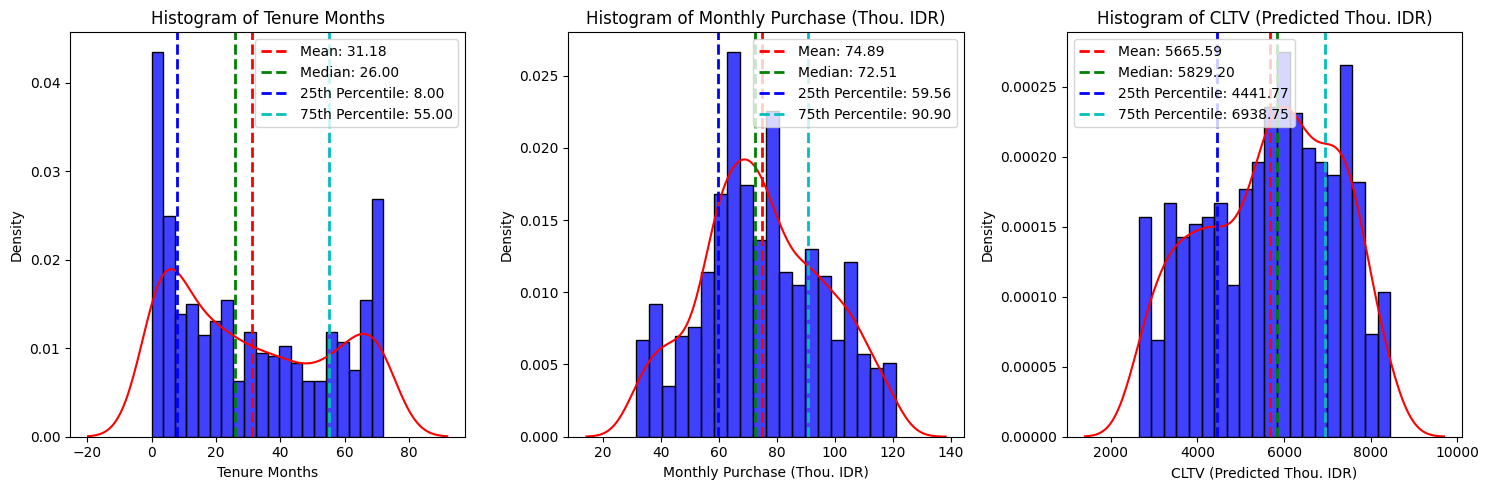

In [29]:
plot_multiple_histograms(bandung[bandung['Device Class'] == 'Mid End'],
                         ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

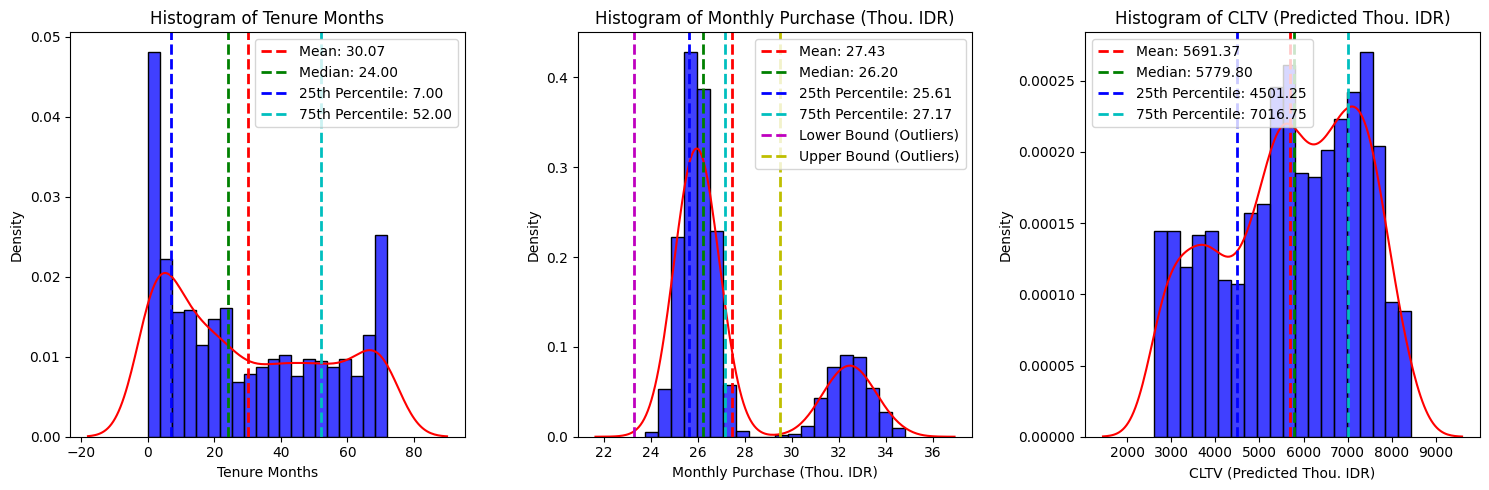

In [30]:
plot_multiple_histograms(jakarta[jakarta['Device Class'] == 'Low End'],
                         ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

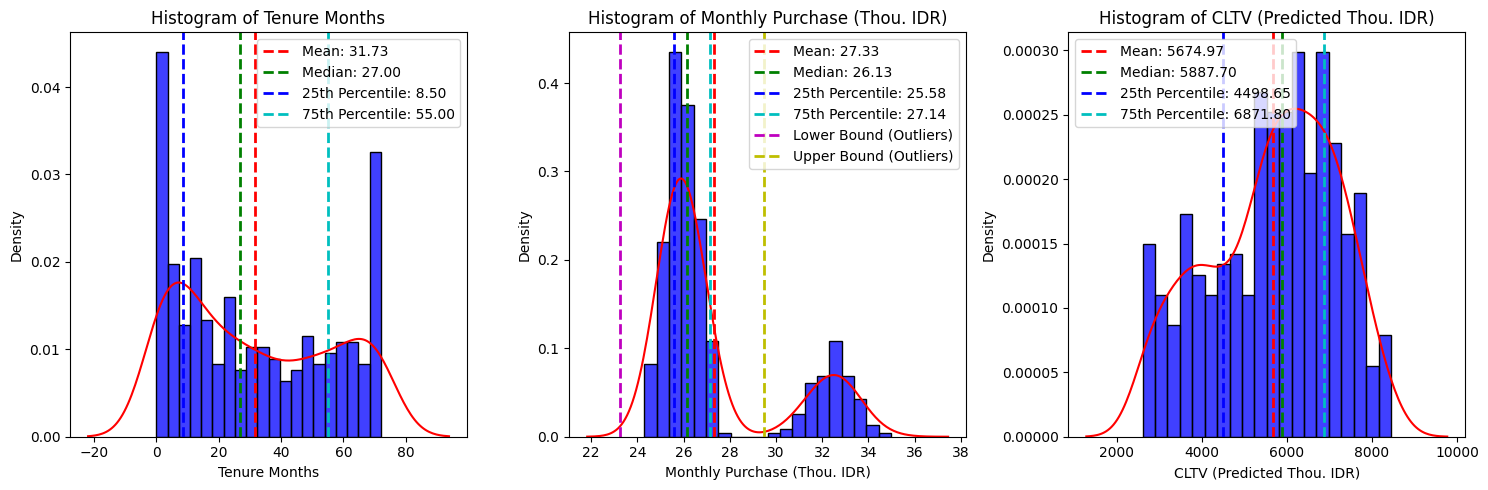

In [31]:
plot_multiple_histograms(bandung[bandung['Device Class'] == 'Low End'],
                         ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

#### Answers

1. Low End spends the leasts, spending around 26-27 Thou. IDR monthly having outliers above around 29 Thou. IDR. It is binomial distributed
2. Mid End spends around 72-75 Thou. IDR monthly, with Q3 of around 90 Thou. IDR and Q1 of around 59-62 Thou. IDR
3. High end spends the most, spending around 118-119 Thou. IDR monthly, with Q3 of around 131 Thou. IDR and Q1 of around 104 Thou. IDR
4. Hard to conclude anything about CLTV and Tenure Months
3. The findings are consistent in both cities, this means that the city variable does not have an impact in each device categories behaviour

**Is there any differences between in internet product usage between cities?**

In [32]:
def label_unique_combinations(df, column_names):
    # Create a dictionary to store the unique combinations and their labels
    unique_combinations = {}
    label_counter = 1

    # Create a new column "Combination" and initialize it with an empty string
    df['Combination'] = ''

    # Iterate through the rows of the DataFrame
    for index, row in df.iterrows():
        combination = tuple(row[column_names])
        combination_str = ', '.join([f'{col}: {val}' for col, val in zip(column_names, combination)])

        if combination not in unique_combinations:
            unique_combinations[combination] = f'Combination {label_counter}'
            label_counter += 1

        # Add the label to the "Combination" column
        df.at[index, 'Combination'] = unique_combinations[combination]

    return df

In [33]:
# Define the column names for which you want to label unique combinations
column_names = ['Games Product', 'Music Product', 'Education Product', 'Video Product']

# Call the function to label unique combinations and create the "Combination" column
combi = label_unique_combinations(df, column_names)

combi

Customer ID  Tenure Months Location Device Class        Games Product  \
0               0              2  Jakarta      Mid End                  Yes   
1               1              2  Jakarta     High End                   No   
2               2              8  Jakarta     High End                   No   
3               3             28  Jakarta     High End                   No   
4               4             49  Jakarta     High End                   No   
...           ...            ...      ...          ...                  ...   
7038         7038             72  Jakarta      Low End  No internet service   
7039         7039             24  Jakarta      Mid End                  Yes   
7040         7040             72  Jakarta     High End                   No   
7041         7041             11  Jakarta      Mid End                  Yes   
7042         7042             66  Jakarta     High End                  Yes   

            Music Product    Education Product Call Center  \
0                     Yes                   No          No   
1                      No                   No          No   
2                      No                  Yes          No   
3                      No                  Yes         Yes   
4                     Yes                  Yes          No   
...                   ...                  ...         ...   
7038  No internet service  No internet service          No   
7039                   No                  Yes         Yes   
7040                  Yes                  Yes          No   
7041                   No                   No          No   
7042                   No                  Yes         Yes   

            Video Product            Use MyApp  Payment Method  \
0                      No                   No  Digital Wallet   
1                      No                   No           Pulsa   
2                     Yes                  Yes           Pulsa   
3                     Yes                  Yes           Pulsa   
4                     Yes                  Yes           Debit   
...                   ...                  ...             ...   
7038  No internet service  No internet service           Debit   
7039                  Yes                  Yes  Digital Wallet   
7040                  Yes                  Yes          Credit   
7041                   No                   No           Pulsa   
7042                  Yes                  Yes           Debit   

      Monthly Purchase (Thou. IDR) Churn Label   Longitude  Latitude  \
0                           70.005         Yes  106.816666      -6.2   
1                           91.910         Yes  106.816666      -6.2   
2                          129.545         Yes  106.816666      -6.2   
3                          136.240         Yes  106.816666      -6.2   
4                          134.810         Yes  106.816666      -6.2   
...                            ...         ...         ...       ...   
7038                        27.495          No  106.816666      -6.2   
7039                       110.240          No  106.816666      -6.2   
7040                       134.160          No  106.816666      -6.2   
7041                        38.480          No  106.816666      -6.2   
7042                       137.345          No  106.816666      -6.2   

      CLTV (Predicted Thou. IDR)     Combination  
0                         4210.7   Combination 1  
1                         3511.3   Combination 2  
2                         6983.6   Combination 3  
3                         6503.9   Combination 3  
4                         6942.0   Combination 4  
...                          ...             ...  
7038                      6897.8   Combination 6  
7039                      2782.0  Combination 15  
7040                      7228.0   Combination 4  
7041                      3630.9  Combination 11  
7042                      6626.1  Combination 15  

[7043 rows x 17 columns]

In [34]:
jakarta_combi = combi[combi['Location'] == 'Jakarta']
bandung_combi = combi[combi['Location'] == 'Bandung']

In [35]:
def visualize_combination_counts_sorted_with_adjusted_counts(df):
    # Group the DataFrame by 'Device Class' and 'Combination', and count the occurrences
    combination_counts = df.groupby(['Device Class', 'Combination']).size().unstack(fill_value=0)

    # Iterate through unique device classes and create a horizontal bar chart for each
    unique_device_classes = df['Device Class'].unique()

    for device_class in unique_device_classes:
        class_data = combination_counts.loc[device_class]
        class_data = class_data[class_data > 0]  # Exclude combinations with 0 count

        if not class_data.empty:
            # Sort the combinations by count in descending order
            class_data = class_data.sort_values(ascending=False)

            # Create a gradient color map for the bars
            color_map = plt.get_cmap('viridis')
            num_colors = len(class_data)
            colors = [color_map(i / num_colors) for i in range(num_colors)]

            # Create a horizontal bar chart with gradient color
            plt.figure(figsize=(10, 6))
            bars = plt.barh(class_data.index, class_data, color=colors)
            plt.xlabel('Count')
            plt.title(f'Combinations for {device_class}')
            plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

            # Display the number of counts within each bar with adjusted position
            for bar, count in zip(bars, class_data):
                plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, count, ha='center', va='center')

            plt.show()


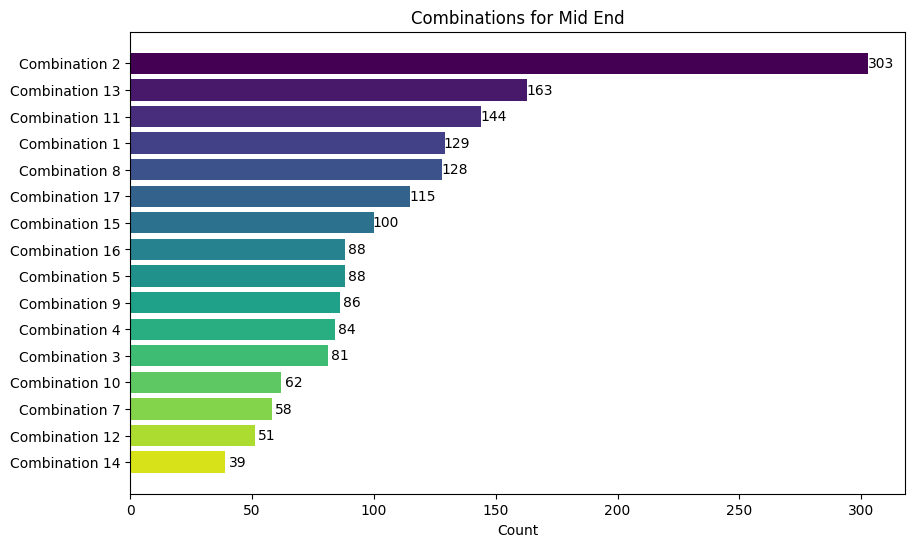

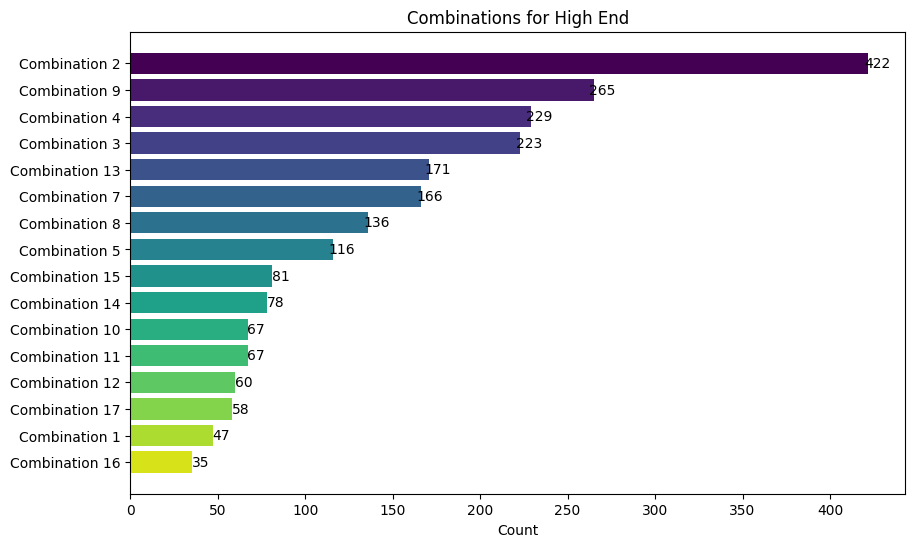

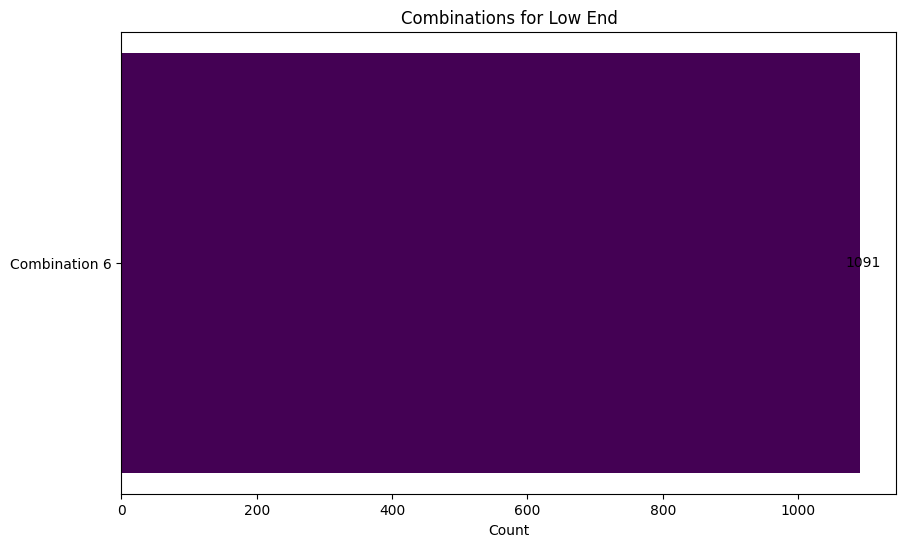

In [36]:
visualize_combination_counts_sorted_with_adjusted_counts(jakarta_combi)

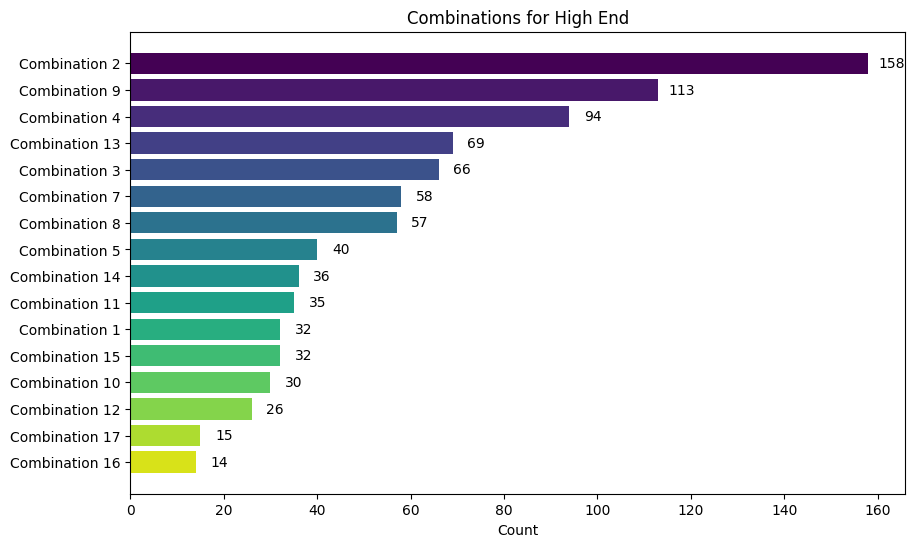

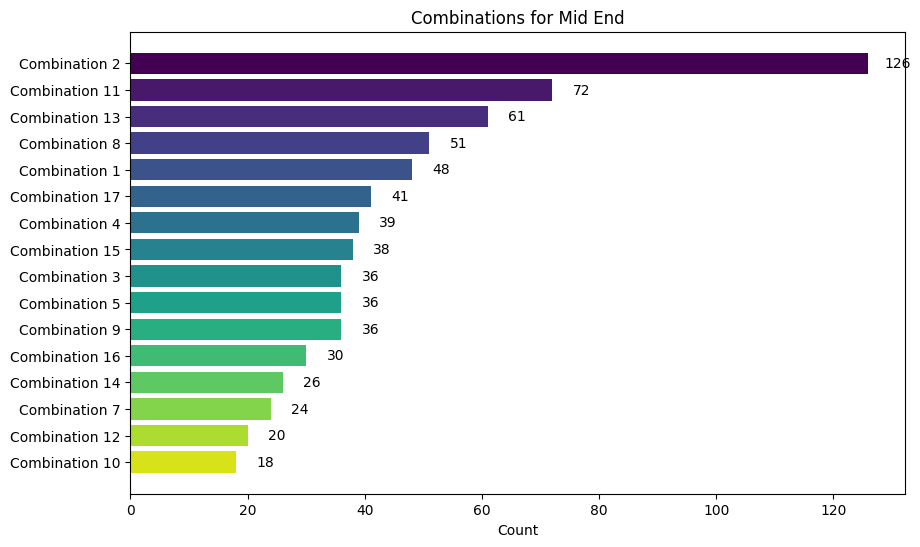

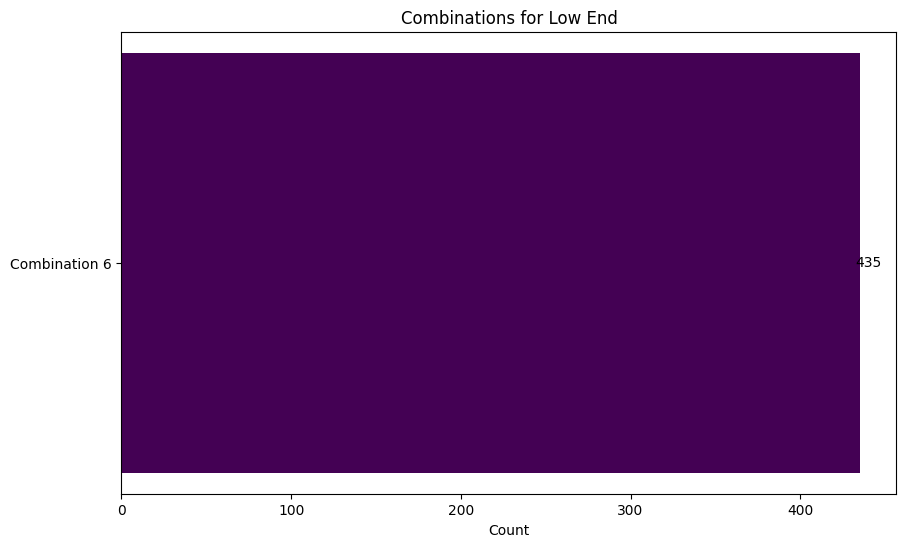

In [37]:
visualize_combination_counts_sorted_with_adjusted_counts(bandung_combi)

In [38]:
from scipy.stats import chi2_contingency

In [39]:
highend_test = combi[combi['Device Class'] == 'High End']
midend_test = combi[combi['Device Class'] == 'Mid End']
lowend_test = combi[combi['Device Class'] == 'Low End']

In [40]:
# Create a contingency table
contingency_table = pd.crosstab(highend_test['Location'], highend_test['Combination'])

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Squared Statistic: 17.3850866361837
P-value: 0.2963697667698821
Degrees of Freedom: 15
Expected Frequencies Table:
[[ 22.32719638  27.41440568  28.82751938  24.30555556  67.82945736
   32.21899225  31.93636951  13.84851421  20.63145995 163.92118863
   81.67797158  91.2871447   44.08914729  63.30749354  54.54618863
  106.83139535]
 [ 56.67280362  69.58559432  73.17248062  61.69444444 172.17054264
   81.78100775  81.06363049  35.15148579  52.36854005 416.07881137
  207.32202842 231.7128553  111.91085271 160.69250646 138.45381137
  271.16860465]]


In [41]:
# Create a contingency table
contingency_table = pd.crosstab(midend_test['Location'], midend_test['Combination'])

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Squared Statistic: 10.221433335314293
P-value: 0.8055847424722805
Degrees of Freedom: 15
Expected Frequencies Table:
[[ 51.32342007  23.19702602  62.63197026  20.58736059  64.95167286
   18.84758364  40.01486989  34.21561338  45.23420074 124.39405204
   33.92565056  35.66542751  35.95539033  23.77695167  51.90334572
   35.37546468]
 [125.67657993  56.80297398 153.36802974  50.41263941 159.04832714
   46.15241636  97.98513011  83.78438662 110.76579926 304.60594796
   83.07434944  87.33457249  88.04460967  58.22304833 127.09665428
   86.62453532]]


In [42]:
# Number of Monte Carlo simulations
num_simulations = 10000

# Observed contingency table
observed_contingency_table = pd.crosstab(combi['Device Class'], combi['Combination'])

# Observed Chi-Squared statistic
observed_chi2, _, _, _ = chi2_contingency(observed_contingency_table)

# Initialize a count for extreme test statistics
extreme_count = 0

# Perform Monte Carlo simulation
for _ in range(num_simulations):
    # Generate random data based on marginal totals
    simulated_data = pd.crosstab(
        np.random.choice(combi['Device Class'], size=len(combi)),
        np.random.choice(combi['Combination'], size=len(combi))
    )

    # Calculate the Chi-Squared statistic for the simulated data
    simulated_chi2, _, _, _ = chi2_contingency(simulated_data)

    # Compare with the observed Chi-Squared statistic
    if simulated_chi2 >= observed_chi2:
        extreme_count += 1

# Calculate the estimated p-value
p_value = (extreme_count + 1) / (num_simulations + 1)

# Output the results
print("Observed Chi-Squared Statistic:", observed_chi2)
print("Estimated p-value (Monte Carlo):", p_value)

Observed Chi-Squared Statistic: 7639.436069632949
Estimated p-value (Monte Carlo): 9.999000099990002e-05


Answers:

1. Combination 2 is apparently the most high in mid end and high end in both cities
2. There are differences in ranks for combinations after combination 2 in each cities
3. Chi Squared test shows the city variable doesn't have an impact on the combinations
4. Monte Carlo simulation shows the device class have an impact on the combinations preferences
5. This mean that for combinations recommendations shouldn't consider the city

Conclusion:

**City does not have any impact on customer behaviour, device class does**

#### 2.2 Customer Segment Analysis Based on Device Class

In [43]:
highend = combi[combi['Device Class'] == 'High End']
midend = combi[combi['Device Class'] == 'Mid End']
lowend = combi[combi['Device Class'] == 'Low End']

##### 2.2.1. Churn Analysis on Low End

In [44]:
lowend_churned = lowend[lowend['Churn Label'] == 'Yes']

In [45]:
lowend_nochurned = lowend[lowend['Churn Label'] == 'No']

In [46]:
lowend_churned['Call Center']

7       No
22      No
65      No
99      No
103     No
        ..
1738    No
1751    No
1792    No
1794    No
1847    No
Name: Call Center, Length: 113, dtype: object

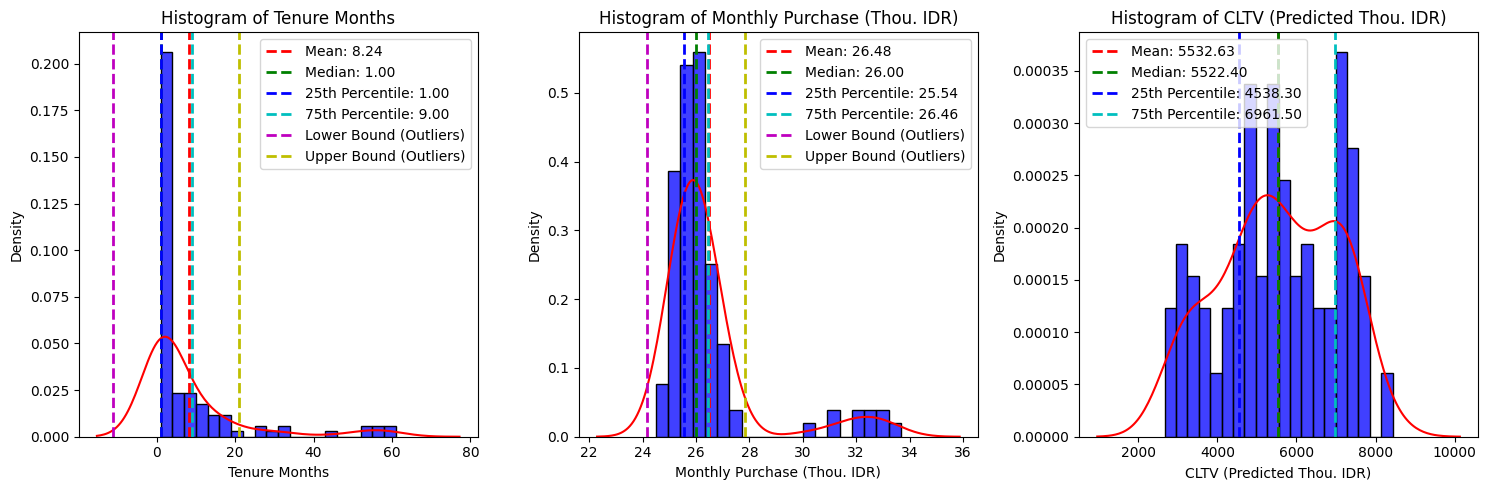

In [47]:
plot_multiple_histograms(lowend_churned, ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

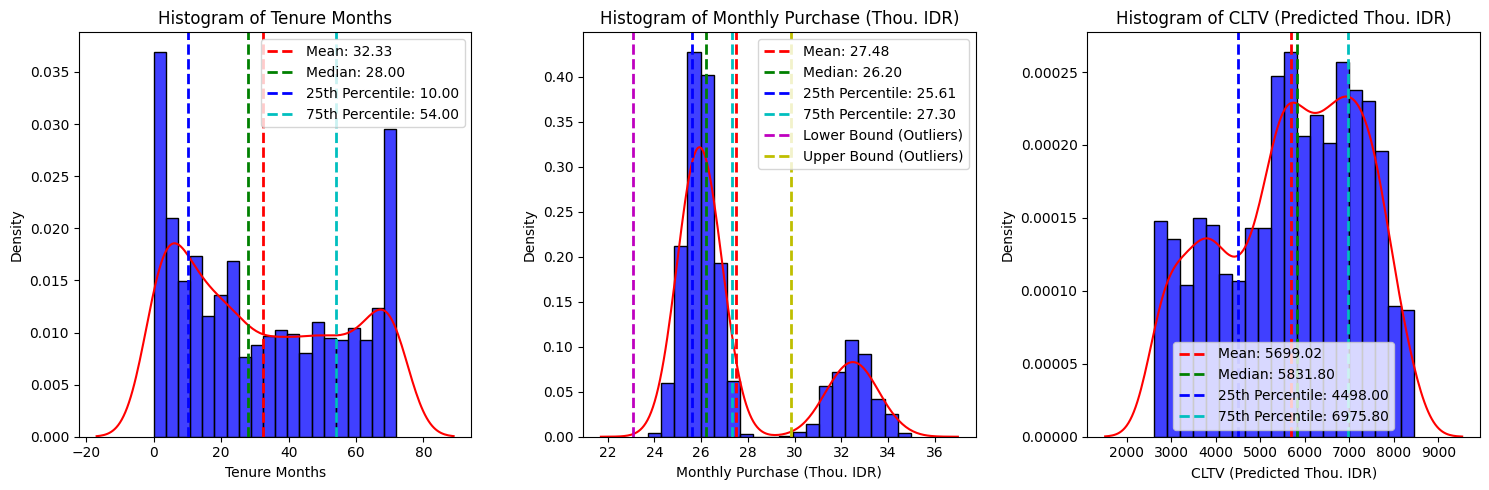

In [48]:
plot_multiple_histograms(lowend_nochurned, ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

Insights:
1. There are starks differences in Tenure Months and Monthly purchase of churned and not churned customers
2. Might be better to analyze churned customers without the outliers

In [49]:
def remove_outliers(df, columns):
    # Create a copy of the original DataFrame
    filtered_df = df.copy()

    # Loop through the specified columns
    for column in columns:
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace the values outside the bounds with NaN
        filtered_df.loc[~((df[column] >= lower_bound) & (df[column] <= upper_bound)), column] = None

    # Drop rows with NaN values in any of the specified columns
    filtered_df.dropna(subset=columns, inplace=True)

    return filtered_df

In [50]:
filtered_df_lowend = remove_outliers(lowend_churned, columns=['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

In [51]:
filtered_df_lowend_nochurned = remove_outliers(lowend_nochurned, columns=['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

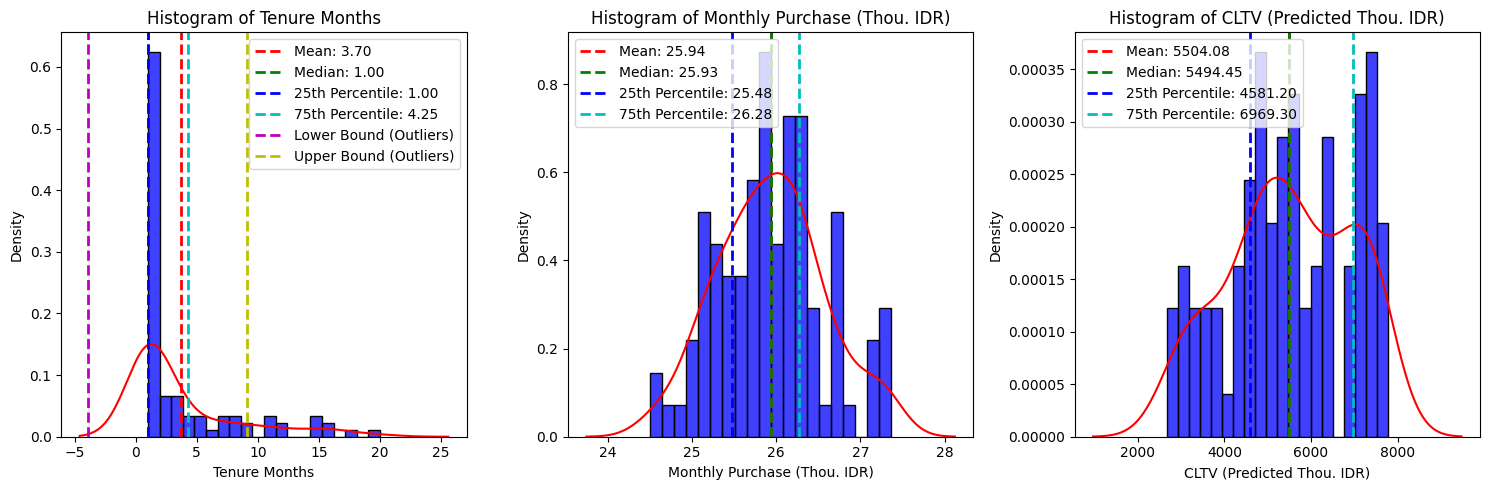

In [52]:
plot_multiple_histograms(filtered_df_lowend, ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

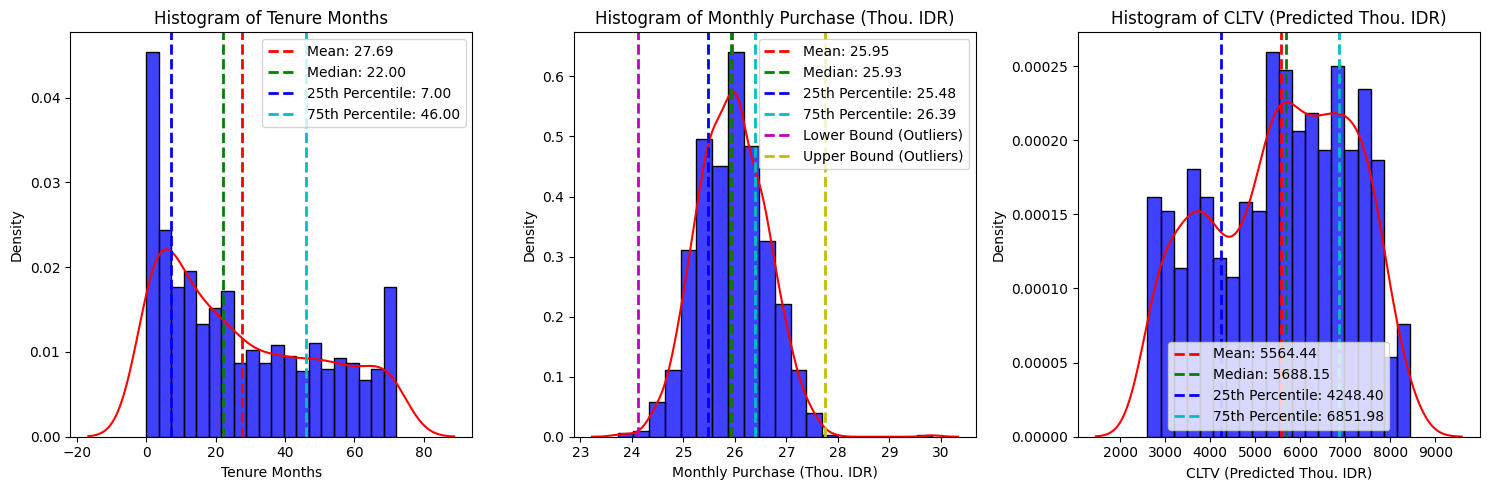

In [53]:
plot_multiple_histograms(filtered_df_lowend_nochurned, ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

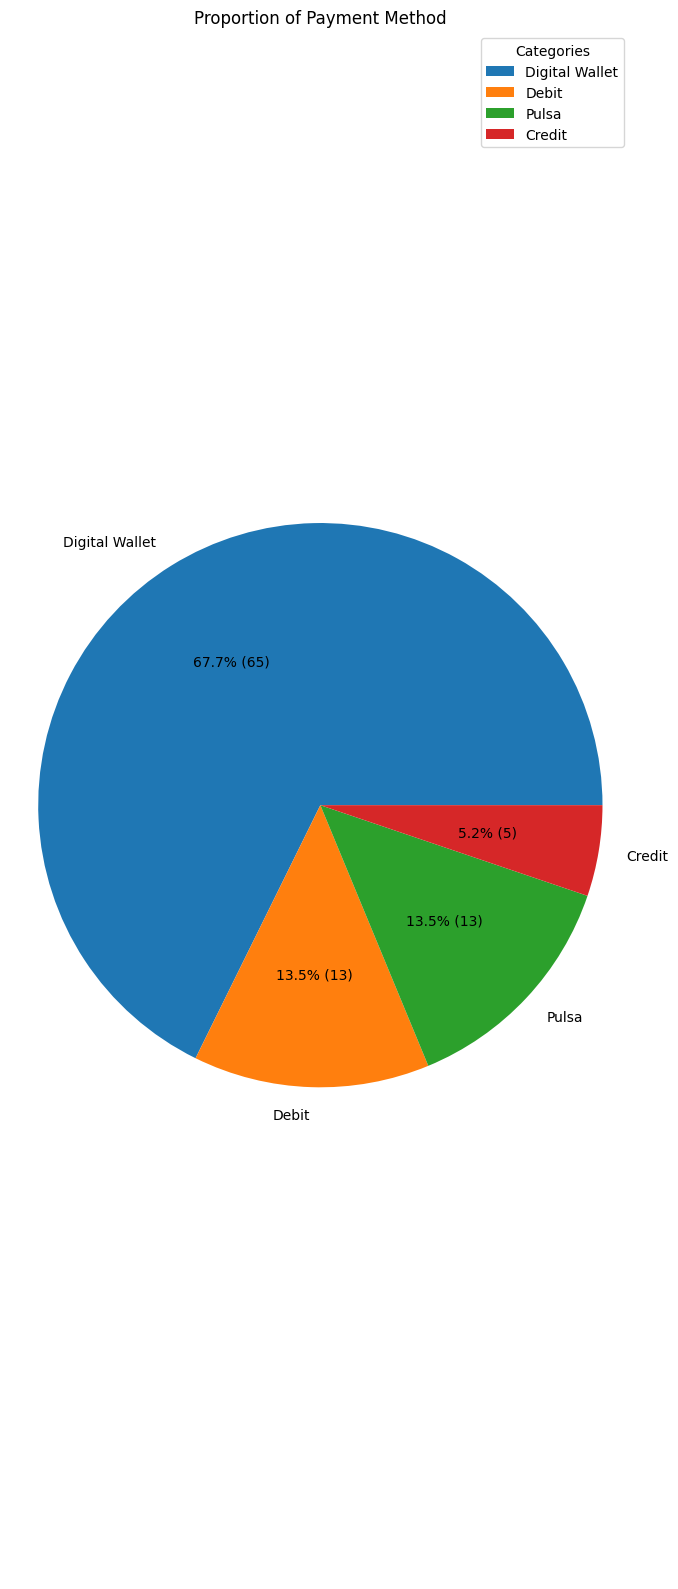

In [54]:
plot_pie_charts(filtered_df_lowend, ['Payment Method'])

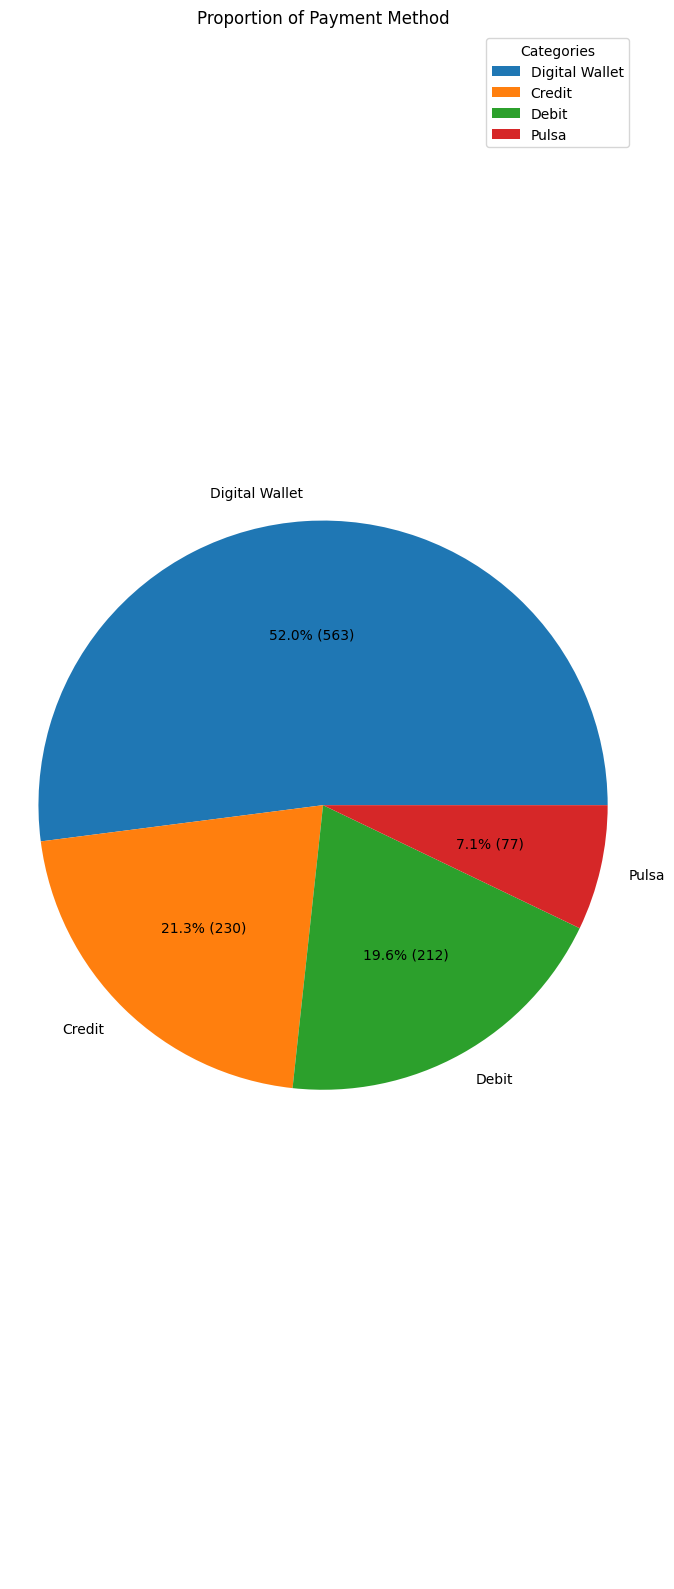

In [55]:
plot_pie_charts(filtered_df_lowend_nochurned, ['Payment Method'])

Answers:
1. Low End churners pays less and mostly are new users (low tenure months)
2. Low End non-churners pays more and have way higher average of low tenure months (27.69 vs 3.70)
3. CLTV of churners are lower on average
4. CLTV of non churners are higher on average
5. It's hard to conclude anything for payment method, might need hypothesis testing

Hypotheses:
1. Tenure months have significance impact to churning
2. Monthly purchase have significance impact to churning
3. CLTV have significance impact to churning
4. Payment method have significance impact to churning


Hypothesis testing on churning on low end devices

In [56]:
from sklearn.preprocessing import LabelEncoder
le_lowend = LabelEncoder()

In [57]:
lowend_churnencode = le_lowend.fit_transform(lowend['Churn Label'])

In [58]:
import statsmodels.api as sm

# Assuming you have a DataFrame 'data' with columns 'dependent_var' and 'independent_var1', 'independent_var2', etc.
# Create a design matrix including the constant term
X = lowend[['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']]
X = sm.add_constant(X)

# Define the dependent variable
y = lowend_churnencode

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the logistic regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.217825
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1526
Model:                          Logit   Df Residuals:                     1522
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 Nov 2023   Pseudo R-squ.:                  0.1749
Time:                        13:18:16   Log-Likelihood:                -332.40
converged:                       True   LL-Null:                       -402.85
Covariance Type:            nonrobust   LLR p-value:                 2.422e-30
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.1303      1.441     -0.784      0.433

In [59]:
# Create a contingency table
contingency_table = pd.crosstab(lowend['Payment Method'], lowend['Churn Label'])

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Squared Statistic: 21.87980438503346
P-value: 6.909733761247601e-05
Degrees of Freedom: 3
Expected Frequencies Table:
[[306.48951507  24.51048493]
 [307.41546527  24.58453473]
 [686.12909567  54.87090433]
 [112.96592398   9.03407602]]


Results:
1. Tenure months have significance impact statistically to churning in low end
2. Monthly purchase have no significance impact statistically to churning in low end
3. CLTV have no significance impact to churning in low end
4. Payment method have significance impact to churning in low end

##### 2.2.2. Churn Analysis on Mid End

In [60]:
midend_churned = midend[midend['Churn Label'] == 'Yes']
midend_nochurned = midend[midend['Churn Label'] == 'No']

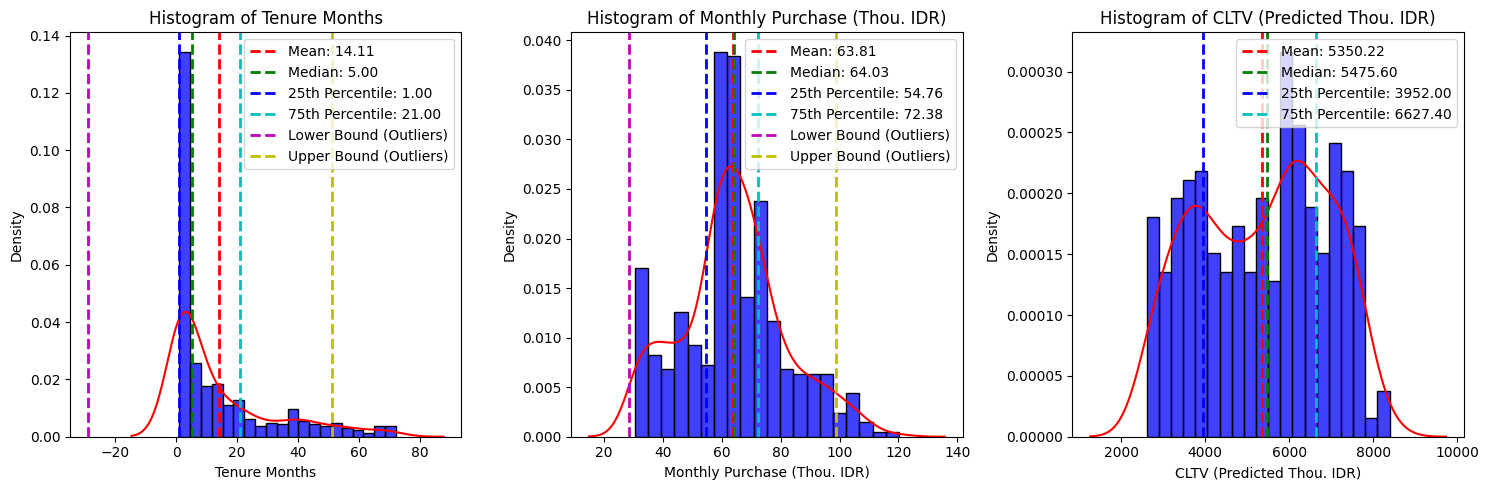

In [61]:
plot_multiple_histograms(midend_churned, ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

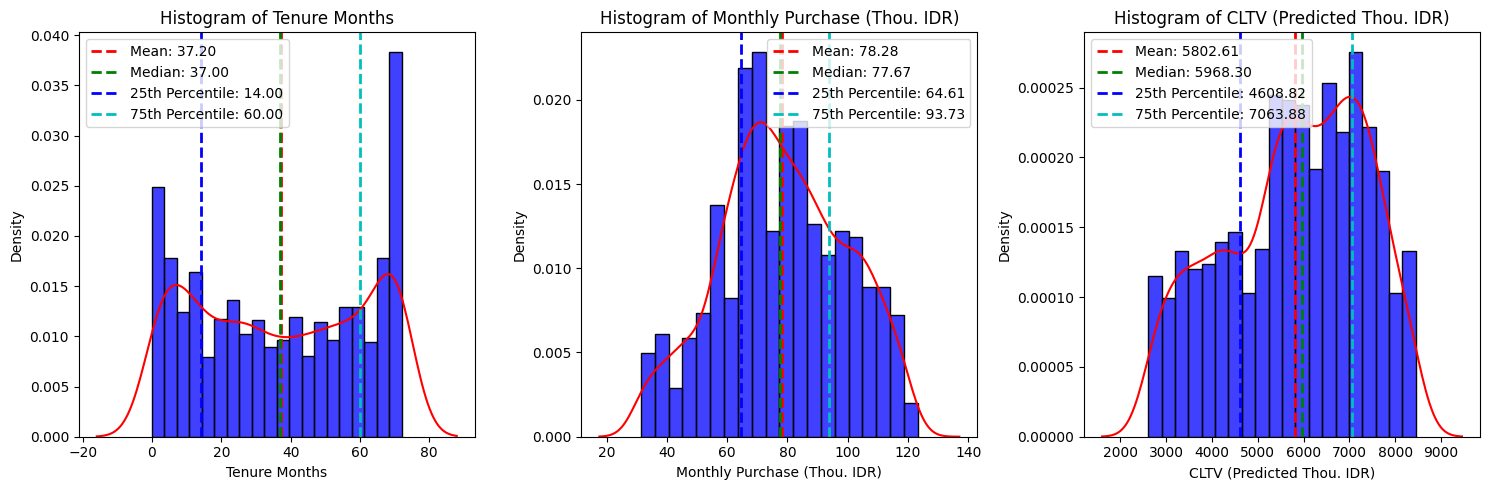

In [62]:
plot_multiple_histograms(midend_nochurned, ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

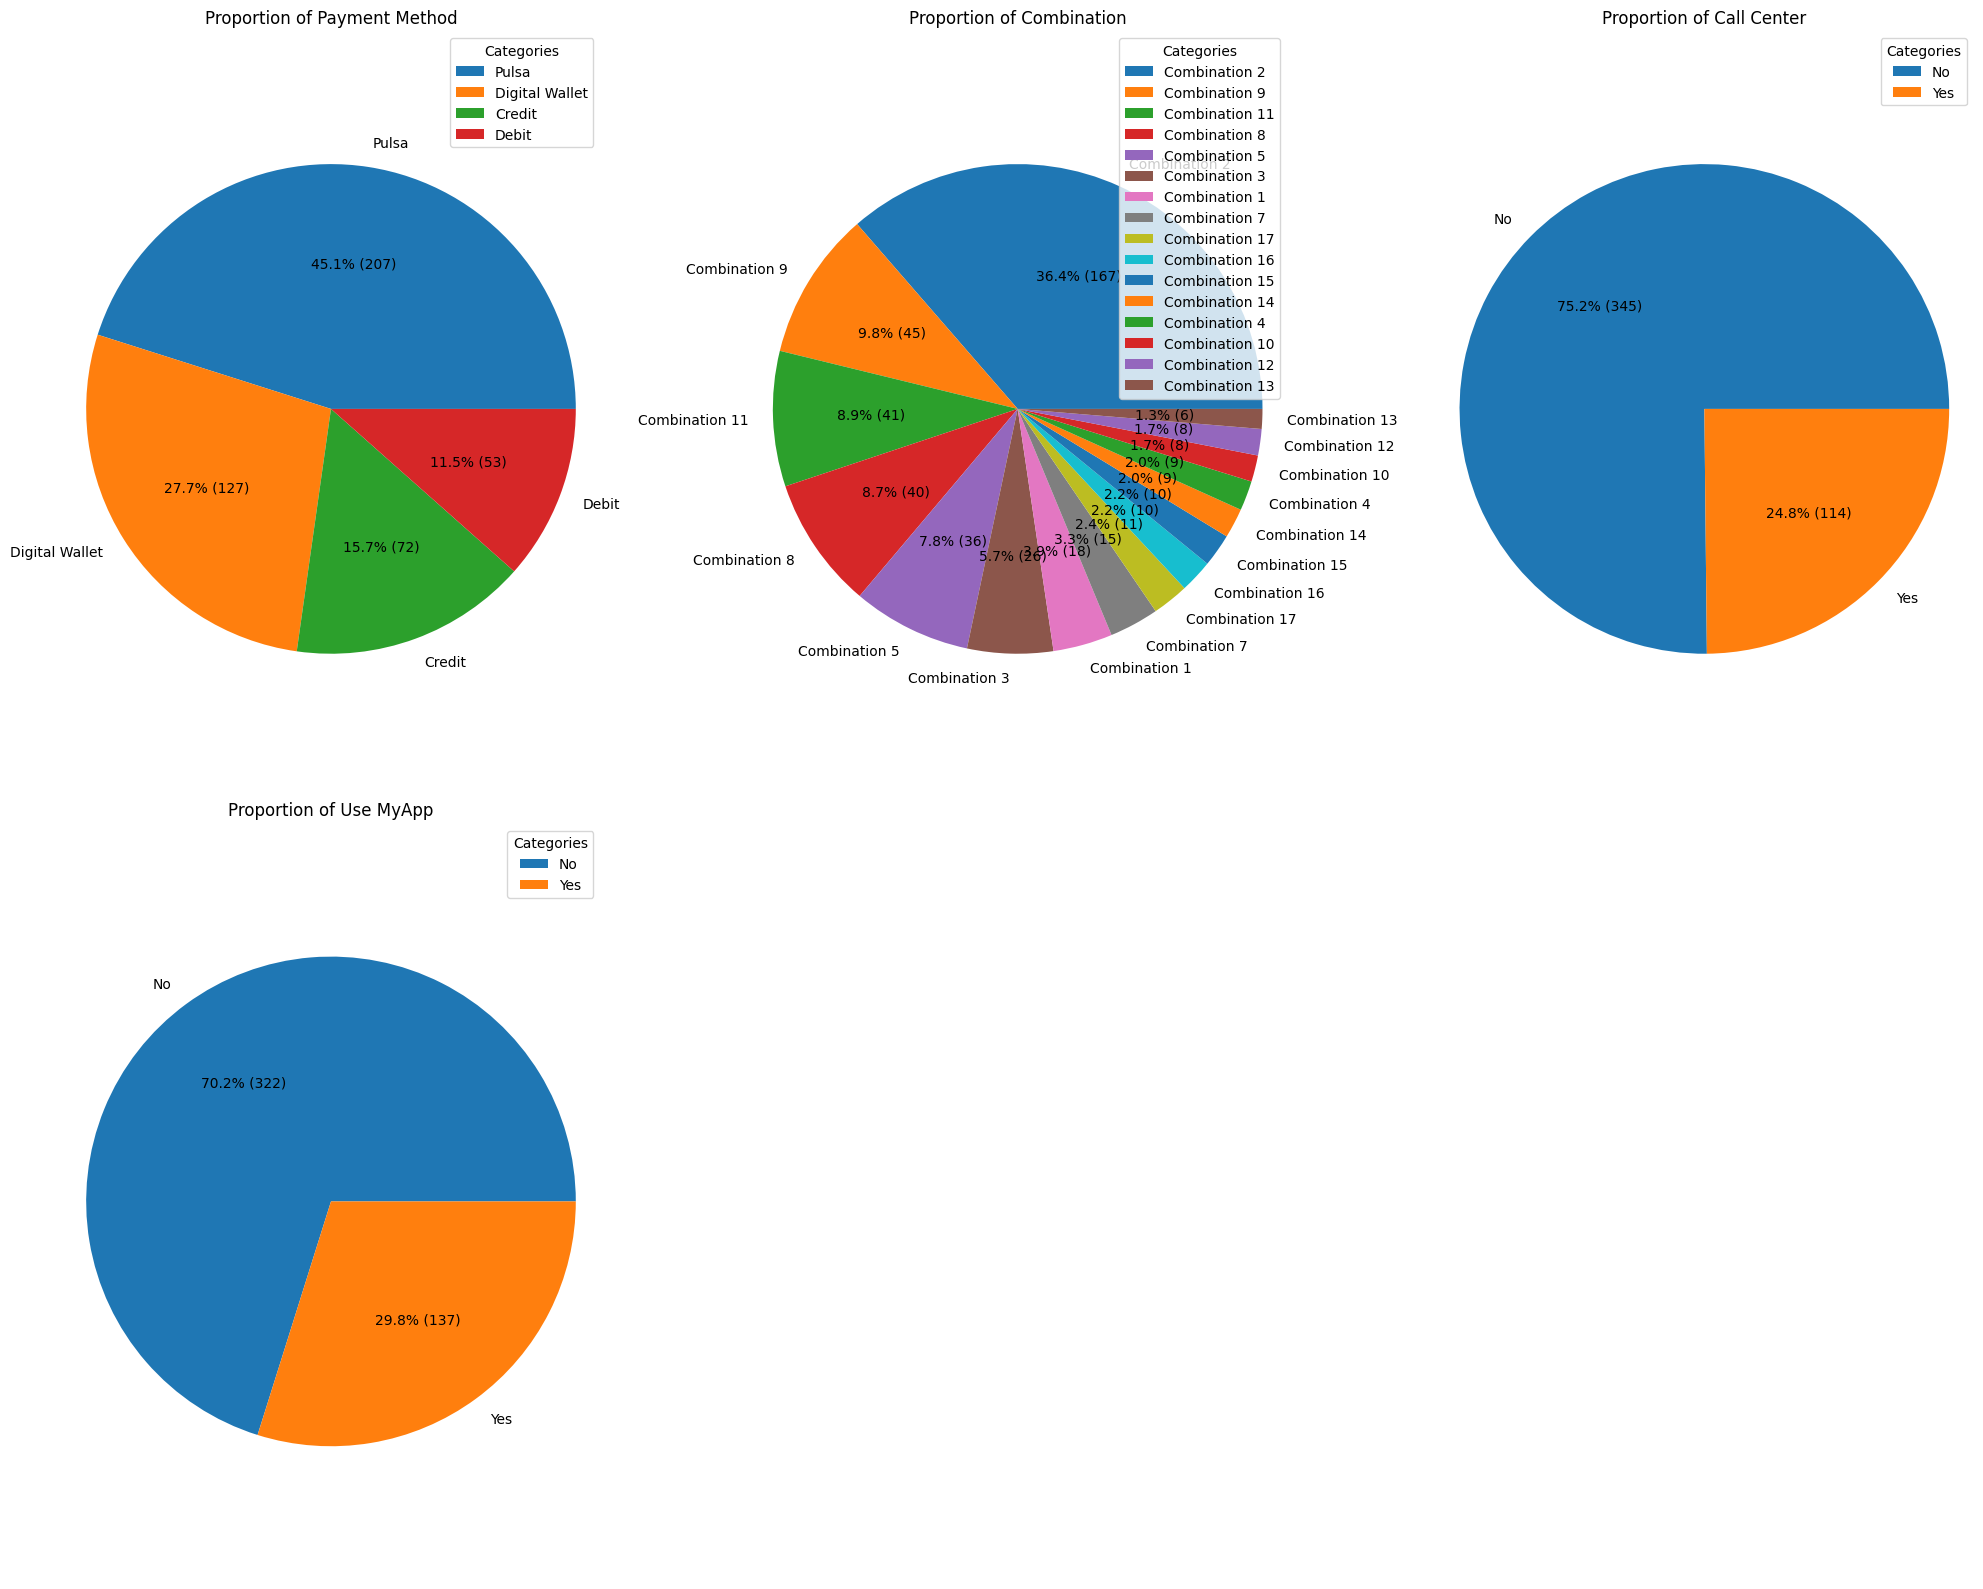

In [63]:
plot_pie_charts(midend_churned, ['Payment Method', 'Combination', 'Call Center', 'Use MyApp'])

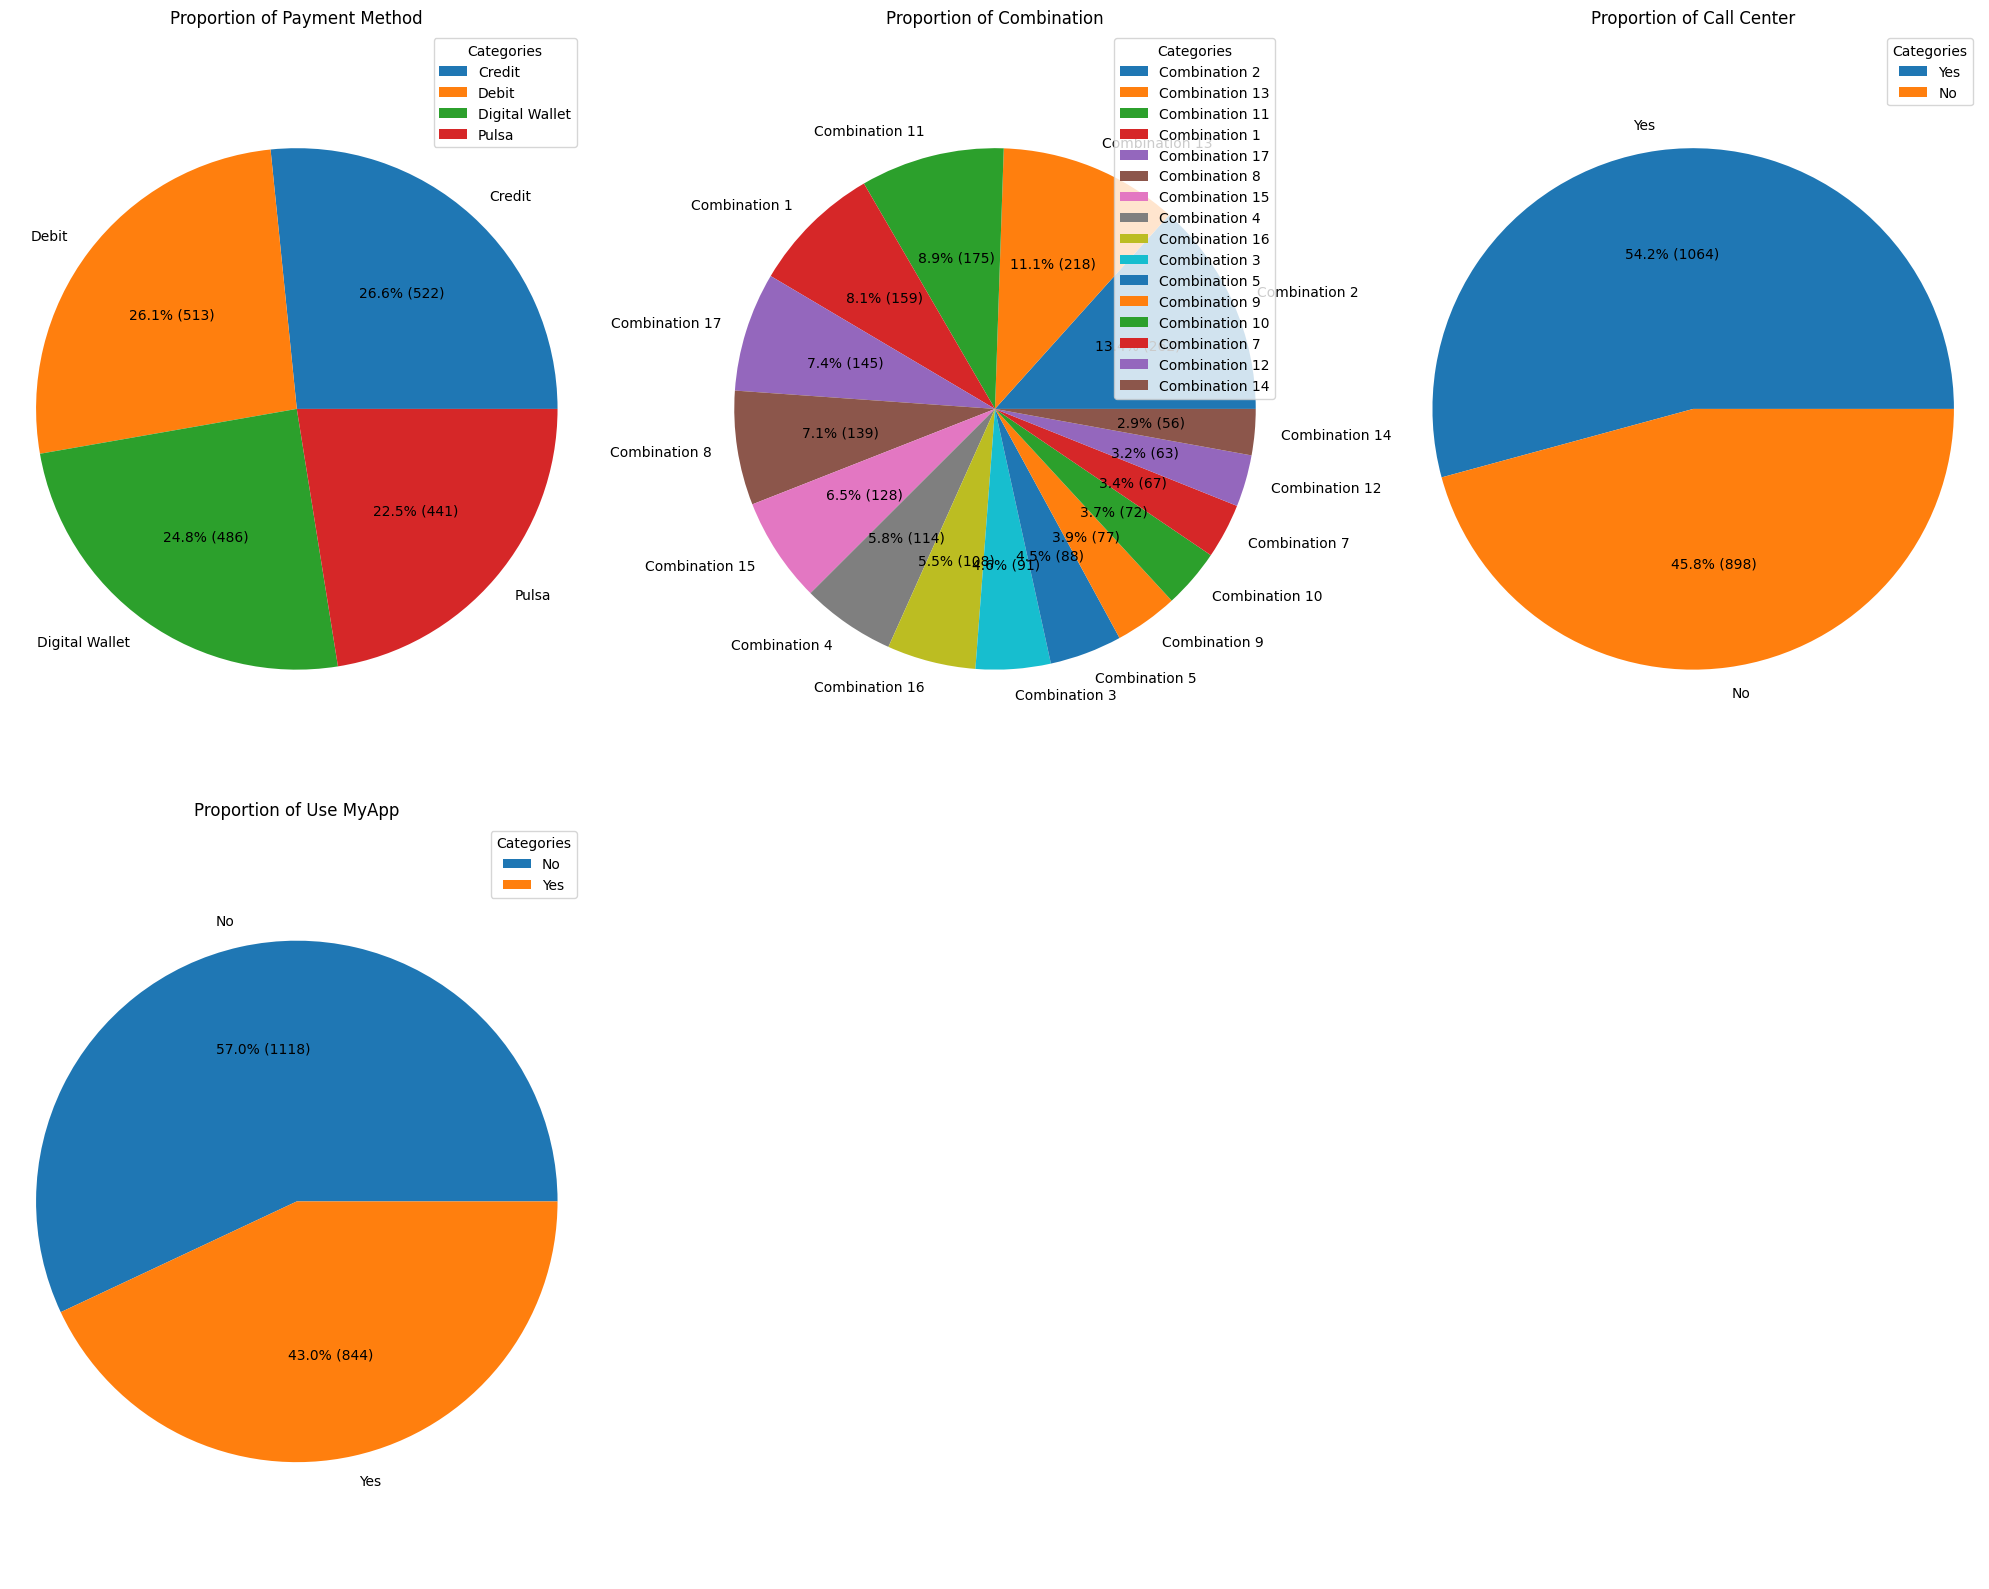

In [64]:
plot_pie_charts(midend_nochurned, ['Payment Method', 'Combination', 'Call Center', 'Use MyApp'])

Answers:
1. Mid End churners pays less and on average have low tenure months
2. Mid End non-churners pays more and have way higher average of low tenure months (27.69 vs 14.11)
3. CLTV of churners are lower on average
4. CLTV of non churners are higher on average
5. There are differences in Combination of product usage
6. There are differences in payment method usage between churners and non-churners
7. The are also differences in usage of MyApp and Call Center

Hypotheses:
1. Tenure months have significance impact to churning
2. Monthly purchase have significance impact to churning
3. CLTV have significance impact to churning
4. Payment method, MyApp, and Call Center have significance impact to churning
5. Combination of product usage have significant impact on churning

In [65]:
le_midend = LabelEncoder()

In [66]:
midend_churnencode = le_midend.fit_transform(midend['Churn Label'])

In [67]:
import statsmodels.api as sm

# Assuming you have a DataFrame 'data' with columns 'dependent_var' and 'independent_var1', 'independent_var2', etc.
# Create a design matrix including the constant term
X = midend[['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']]
X = sm.add_constant(X)

# Define the dependent variable
y = midend_churnencode

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the logistic regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.402811
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2421
Model:                          Logit   Df Residuals:                     2417
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 Nov 2023   Pseudo R-squ.:                  0.1705
Time:                        13:18:19   Log-Likelihood:                -975.21
converged:                       True   LL-Null:                       -1175.7
Covariance Type:            nonrobust   LLR p-value:                 1.340e-86
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.6794      0.288      2.357      0.018

In [68]:
# Create a contingency table
contingency_table = pd.crosstab(midend['Combination'], midend['Churn Label'])

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Squared Statistic: 248.78363831479254
P-value: 2.2102529682974463e-44
Degrees of Freedom: 15
Expected Frequencies Table:
[[143.44237918  33.55762082]
 [ 64.83271375  15.16728625]
 [175.04832714  40.95167286]
 [ 57.53903346  13.46096654]
 [181.53159851  42.46840149]
 [ 52.67657993  12.32342007]
 [111.83643123  26.16356877]
 [ 95.62825279  22.37174721]
 [126.42379182  29.57620818]
 [347.66542751  81.33457249]
 [ 94.81784387  22.18215613]
 [ 99.6802974   23.3197026 ]
 [100.49070632  23.50929368]
 [ 66.4535316   15.5464684 ]
 [145.06319703  33.93680297]
 [ 98.86988848  23.13011152]]


In [69]:
# Create a contingency table
contingency_table = pd.crosstab(midend['Payment Method'], midend['Churn Label'])

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Squared Statistic: 124.34043420198621
P-value: 8.964284273028361e-27
Degrees of Freedom: 3
Expected Frequencies Table:
[[481.38289963 112.61710037]
 [458.69144981 107.30855019]
 [496.78066914 116.21933086]
 [525.14498141 122.85501859]]


In [70]:
from scipy.stats import fisher_exact

contingency_table = pd.crosstab(midend['Call Center'], midend['Churn Label'])

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print the results
print("Odds Ratio:", odds_ratio)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The result is statistically significant.")
else:
    print("The result is not statistically significant.")

Odds Ratio: 0.27888198757763977
P-value: 7.72167238912942e-31
The result is statistically significant.


In [71]:
from scipy.stats import fisher_exact

contingency_table = pd.crosstab(midend['Use MyApp'], midend['Churn Label'])

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print the results
print("Odds Ratio:", odds_ratio)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The result is statistically significant.")
else:
    print("The result is not statistically significant.")

Odds Ratio: 0.5635910040917252
P-value: 2.0745976744457507e-07
The result is statistically significant.


Results:
1. Tenure months have significance impact to churning
2. Monthly purchase have significance impact to churning
3. CLTV have no significance impact to churning
4. Payment method, MyApp, and Call Center have significance impact to churning
5. Combination of product usage have significant impact on churning

##### 2.2.3. Churn Analysis on High End

In [72]:
highend_churned = highend[highend['Churn Label'] == 'Yes']
highend_nochurned = highend[highend['Churn Label'] == 'No']

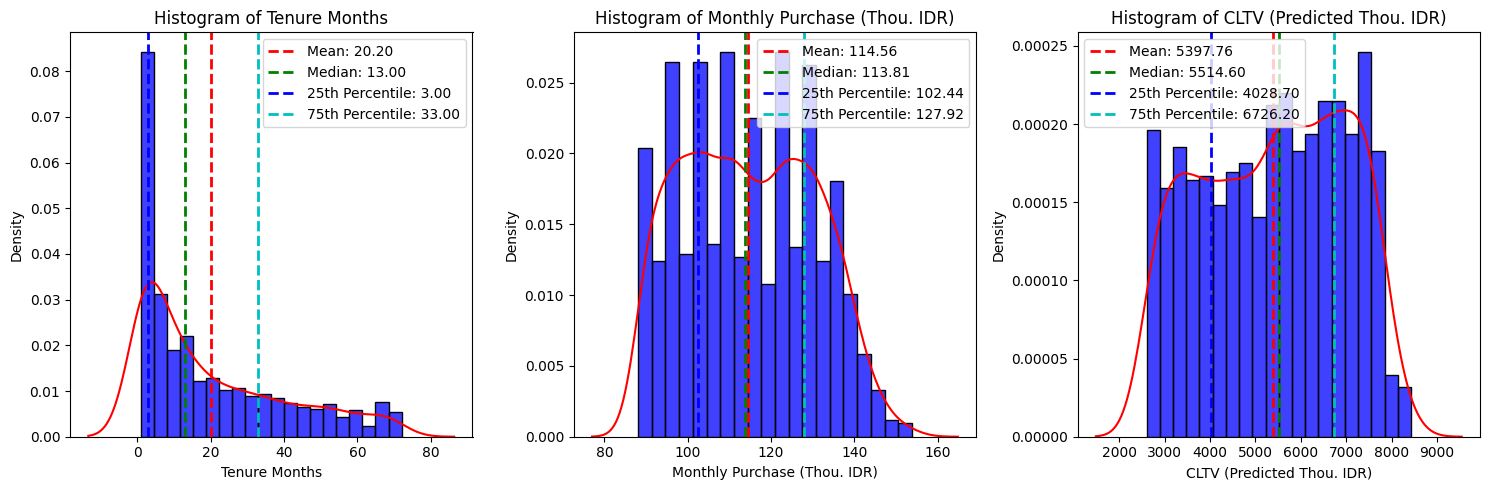

In [73]:
plot_multiple_histograms(highend_churned, ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

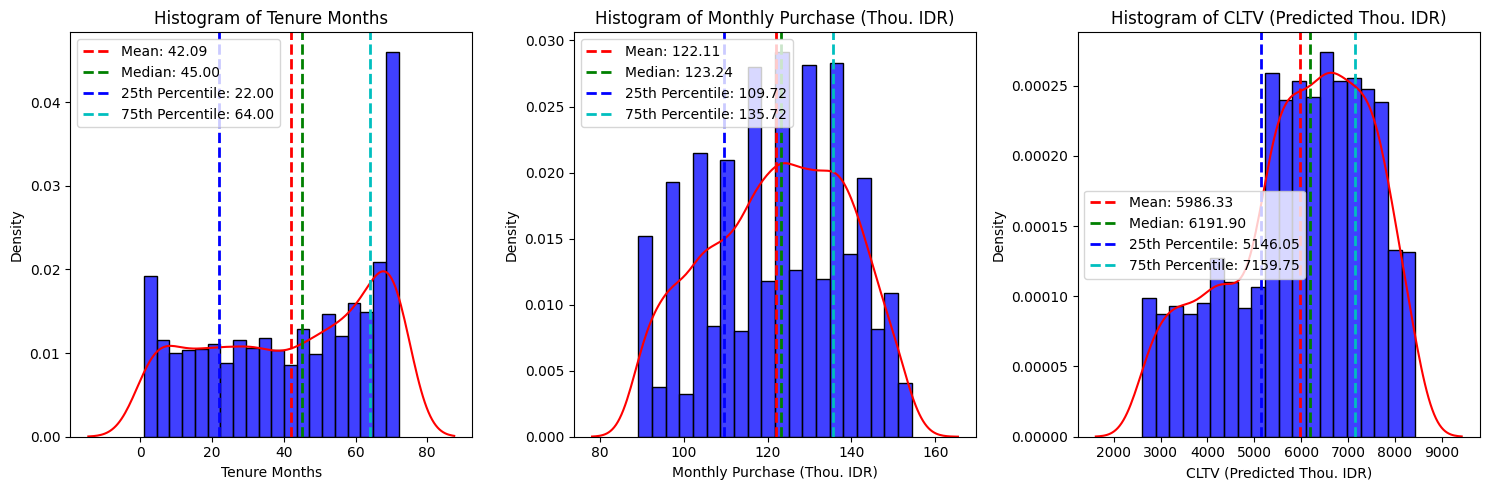

In [74]:
plot_multiple_histograms(highend_nochurned, ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)'])

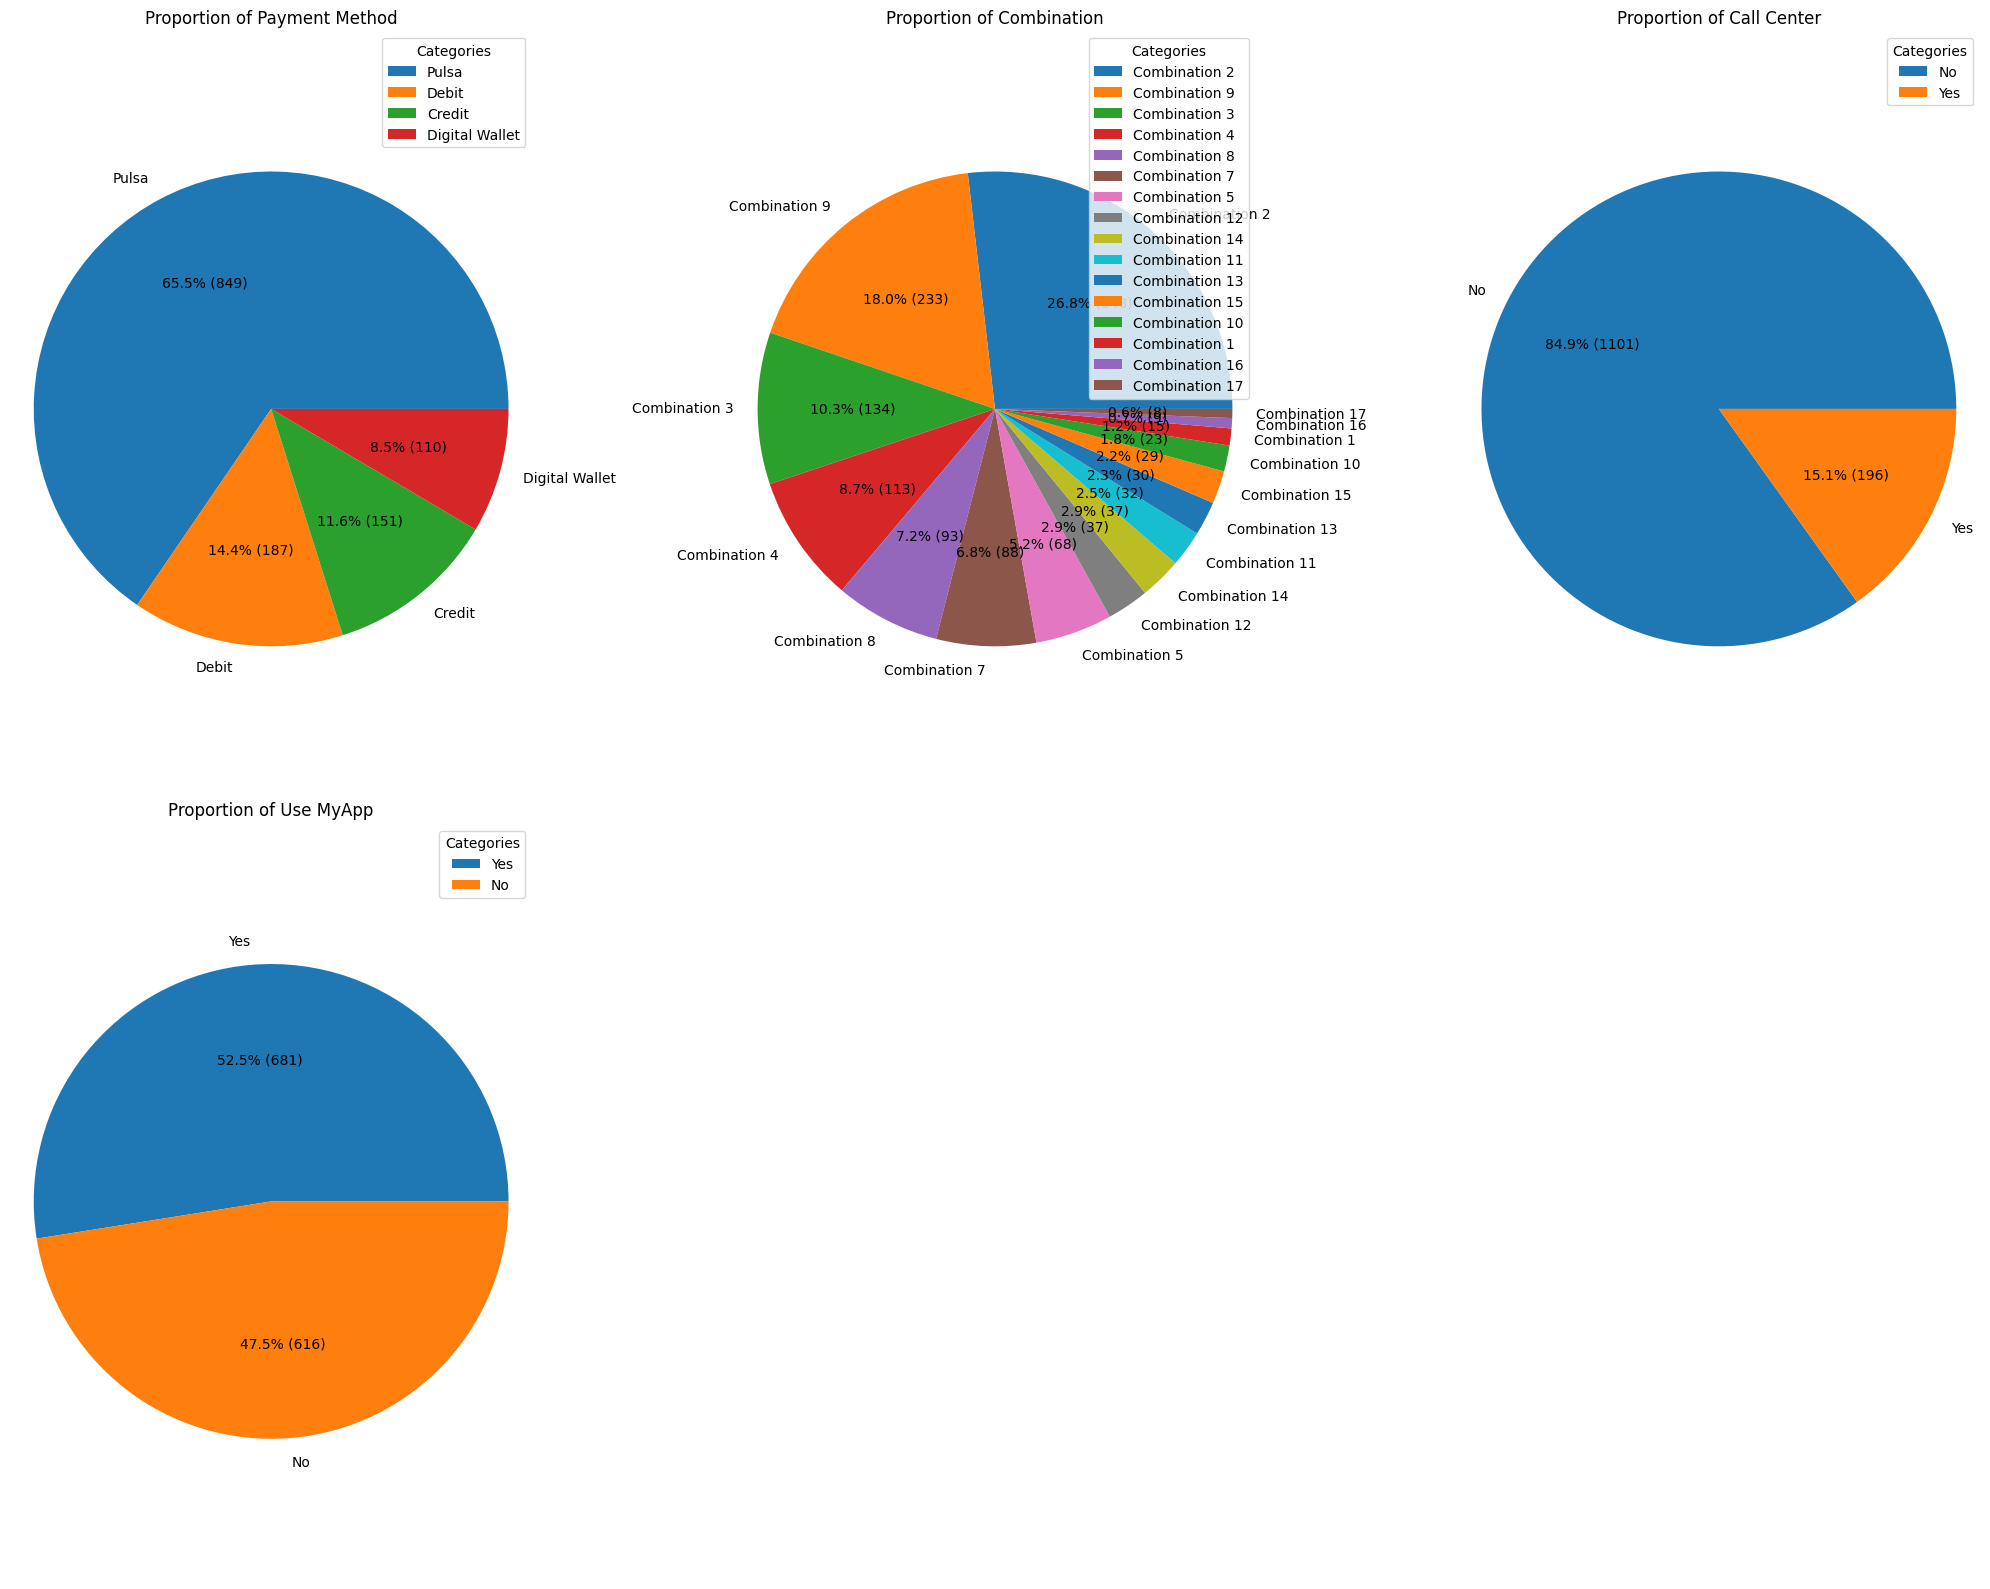

In [75]:
plot_pie_charts(highend_churned, ['Payment Method', 'Combination', 'Call Center', 'Use MyApp'])

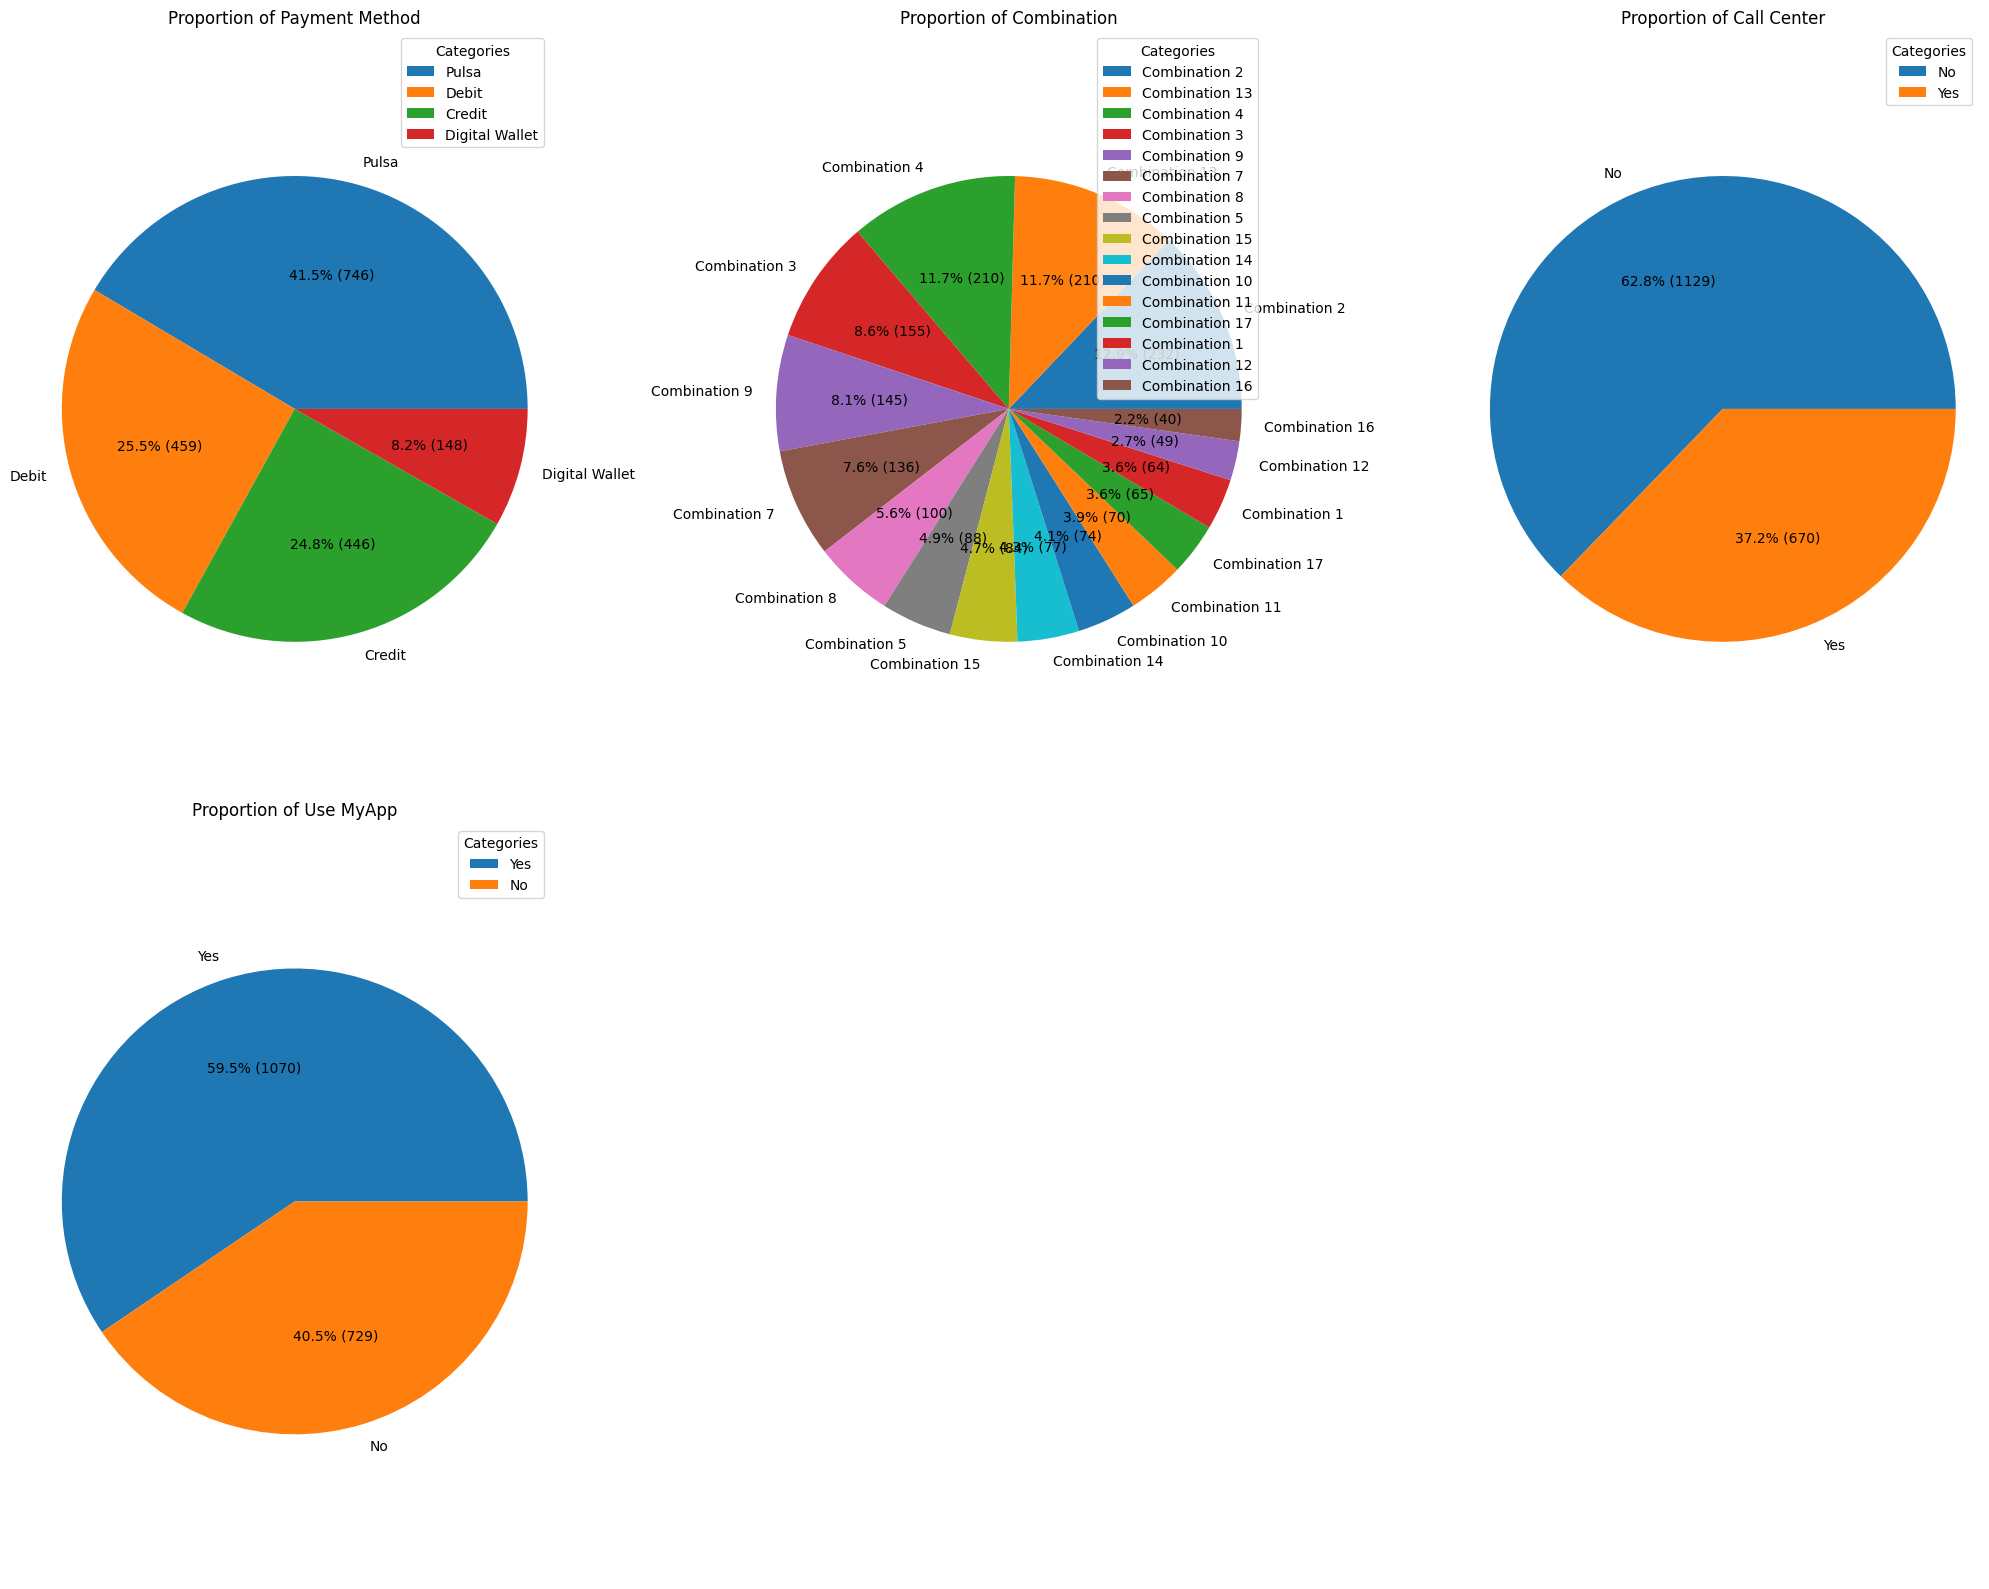

In [76]:
plot_pie_charts(highend_nochurned, ['Payment Method', 'Combination', 'Call Center', 'Use MyApp'])

Answers:
1. High End churners pays less and on average have low tenure months
2. High End non-churners pays more and have way higher average of low tenure months (20.20 vs 42.09)
3. CLTV of churners are lower on average
4. CLTV of non churners are higher on average
5. There are differences in Combination of product usage
6. There are differences in payment method usage between churners and non-churners
7. The are also differences in usage of Call Center but not in MyApp

Hypotheses:
1. Tenure months have significance impact to churning
2. Monthly purchase have significance impact to churning
3. CLTV have significance impact to churning
4. Payment method and Call Center have significance impact to churning
5. Combination of product usage have significant impact on churning
6. Usage of MyApp have no significance impact on churning

In [77]:
le_highend = LabelEncoder()

In [78]:
highend_churnencode = le_highend.fit_transform(highend['Churn Label'])

In [79]:
import statsmodels.api as sm

# Assuming you have a DataFrame 'data' with columns 'dependent_var' and 'independent_var1', 'independent_var2', etc.
# Create a design matrix including the constant term
X = highend[['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']]
X = sm.add_constant(X)

# Define the dependent variable
y = highend_churnencode

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the logistic regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.572103
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3096
Model:                          Logit   Df Residuals:                     3092
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 Nov 2023   Pseudo R-squ.:                  0.1586
Time:                        13:18:22   Log-Likelihood:                -1771.2
converged:                       True   LL-Null:                       -2105.1
Covariance Type:            nonrobust   LLR p-value:                2.069e-144
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.2286      0.368     -0.622      0.534

In [80]:
# Create a contingency table
contingency_table = pd.crosstab(highend['Combination'], highend['Churn Label'])

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Squared Statistic: 327.625603378966
P-value: 9.899277389673564e-61
Degrees of Freedom: 15
Expected Frequencies Table:
[[ 45.90471576  33.09528424]
 [ 56.36401809  40.63598191]
 [ 59.26937984  42.73062016]
 [ 49.97222222  36.02777778]
 [139.45736434 100.54263566]
 [ 66.24224806  47.75775194]
 [ 65.66117571  47.33882429]
 [ 28.47254522  20.52745478]
 [ 42.41828165  30.58171835]
 [337.02196382 242.97803618]
 [167.92990956 121.07009044]
 [187.68636951 135.31363049]
 [ 90.64728682  65.35271318]
 [130.16020672  93.83979328]
 [112.14696382  80.85303618]
 [219.64534884 158.35465116]]


In [81]:
# Create a contingency table
contingency_table = pd.crosstab(highend['Payment Method'], highend['Churn Label'])

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Squared Statistic: 196.30966273547975
P-value: 2.6454825231728338e-42
Degrees of Freedom: 3
Expected Frequencies Table:
[[346.9001938  250.0998062 ]
 [375.37273902 270.62726098]
 [149.91666667 108.08333333]
 [926.81040052 668.18959948]]


In [82]:
from scipy.stats import fisher_exact

contingency_table = pd.crosstab(highend['Call Center'], highend['Churn Label'])

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print the results
print("Odds Ratio:", odds_ratio)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The result is statistically significant.")
else:
    print("The result is not statistically significant.")

Odds Ratio: 0.29997695446473355
P-value: 1.0590592710233003e-43
The result is statistically significant.


In [83]:
from scipy.stats import fisher_exact

contingency_table = pd.crosstab(highend['Use MyApp'], highend['Churn Label'])

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print the results
print("Odds Ratio:", odds_ratio)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The result is statistically significant.")
else:
    print("The result is not statistically significant.")

Odds Ratio: 0.7531997208399077
P-value: 0.00011470245416228558
The result is statistically significant.


Results:
1. Tenure months have significance impact to churning
2. Monthly purchase have significance impact to churning
3. CLTV have no significance impact to churning
4. Payment method, MyApp, and Call Center have significance impact to churning
5. Combination of product usage have significant impact on churning

### 3. Modelling

#### 3.1. Modelling for Low End Devices


#### 3.1.1. Feature Selection

In [139]:
X = lowend[['Tenure Months', 'Payment Method']]
y = LabelEncoder().fit_transform(lowend['Churn Label'])

In [140]:
#X['Payment Method'] = LabelEncoder().fit_transform(X['Payment Method'])

C:\Users\luthf\AppData\Local\Temp\ipykernel_30724\806305795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Payment Method'] = LabelEncoder().fit_transform(X['Payment Method'])


In [149]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit and transform the 'Payment Method' column
df['Payment Method'] = encoder.fit_transform(df['Payment Method'])

# Print the unique classes and their corresponding encoded values
print("Classes:", encoder.classes_)
print("Encoded values:", list(set(df['Payment Method'])))


Classes: ['Credit' 'Debit' 'Digital Wallet' 'Pulsa']
Encoded values: [0, 1, 2, 3]


In [142]:
X

Tenure Months  Payment Method
7                 1               2
22                5               2
65               59               2
99               11               2
103               1               2
...             ...             ...
7023             51               1
7024             39               2
7025             12               3
7033              2               2
7038             72               1

[1526 rows x 2 columns]

#### 3.1.2. Baseline Testing

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       424
           1       0.06      0.06      0.06        34

    accuracy                           0.86       458
   macro avg       0.49      0.49      0.49       458
weighted avg       0.86      0.86      0.86       458



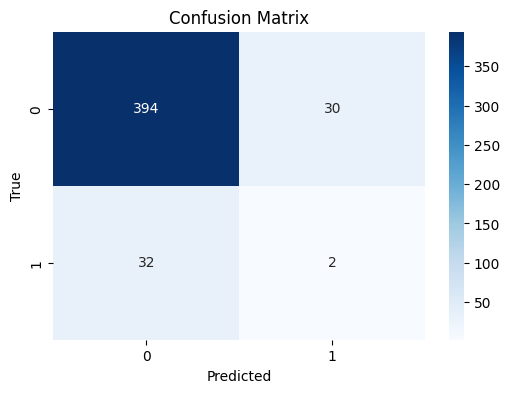

In [89]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create a random baseline model
dummy = DummyClassifier(strategy="stratified")

dummy.fit(X=X_train, y=y_train)

# Generate random predictions
y_pred = dummy.predict(X_test)  # Replace X_test with your test data

# Evaluate the random baseline model
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       424
           1       0.00      0.00      0.00        34

    accuracy                           0.91       458
   macro avg       0.46      0.49      0.48       458
weighted avg       0.86      0.91      0.88       458



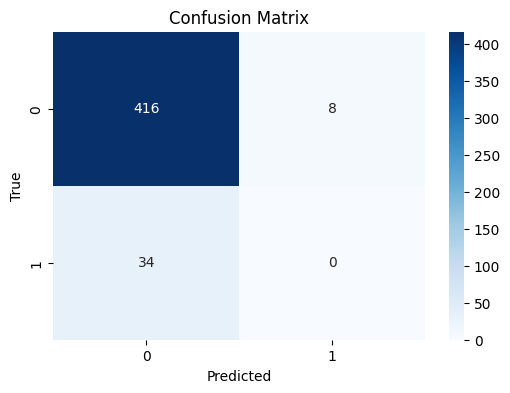

In [90]:
from sklearn.neighbors import KNeighborsClassifier

baseline_low = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(X_train, y_train)

y_pred = baseline_low.predict(X_test)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86       424
           1       0.18      0.62      0.28        34

    accuracy                           0.77       458
   macro avg       0.57      0.70      0.57       458
weighted avg       0.90      0.77      0.82       458



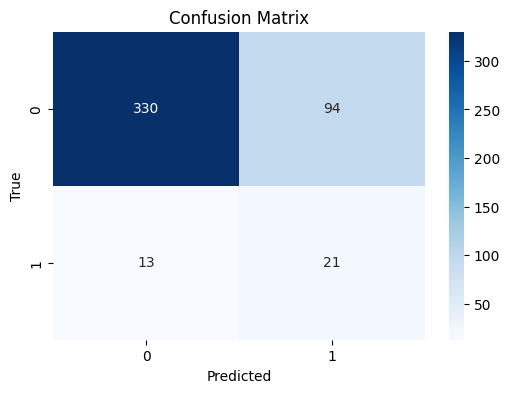

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=42, class_weight='balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 3.1.3. Model Selection

Regression Model Test (Logistic Regression)

In [92]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 150, 200],
    'class_weight':['balanced', {0: 1, 1: 20}, {0:1, 1:1}]
}

# Create the logistic regression model
logistic_regression = LogisticRegression()

custom_cv = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=custom_cv, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [93]:
best_model

LogisticRegression(C=0.001, class_weight='balanced', solver='liblinear')

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85       424
           1       0.18      0.65      0.28        34

    accuracy                           0.76       458
   macro avg       0.57      0.71      0.57       458
weighted avg       0.91      0.76      0.81       458



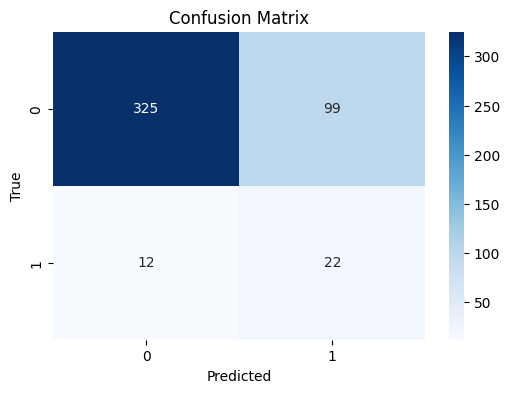

In [94]:
y_pred = best_model.predict(X_test)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [98]:
import pickle

In [99]:
# Load the Random Forest model from the pickle file
model = pickle.load(open('model_low.pkl', 'rb'))

# Define the columns for user input
columns = ['Tenure Months','Payment Method']

# Create a function to preprocess user input and make predictions


def predict_churn(input_data):
    # Preprocess the input data
    input_df = pd.DataFrame([input_data], columns=columns)

    # Make predictions using the loaded model
    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)[:, 1]

    return prediction[0], probability[0]

input_data = {
        'Tenure Months': 4,
        'Payment Method': 2
        }

 # Predict churn based on user input
churn_probability = predict_churn(input_data)
churn_prediction=churn_probability[1]

In [100]:
# Define the columns for user input
columns = ['Tenure Months','Payment Method']

# Create a function to preprocess user input and make predictions


def predict_churn(input_data):
    # Preprocess the input data
    input_df = pd.DataFrame([input_data], columns=columns)

    # Make predictions using the loaded model
    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)[:, 1]

    return prediction[0], probability[0]

In [102]:
input_data = {
        'Tenure Months': 4,
        'Payment Method': 2
        }

In [103]:
 # Predict churn based on user input
churn_probability = predict_churn(input_data)
churn_prediction=churn_probability[1]

In [104]:
churn_prediction

0.5656462122498311

In [105]:
if churn_prediction >= 0.4:
    print("The customer is likely to churn.")
else:
    print("The customer is unlikely to churn.")

The customer is likely to churn.


Nearest Neighbors Algorithm

In [95]:
# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Create the logistic regression model
knn = KNeighborsClassifier()

custom_cv = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(knn, param_grid, cv=custom_cv, scoring='f1')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

In [96]:
best_model_knn

KNeighborsClassifier(n_neighbors=1)

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       424
           1       0.07      0.03      0.04        34

    accuracy                           0.90       458
   macro avg       0.50      0.50      0.49       458
weighted avg       0.86      0.90      0.88       458



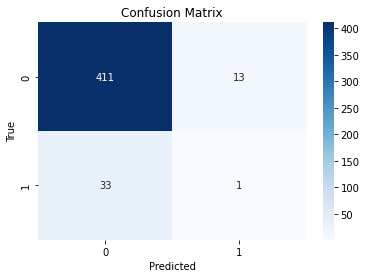

In [97]:
y_pred = best_model_knn.predict(X_test)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Support Vector Machine Model

In [98]:
from sklearn.svm import SVC

In [99]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced', {0:1, 1:1}]
}

# Create the logistic regression model
SVC_low = SVC()

custom_cv = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_SVC_low = GridSearchCV(SVC_low, param_grid, cv=custom_cv, scoring='f1')
grid_search_SVC_low.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_SVC_low = grid_search_SVC_low.best_params_
best_model_SVC_low = grid_search_SVC_low.best_estimator_

Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.72      0.82       424
           1       0.16      0.68      0.26        34

    accuracy                           0.71       458
   macro avg       0.56      0.70      0.54       458
weighted avg       0.91      0.71      0.78       458



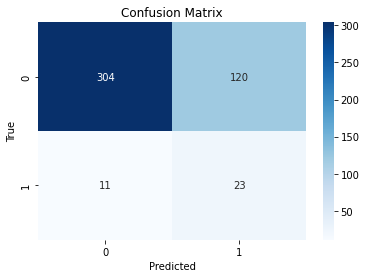

In [100]:
y_pred = best_model_SVC_low.predict(X_test)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Tree Based Algorithm (Decision Tree --> Random Forest --> XGBoost)

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [102]:
# Define the parameter grid for grid search
param_grid = {
    'min_samples_split': [2, 20, 40],
    'min_samples_leaf': [1, 10, 20],
    'max_depth': [10, None],
    'criterion': ['gini', 'log_loss', 'entropy'],
    'splitter': ['best', 'random'],
    'class_weight': ['balanced', {0:1, 1:1}]
}

# Create the logistic regression model
dtc_low = DecisionTreeClassifier()

custom_cv = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_dtc_low = GridSearchCV(dtc_low, param_grid, cv=custom_cv, scoring='f1')
grid_search_dtc_low.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_dtc_low = grid_search_dtc_low.best_params_
best_model_dtc_low = grid_search_dtc_low.best_estimator_

In [103]:
best_model_dtc_low

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=20, min_samples_split=40,
                       splitter='random')

Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.71      0.82       424
           1       0.16      0.68      0.26        34

    accuracy                           0.71       458
   macro avg       0.56      0.69      0.54       458
weighted avg       0.90      0.71      0.78       458



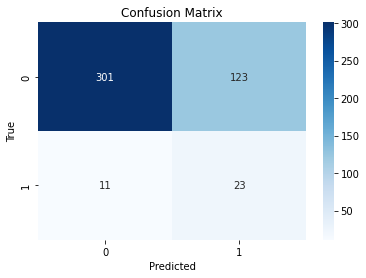

In [104]:
y_pred = best_model_dtc_low.predict(X_test)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, None],
    'min_samples_split': [2, 20, 40],
    'min_samples_leaf': [1, 10, 20],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', {0:1, 1:1}]
}

# Create the logistic regression model
rfc_low = RandomForestClassifier()

custom_cv = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_rfc_low = GridSearchCV(rfc_low, param_grid, cv=custom_cv, scoring='f1')
grid_search_rfc_low.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_rfc_low = grid_search_rfc_low.best_params_
best_model_rfc_low = grid_search_rfc_low.best_estimator_

In [ ]:
best_model_rfc_low

In [ ]:
y_pred = best_model_rfc_low.predict(X_test)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_weight = sum(y_train == 0) / sum(y_train == 1)

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, None],
    'learning_rate': [0.03, 0.3, 3],
    'gamma': [0, 1, 10],
    'scale_pos_weight': [class_weight]
}

# Create the logistic regression model
xgb_low = XGBClassifier()

custom_cv = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_xgb_low = GridSearchCV(xgb_low, param_grid, cv=custom_cv, scoring='f1')
grid_search_xgb_low.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params_xgb_low = grid_search_xgb_low.best_params_
best_model_xgb_low = grid_search_xgb_low.best_estimator_

In [ ]:
best_model_xgb_low

In [ ]:
y_pred = best_model_xgb_low.predict(X_test)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Neural Network Classifier

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, AUC, F1Score
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import f1_score, recall_score

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [ ]:
y_train_float = np.array(y_train, dtype=np.float32)

In [ ]:
# # Define a custom callback to calculate F1 score during training
# class F1ScoreCallback(keras.callbacks.Callback):
#     def __init__(self, validation_data):
#         super().__init__()
#         self.validation_data = validation_data
#         self.best_f1 = 0.0

#     def on_epoch_end(self, epoch, logs=None):
#         X_val, y_val = self.validation_data
#         y_pred = self.model.predict(X_val)
#         y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels
#         f1 = f1_score(y_val, y_pred)
#         if f1 > self.best_f1:
#             self.best_f1 = f1
#             self.model.save('best_f1_model.h5')

# Create a neural network model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[BinaryAccuracy(name='accuracy'),
                           Precision(name='precision'),
                           Recall(name='recall'),
                           F1Score(name='f1')])

# Set up early stopping
early_stopping = EarlyStopping(monitor='f1', patience=20, mode='max', restore_best_weights=True)

# # Create an instance of the F1ScoreCallback
# f1_score_callback = F1ScoreCallback(validation_data=(X_test, y_test))

nn_low_result = model.fit(X_train, y_train_float, epochs=10000, batch_size=8, callbacks=[early_stopping], class_weight=class_weight_dict, validation_split=0.2)

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Model Results:
Logistic Regression Model will be selected based on performance and inference time

#### 3.1.3. Model Classification Analysis

In [ ]:
y_pred = best_model.predict(X)

# Evaluate the random baseline model
accuracy = accuracy_score(y, y_pred)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Create a DataFrame with additional columns
data = {'Actual': y, 'Predicted': y_pred, 'Result': ['TP' if (a, p) == (1, 1) else 'TN' if (a, p) == (0, 0)
                                                           else 'FP' if (a, p) == (0, 1) else 'FN' for a, p in zip(y, y_pred)]}

predictions_lowend = pd.DataFrame(data)

In [ ]:
lowend.reset_index(inplace=True)

In [ ]:
lowend['Result'] = predictions_lowend['Result']

In [ ]:
y_pred_prob = best_model.predict_proba(X)

In [ ]:
max_probabilities = np.max(y_pred_prob, axis=1)

In [ ]:
lowend['prediction_confidence'] = max_probabilities

In [ ]:
lowend['prediction'] = y_pred

In [ ]:
plot_multiple_histograms(lowend[lowend['prediction'] == 1], ['prediction_confidence'])

In [ ]:
plot_multiple_histograms(lowend[(lowend['prediction'] == 0)], ['prediction_confidence'])

In [ ]:
lowend['Churn_Risk'] = pd.cut(lowend['prediction_confidence'][lowend['prediction'] == 1], bins=[0.5, 0.54, 1], labels=['Notable', 'Threatening'])

In [ ]:
cut_result = pd.cut(lowend['prediction_confidence'][lowend['prediction'] == 0], bins=[0.5, 0.92, 1], labels=['Low', 'Least Concern'])
lowend['Churn_Risk'] = lowend['Churn_Risk'].astype('object')
lowend.loc[lowend.index.isin(cut_result.index), 'Churn_Risk'] = cut_result

In [ ]:
lowend

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def calculate_customer_value(df):
    # Create a new column based on the conditions
    df['customer_priority'] = df.apply(lambda row: row['CLTV (Predicted Thou. IDR)'] * (1 - row['prediction_confidence']) if row['prediction'] == 0 else row['CLTV (Predicted Thou. IDR)'] * row['prediction_confidence'], axis=1)

    # Min-Max scaling
    scaler = MinMaxScaler()
    customer_priority = df['customer_priority'].values.reshape(-1, 1)
    df['customer_priority'] = scaler.fit_transform(customer_priority)

    # Label categorization
    df['customer_priority'] = pd.cut(df['customer_priority'], bins=[0, 0.3, 0.7, 1], labels=['Low', 'Moderate', 'High'], include_lowest=True)

    return df

In [ ]:
lowend = calculate_customer_value(lowend)

In [ ]:
lowend

#### 3.2. Modelling for Mid End Devices

#### 3.2.1. Feature Selection / Feature Engineering / Preprocessing

In [106]:
midend[['Tenure Months', 'Monthly Purchase (Thou. IDR)']].corr()

Tenure Months  Monthly Purchase (Thou. IDR)
Tenure Months                      1.000000                      0.517283
Monthly Purchase (Thou. IDR)       0.517283                      1.000000

In [107]:
tenxmon = midend['Tenure Months'] * midend['Monthly Purchase (Thou. IDR)']

In [108]:
midend['total_expense'] = tenxmon

C:\Users\luthf\AppData\Local\Temp\ipykernel_30724\1237161646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midend['total_expense'] = tenxmon


In [109]:
midend.rename(columns={'total_expense': 'Total Expense (Thou. IDR)'}, inplace=True)

C:\Users\luthf\AppData\Local\Temp\ipykernel_30724\296660309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midend.rename(columns={'total_expense': 'Total Expense (Thou. IDR)'}, inplace=True)


In [110]:
def label_unique_combinations(df, binary_columns, multiclass_column):
    # Create a dictionary to store the unique combinations and their labels
    unique_combinations = {}
    label_counter = 1

    # Create a new column "Behaviour_Combination" and initialize it with an empty string
    df['Behaviour_Combination'] = ''

    # Iterate through the rows of the DataFrame
    for index, row in df.iterrows():
        # Extract binary values and multiclass value
        binary_values = [row[col] for col in binary_columns]
        multiclass_value = row[multiclass_column]

        # Create a tuple representing the combination
        combination = tuple(binary_values + [multiclass_value])

        if combination not in unique_combinations:
            unique_combinations[combination] = f'Combination {label_counter}'
            label_counter += 1

        # Add the label to the "Behaviour_Combination" column
        df.at[index, 'Behaviour_Combination'] = unique_combinations[combination]

    return df

In [111]:
# Define the binary and multiclass columns
binary_columns = ['Games Product', 'Music Product', 'Education Product', 'Video Product', 'Use MyApp', 'Call Center']
multiclass_column = 'Payment Method'

# Apply the function to label unique combinations
midend = label_unique_combinations(midend, binary_columns, multiclass_column)

C:\Users\luthf\AppData\Local\Temp\ipykernel_30724\2553384898.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Behaviour_Combination'] = ''


In [112]:
X_midend = midend[['Total Expense (Thou. IDR)', 'Behaviour_Combination']]
y_midend = midend['Churn Label']

In [113]:
X_midend['Behaviour_Combination'] = LabelEncoder().fit_transform(X_midend['Behaviour_Combination'])
y_midend = LabelEncoder().fit_transform(midend['Churn Label'])

C:\Users\luthf\AppData\Local\Temp\ipykernel_30724\2762476132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_midend['Behaviour_Combination'] = LabelEncoder().fit_transform(X_midend['Behaviour_Combination'])


In [114]:
X_train_midend, X_test_midend, y_train_midend, y_test_midend = train_test_split(X_midend, y_midend, test_size=0.3, random_state=42, stratify=y_midend)

In [117]:
X_train_midend

Total Expense (Thou. IDR)  Behaviour_Combination
4759                    496.210                    183
3895                   5898.750                     95
421                    1260.675                    199
3529                    991.705                    193
2735                   4008.550                     54
...                         ...                    ...
5598                   7927.920                    242
4539                   3314.675                    185
6451                   7998.120                     68
1245                     78.130                    214
2053                   3981.510                     49

[1694 rows x 2 columns]

#### 3.2.2. Baseline Testing

Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       589
           1       0.20      0.19      0.19       138

    accuracy                           0.70       727
   macro avg       0.51      0.51      0.51       727
weighted avg       0.70      0.70      0.70       727



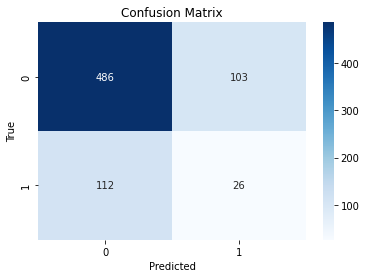

In [143]:
# Create a random baseline model
dummy = DummyClassifier(strategy="stratified")

dummy.fit(X=X_train_midend, y=y_train_midend)

# Generate random predictions
y_pred_test = dummy.predict(X_test_midend)  # Replace X_test with your test data

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_midend, y_pred_test)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_midend, y_pred_test)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_midend, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       589
           1       0.43      0.27      0.33       138

    accuracy                           0.79       727
   macro avg       0.64      0.59      0.60       727
weighted avg       0.76      0.79      0.77       727



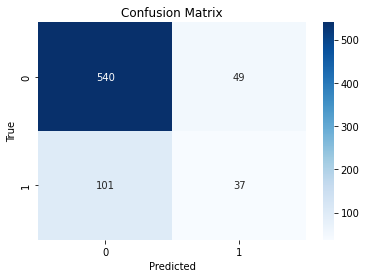

In [144]:
from sklearn.neighbors import KNeighborsClassifier

baseline_mid = KNeighborsClassifier(n_neighbors=3, weights='uniform').fit(X_train_midend, y_train_midend)

y_pred_test = baseline_mid.predict(X_test_midend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_midend, y_pred_test)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_midend, y_pred_test)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_midend, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       589
           1       0.38      0.33      0.35       138

    accuracy                           0.77       727
   macro avg       0.61      0.60      0.60       727
weighted avg       0.76      0.77      0.76       727



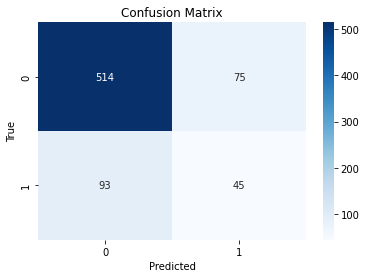

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf_midend = DecisionTreeClassifier(random_state=42, class_weight='balanced').fit(X_train_midend, y_train_midend)
y_pred_midend = clf_midend.predict(X_test_midend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_midend, y_pred_midend)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_midend, y_pred_midend)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_midend, y_pred_midend)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 3.2.3. Model Selection

Regression Model Test (Logistic Regression)

In [146]:
# Define the parameter grid for grid search
param_grid_mid = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 150, 200],
    'class_weight':['balanced', {0:1, 1:1}]
}

# Create the logistic regression model
logistic_regression_mid = LogisticRegression()

custom_cv_mid = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_mid = GridSearchCV(logistic_regression_mid, param_grid_mid, cv=custom_cv_mid, scoring='f1')
grid_search_mid.fit(X_train_midend, y_train_midend)

# Get the best parameters and the best estimator
best_params_mid = grid_search_mid.best_params_
best_model_mid = grid_search_mid.best_estimator_

In [147]:
best_model_mid

LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear')

Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.77       589
           1       0.36      0.83      0.50       138

    accuracy                           0.68       727
   macro avg       0.65      0.74      0.63       727
weighted avg       0.83      0.68      0.72       727



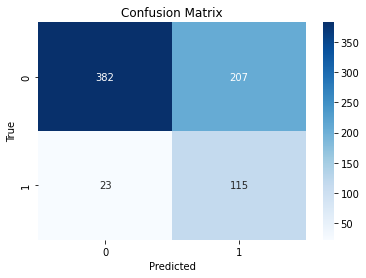

In [148]:
y_pred_mid = best_model_mid.predict(X_test_midend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_midend, y_pred_mid)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_midend, y_pred_mid)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_midend, y_pred_mid)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [118]:
X_train_midend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 4759 to 2053
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total Expense (Thou. IDR)  1694 non-null   float64
 1   Behaviour_Combination      1694 non-null   int32  
dtypes: float64(1), int32(1)
memory usage: 33.1 KB


In [119]:
# Load the Random Forest model from the pickle file
model = pickle.load(open('model_mid.pkl', 'rb'))

# Define the columns for user input
columns = ['Total Expense (Thou. IDR)','Behaviour_Combination']

# Create a function to preprocess user input and make predictions


def predict_churn(input_data):
    # Preprocess the input data
    input_df = pd.DataFrame([input_data], columns=columns)

    # Make predictions using the loaded model
    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)[:, 1]

    return prediction[0], probability[0]

input_data = {
        'Total Expense (Thou. IDR)': 496.210,
        'Behaviour_Combination': 183
        }

 # Predict churn based on user input
churn_probability = predict_churn(input_data)
churn_prediction=churn_probability[1]

In [120]:
churn_prediction

0.6988907471199639

In [121]:
churn_probability

(1, 0.6988907471199639)

Support Vector Machine Model

In [ ]:
# Define the parameter grid for grid search
param_grid_mid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear'],
    'class_weight': ['balanced', {0:1, 1:1}]
}

# Create the logistic regression model
SVC_mid = SVC()

custom_cv_mid = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_SVC_mid = GridSearchCV(SVC_mid, param_grid_mid, cv=custom_cv_mid, scoring='f1')
grid_search_SVC_mid.fit(X_train_midend, y_train_midend)

# Get the best parameters and the best estimator
best_params_SVC_mid= grid_search_SVC_mid.best_params_
best_model_SVC_mid = grid_search_SVC_mid.best_estimator_

In [ ]:
best_model_SVC_mid

In [ ]:
y_pred_mid = best_model_SVC_mid.predict(X_test_midend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_midend, y_pred_mid)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_midend, y_pred_mid)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_midend, y_pred_mid)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Tree Based Algorithm (Decision Tree --> Random Forest --> XGBoost)

In [149]:
# Define the parameter grid for grid search
param_grid_mid = {
    'min_samples_split': [2, 20, 40],
    'min_samples_leaf': [1, 10, 20],
    'max_depth': [10, None],
    'criterion': ['gini', 'log_loss', 'entropy'],
    'splitter': ['best', 'random'],
    'class_weight': ['balanced', {0:1, 1:1}]
}

# Create the logistic regression model
dtc_mid = DecisionTreeClassifier()

custom_cv_mid = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_dtc_mid = GridSearchCV(dtc_mid, param_grid_mid, cv=custom_cv_mid, scoring='f1')
grid_search_dtc_mid.fit(X_train_midend, y_train_midend)

# Get the best parameters and the best estimator
best_params_dtc_mid = grid_search_dtc_mid.best_params_
best_model_dtc_mid = grid_search_dtc_mid.best_estimator_

In [150]:
best_model_dtc_mid

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=20, min_samples_split=40,
                       splitter='random')

Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.67      0.78       589
           1       0.35      0.76      0.48       138

    accuracy                           0.69       727
   macro avg       0.64      0.72      0.63       727
weighted avg       0.81      0.69      0.72       727



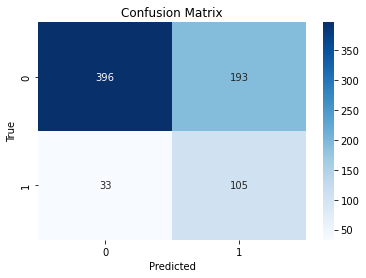

In [151]:
y_pred_mid = best_model_dtc_mid.predict(X_test_midend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_midend, y_pred_mid)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_midend, y_pred_mid)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_midend, y_pred_mid)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [152]:
# Define the parameter grid for grid search
param_grid_mid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, None],
    'min_samples_split': [2, 20, 40],
    'min_samples_leaf': [1, 10, 20],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', {0:1, 1:1}]
}

# Create the logistic regression model
rfc_mid = RandomForestClassifier()

custom_cv_mid = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_rfc_mid = GridSearchCV(rfc_mid, param_grid_mid, cv=custom_cv, scoring='f1')
grid_search_rfc_mid.fit(X_train_midend, y_train_midend)

# Get the best parameters and the best estimator
best_params_rfc_mid = grid_search_rfc_mid.best_params_
best_model_rfc_mid = grid_search_rfc_mid.best_estimator_

In [153]:
best_model_rfc_mid

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=20,
                       min_samples_split=20, n_estimators=200)

Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.74      0.82       589
           1       0.41      0.76      0.53       138

    accuracy                           0.74       727
   macro avg       0.67      0.75      0.68       727
weighted avg       0.83      0.74      0.77       727



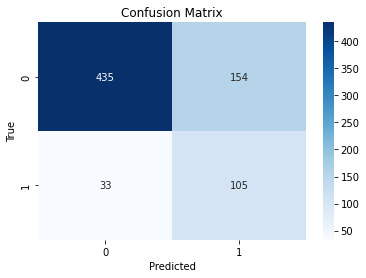

In [154]:
y_pred_mid = best_model_rfc_mid.predict(X_test_midend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_midend, y_pred_mid)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_midend, y_pred_mid)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_midend, y_pred_mid)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [174]:
class_weight_mid = sum(y_train_midend == 0) / sum(y_train_midend == 1)

In [176]:
# Define the parameter grid for grid search
param_grid_mid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, None],
    'learning_rate': [0.03, 0.3, 3],
    'gamma': [0, 1, 10],
    'scale_pos_weight': [class_weight_mid]
}

# Create the logistic regression model
xgb_mid = XGBClassifier()

custom_cv_mid = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_xgb_mid = GridSearchCV(xgb_mid, param_grid_mid, cv=custom_cv_mid, scoring='f1')
grid_search_xgb_mid.fit(X_train_midend, y_train_midend)

# Get the best parameters and the best estimator
best_params_xgb_mid = grid_search_xgb_mid.best_params_
best_model_xgb_mid = grid_search_xgb_mid.best_estimator_

In [179]:
best_model_xgb_mid

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=10, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.71      0.81       589
           1       0.38      0.76      0.51       138

    accuracy                           0.72       727
   macro avg       0.66      0.74      0.66       727
weighted avg       0.82      0.72      0.75       727



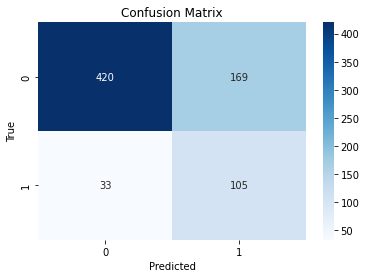

In [177]:
y_pred_mid = best_model_xgb_mid.predict(X_test_midend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_midend, y_pred_mid)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_midend, y_pred_mid)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_midend, y_pred_mid)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Neural Network Classifier

In [158]:
class_weights_mid = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train_midend)
class_weight_dict_mid = {0: class_weights_mid[0], 1: class_weights_mid[1]}

In [160]:
y_train_mid_float = np.array(y_train_midend, dtype=np.float32)

In [172]:
model_mid = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_dim=X_train_midend.shape[1]),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_mid.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[BinaryAccuracy(name='accuracy'),
                           Precision(name='precision'),
                           Recall(name='recall'),
                           F1Score(name='f1')])

# Set up early stopping
early_stopping_mid = EarlyStopping(monitor='f1', patience=100, mode='max', restore_best_weights=True)

# # Create an instance of the F1ScoreCallback
# f1_score_callback = F1ScoreCallback(validation_data=(X_test, y_test))

nn_mid_result = model_mid.fit(X_train_midend, y_train_mid_float, epochs=10000, batch_size=8, callbacks=[early_stopping_mid], class_weight=class_weight_dict_mid, validation_split=0.2)

Epoch 1/10000
170/170 [==============================] - 1s 2ms/step - loss: 1.2338 - accuracy: 0.6590 - precision: 0.3056 - recall: 0.6842 - f1: 0.3115 - val_loss: 0.4816 - val_accuracy: 0.7699 - val_precision: 0.4783 - val_recall: 0.5946 - val_f1: 0.3584
Epoch 2/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.7339 - accuracy: 0.6583 - precision: 0.3071 - recall: 0.6964 - f1: 0.3084 - val_loss: 0.5549 - val_accuracy: 0.7965 - val_precision: 0.5333 - val_recall: 0.5405 - val_f1: 0.3584
Epoch 3/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.6298 - accuracy: 0.6731 - precision: 0.3237 - recall: 0.7287 - f1: 0.3084 - val_loss: 0.6478 - val_accuracy: 0.5752 - val_precision: 0.3267 - val_recall: 0.8919 - val_f1: 0.3584
Epoch 4/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.6863 - precision: 0.3321 - recall: 0.7126 - f1: 0.3084 - val_loss: 0.5270 - val_accuracy: 0.7345 - val_precision: 0.4355 - val_reca

Epoch 33/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5554 - accuracy: 0.7535 - precision: 0.3952 - recall: 0.6640 - f1: 0.3084 - val_loss: 0.5173 - val_accuracy: 0.7375 - val_precision: 0.4299 - val_recall: 0.6216 - val_f1: 0.3584
Epoch 34/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.7380 - precision: 0.3805 - recall: 0.6964 - f1: 0.3084 - val_loss: 0.5699 - val_accuracy: 0.7227 - val_precision: 0.4219 - val_recall: 0.7297 - val_f1: 0.3584
Epoch 35/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.7373 - precision: 0.3802 - recall: 0.7004 - f1: 0.3084 - val_loss: 0.5407 - val_accuracy: 0.7404 - val_precision: 0.4364 - val_recall: 0.6486 - val_f1: 0.3584
Epoch 36/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5483 - accuracy: 0.7594 - precision: 0.4029 - recall: 0.6640 - f1: 0.3084 - val_loss: 0.6140 - val_accuracy: 0.7021 - val_precision: 0.4000 - val_

Epoch 65/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.7461 - precision: 0.3925 - recall: 0.7166 - f1: 0.3084 - val_loss: 0.5319 - val_accuracy: 0.7699 - val_precision: 0.4787 - val_recall: 0.6081 - val_f1: 0.3584
Epoch 66/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7646 - precision: 0.4109 - recall: 0.6721 - f1: 0.3084 - val_loss: 0.5673 - val_accuracy: 0.7375 - val_precision: 0.4312 - val_recall: 0.6351 - val_f1: 0.3584
Epoch 67/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5431 - accuracy: 0.7594 - precision: 0.4048 - recall: 0.6802 - f1: 0.3084 - val_loss: 0.5558 - val_accuracy: 0.7404 - val_precision: 0.4340 - val_recall: 0.6216 - val_f1: 0.3584
Epoch 68/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5428 - accuracy: 0.7506 - precision: 0.3929 - recall: 0.6761 - f1: 0.3084 - val_loss: 0.5056 - val_accuracy: 0.7699 - val_precision: 0.4787 - val_

Epoch 97/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5403 - accuracy: 0.7557 - precision: 0.3995 - recall: 0.6761 - f1: 0.3084 - val_loss: 0.5094 - val_accuracy: 0.7699 - val_precision: 0.4787 - val_recall: 0.6081 - val_f1: 0.3584
Epoch 98/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5439 - accuracy: 0.7720 - precision: 0.4197 - recall: 0.6559 - f1: 0.3084 - val_loss: 0.5175 - val_accuracy: 0.7640 - val_precision: 0.4688 - val_recall: 0.6081 - val_f1: 0.3584
Epoch 99/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.7469 - precision: 0.3899 - recall: 0.6883 - f1: 0.3084 - val_loss: 0.5230 - val_accuracy: 0.7699 - val_precision: 0.4787 - val_recall: 0.6081 - val_f1: 0.3584
Epoch 100/10000
170/170 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.7550 - precision: 0.3971 - recall: 0.6640 - f1: 0.3084 - val_loss: 0.5392 - val_accuracy: 0.7463 - val_precision: 0.4423 - val

23/23 [==============================] - 0s 637us/step
Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86       589
           1       0.45      0.65      0.53       138

    accuracy                           0.78       727
   macro avg       0.68      0.73      0.70       727
weighted avg       0.82      0.78      0.80       727



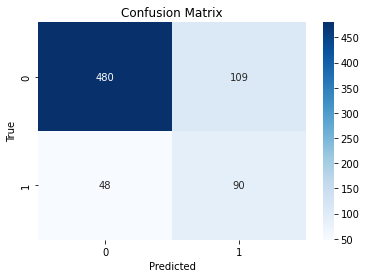

In [173]:
y_pred_mid = (model_mid.predict(X_test_midend) > 0.5).astype(int)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_midend, y_pred_mid)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_midend, y_pred_mid)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_midend, y_pred_mid)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 3.2.3. Model Classification Analysis

Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.64      0.76      1962
           1       0.35      0.80      0.48       459

    accuracy                           0.67      2421
   macro avg       0.64      0.72      0.62      2421
weighted avg       0.82      0.67      0.71      2421



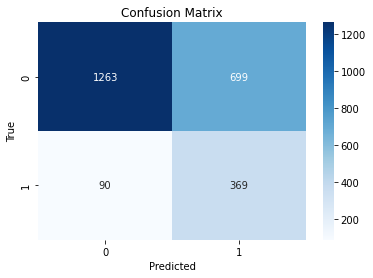

In [180]:
y_pred_mid = best_model_mid.predict(X_midend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_midend, y_pred_mid)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_midend, y_pred_mid)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_midend, y_pred_mid)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [181]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_midend, y_pred_mid)

# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Create a DataFrame with additional columns
data = {'Actual': y_midend, 'Predicted': y_pred_mid, 'Result': ['TP' if (a, p) == (1, 1) else 'TN' if (a, p) == (0, 0)
                                                           else 'FP' if (a, p) == (0, 1) else 'FN' for a, p in zip(y_midend, y_pred_mid)]}

predictions_midend = pd.DataFrame(data)

In [183]:
midend.reset_index(inplace=True)

In [184]:
midend['Result'] = predictions_midend['Result']

<ipython-input-184-ebb0225fc04f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midend['Result'] = predictions_midend['Result']


In [186]:
y_pred_mid_prob = best_model_mid.predict_proba(X_midend)
max_probabilities_mid = np.max(y_pred_mid_prob, axis=1)
midend['prediction_confidence'] = max_probabilities_mid

<ipython-input-186-3d1c8e2ed8e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midend['prediction_confidence'] = max_probabilities_mid


In [188]:
midend['prediction'] = y_pred_mid

<ipython-input-188-3715e04f74ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midend['prediction'] = y_pred_mid


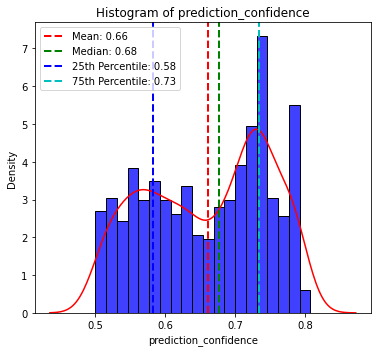

In [189]:
plot_multiple_histograms(midend[midend['prediction'] == 1], ['prediction_confidence'])

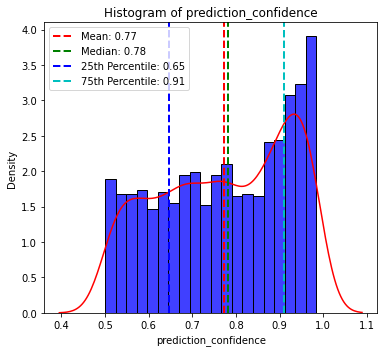

In [190]:
plot_multiple_histograms(midend[midend['prediction'] == 0], ['prediction_confidence'])

In [191]:
midend['Churn_Risk'] = pd.cut(midend['prediction_confidence'][midend['prediction'] == 1], bins=[0.5, 0.58, 1], labels=['Notable', 'Threatening'])
cut_result = pd.cut(midend['prediction_confidence'][midend['prediction'] == 0], bins=[0.5, 0.91, 1], labels=['Low', 'Least Concern'])
midend['Churn_Risk'] = midend['Churn_Risk'].astype('object')
midend.loc[midend.index.isin(cut_result.index), 'Churn_Risk'] = cut_result

<ipython-input-191-6d217283cae7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midend['Churn_Risk'] = pd.cut(midend['prediction_confidence'][midend['prediction'] == 1], bins=[0.5, 0.58, 1], labels=['Notable', 'Threatening'])
<ipython-input-191-6d217283cae7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midend['Churn_Risk'] = midend['Churn_Risk'].astype('object')


In [193]:
midend = calculate_customer_value(midend)

<ipython-input-131-0b5ad0e64177>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_priority'] = df.apply(lambda row: row['CLTV (Predicted Thou. IDR)'] * (1 - row['prediction_confidence']) if row['prediction'] == 0 else row['CLTV (Predicted Thou. IDR)'] * row['prediction_confidence'], axis=1)
<ipython-input-131-0b5ad0e64177>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_priority'] = scaler.fit_transform(customer_priority)
<ipython-input-131-0b5ad0e64177>:11: SettingWithCopyWarning

#### 3.3. Modelling for High End Devices

#### 3.3.1. Feature Selection / Feature Engineering / Preprocessing

In [122]:
highend[['Tenure Months', 'Monthly Purchase (Thou. IDR)']].corr()

Tenure Months  Monthly Purchase (Thou. IDR)
Tenure Months                      1.000000                      0.624621
Monthly Purchase (Thou. IDR)       0.624621                      1.000000

In [123]:
highend['Total Expense (Thou. IDR)'] = highend['Tenure Months'] * highend['Monthly Purchase (Thou. IDR)']

C:\Users\luthf\AppData\Local\Temp\ipykernel_30724\868854020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highend['Total Expense (Thou. IDR)'] = highend['Tenure Months'] * highend['Monthly Purchase (Thou. IDR)']


In [124]:
# Define the binary and multiclass columns
binary_columns = ['Games Product', 'Music Product', 'Education Product', 'Video Product', 'Use MyApp', 'Call Center']
multiclass_column = 'Payment Method'

# Apply the function to label unique combinations
highend = label_unique_combinations(highend, binary_columns, multiclass_column)

C:\Users\luthf\AppData\Local\Temp\ipykernel_30724\2553384898.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Behaviour_Combination'] = ''


In [125]:
X_highend = highend[['Total Expense (Thou. IDR)', 'Behaviour_Combination']]
y_highend = highend['Churn Label']

In [129]:
X_highend

Total Expense (Thou. IDR)  Behaviour_Combination
1                       183.820                      0
2                      1036.360                    111
3                      3814.720                    163
4                      6605.690                    174
8                      6070.285                    185
...                         ...                    ...
7029                   2224.170                     64
7035                   3433.300                    183
7036                   1943.890                    177
7040                   9659.520                    224
7042                   9064.770                      5

[3096 rows x 2 columns]

In [126]:
X_highend['Behaviour_Combination'] = LabelEncoder().fit_transform(X_highend['Behaviour_Combination'])
y_highend = LabelEncoder().fit_transform(highend['Churn Label'])

C:\Users\luthf\AppData\Local\Temp\ipykernel_30724\1126380023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_highend['Behaviour_Combination'] = LabelEncoder().fit_transform(X_highend['Behaviour_Combination'])


In [127]:
X_train_highend, X_test_highend, y_train_highend, y_test_highend = train_test_split(X_highend, y_highend, test_size=0.3, random_state=42, stratify=y_highend)

#### 3.3.2. Baseline Testing

Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57       540
           1       0.40      0.40      0.40       389

    accuracy                           0.50       929
   macro avg       0.49      0.49      0.49       929
weighted avg       0.50      0.50      0.50       929



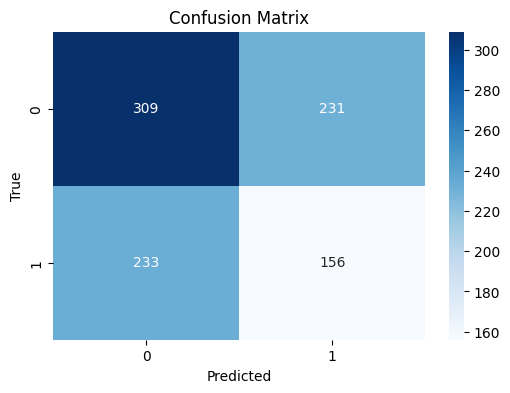

In [128]:
# Create a random baseline model
dummy = DummyClassifier(strategy="stratified")

dummy.fit(X=X_train_highend, y=y_train_highend)

# Generate random predictions
y_pred_test = dummy.predict(X_test_highend)  # Replace X_test with your test data

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_highend, y_pred_test)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_highend, y_pred_test)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_highend, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.63
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       540
           1       0.56      0.57      0.56       389

    accuracy                           0.63       929
   macro avg       0.62      0.62      0.62       929
weighted avg       0.63      0.63      0.63       929



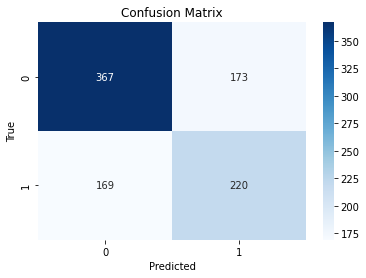

In [218]:
baseline_high = KNeighborsClassifier(n_neighbors=3, weights='uniform').fit(X_train_highend, y_train_highend)

y_pred_test = baseline_high.predict(X_test_highend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_highend, y_pred_test)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_highend, y_pred_test)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_highend, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.63
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       540
           1       0.56      0.56      0.56       389

    accuracy                           0.63       929
   macro avg       0.62      0.62      0.62       929
weighted avg       0.63      0.63      0.63       929



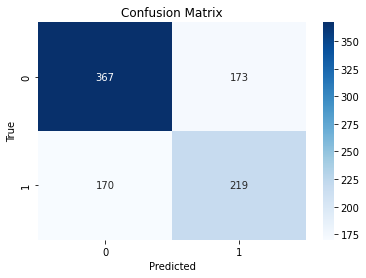

In [219]:
clf_highend = DecisionTreeClassifier(random_state=42, class_weight='balanced').fit(X_train_highend, y_train_highend)
y_pred_highend = clf_highend.predict(X_test_highend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_highend, y_pred_highend)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_highend, y_pred_highend)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_highend, y_pred_highend)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 3.3.3. Model Selection

Regression Model

In [246]:
# Define the parameter grid for grid search
param_grid_high = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 150, 200],
    'class_weight':['balanced', {0:1, 1:1}]
}

# Create the logistic regression model
logistic_regression_high = LogisticRegression()

custom_cv_high = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_high = GridSearchCV(logistic_regression_high, param_grid_high, cv=custom_cv_high, scoring='f1')
grid_search_high.fit(X_train_highend, y_train_highend)

# Get the best parameters and the best estimator
best_params_high = grid_search_high.best_params_
best_model_high = grid_search_high.best_estimator_

In [247]:
best_model_high

LogisticRegression(C=0.001, class_weight='balanced')

Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70       540
           1       0.60      0.75      0.67       389

    accuracy                           0.68       929
   macro avg       0.69      0.69      0.68       929
weighted avg       0.70      0.68      0.69       929



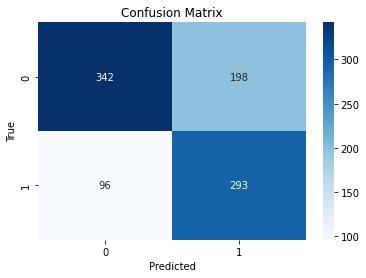

In [248]:
y_pred_high = best_model_high.predict(X_test_highend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_highend, y_pred_high)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_highend, y_pred_high)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_highend, y_pred_high)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [130]:
# Load the Random Forest model from the pickle file
model = pickle.load(open('model_high.pkl', 'rb'))

# Define the columns for user input
columns = ['Total Expense (Thou. IDR)','Behaviour_Combination']

# Create a function to preprocess user input and make predictions


def predict_churn(input_data):
    # Preprocess the input data
    input_df = pd.DataFrame([input_data], columns=columns)

    # Make predictions using the loaded model
    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)[:, 1]

    return prediction[0], probability[0]

input_data = {
        'Total Expense (Thou. IDR)': 496.210,
        'Behaviour_Combination': 183
        }

 # Predict churn based on user input
churn_probability = predict_churn(input_data)
churn_prediction=churn_probability[1]

In [131]:
churn_probability

(1, 0.7505955577576773)

In [132]:
churn_prediction

0.7505955577576773

Tree Based Algorithm (Decision Tree --> Random Forest --> XGBoost)

In [229]:
# Define the parameter grid for grid search
param_grid_high = {
    'min_samples_split': [2, 20, 40],
    'min_samples_leaf': [1, 10, 20],
    'max_depth': [10, None],
    'criterion': ['gini', 'log_loss', 'entropy'],
    'splitter': ['best', 'random'],
    'class_weight': ['balanced', {0:1, 1:1}]
}

# Create the logistic regression model
dtc_high = DecisionTreeClassifier()

custom_cv_high = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_dtc_high = GridSearchCV(dtc_high, param_grid_high, cv=custom_cv_high, scoring='f1')
grid_search_dtc_high.fit(X_train_highend, y_train_highend)

# Get the best parameters and the best estimator
best_params_dtc_high = grid_search_dtc_high.best_params_
best_model_dtc_high = grid_search_dtc_high.best_estimator_

In [230]:
best_model_dtc_high

DecisionTreeClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, min_samples_leaf=20, min_samples_split=40,
                       splitter='random')

Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.70      0.73       540
           1       0.62      0.69      0.65       389

    accuracy                           0.70       929
   macro avg       0.69      0.69      0.69       929
weighted avg       0.70      0.70      0.70       929



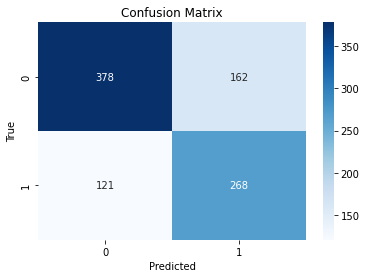

In [231]:
y_pred_high = best_model_dtc_high.predict(X_test_highend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_highend, y_pred_high)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_highend, y_pred_high)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_highend, y_pred_high)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [232]:
# Define the parameter grid for grid search
param_grid_high = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, None],
    'min_samples_split': [2, 20, 40],
    'min_samples_leaf': [1, 10, 20],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', {0:1, 1:1}]
}

# Create the logistic regression model
rfc_high = RandomForestClassifier()

custom_cv_high = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_rfc_high = GridSearchCV(rfc_high, param_grid_high, cv=custom_cv_high, scoring='f1')
grid_search_rfc_high.fit(X_train_highend, y_train_highend)

# Get the best parameters and the best estimator
best_params_rfc_high = grid_search_rfc_high.best_params_
best_model_rfc_high = grid_search_rfc_high.best_estimator_

In [233]:
best_model_rfc_high

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=20,
                       min_samples_split=40, n_estimators=300)

Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       540
           1       0.62      0.71      0.66       389

    accuracy                           0.69       929
   macro avg       0.69      0.70      0.69       929
weighted avg       0.70      0.69      0.70       929



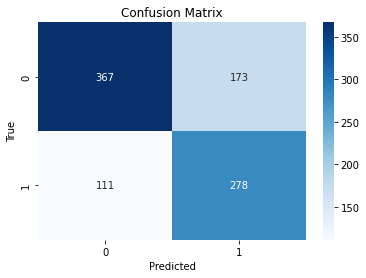

In [234]:
y_pred_high = best_model_rfc_high.predict(X_test_highend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_highend, y_pred_high)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_highend, y_pred_high)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_highend, y_pred_high)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [235]:
class_weight_high = sum(y_train_highend == 0) / sum(y_train_highend == 1)

In [237]:
# Define the parameter grid for grid search
param_grid_high = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, None],
    'learning_rate': [0.03, 0.3, 3],
    'gamma': [0, 1, 10],
    'scale_pos_weight': [class_weight_high]
}

# Create the logistic regression model
xgb_high = XGBClassifier()

custom_cv_high = StratifiedKFold(n_splits=5, shuffle=False)

# Perform grid search with cross-validation
grid_search_xgb_high = GridSearchCV(xgb_high, param_grid_high, cv=custom_cv_high, scoring='f1')
grid_search_xgb_high.fit(X_train_highend, y_train_highend)

# Get the best parameters and the best estimator
best_params_xgb_high = grid_search_xgb_high.best_params_
best_model_xgb_high = grid_search_xgb_high.best_estimator_

In [238]:
best_model_xgb_high

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.66
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69       540
           1       0.58      0.70      0.63       389

    accuracy                           0.66       929
   macro avg       0.66      0.67      0.66       929
weighted avg       0.68      0.66      0.67       929



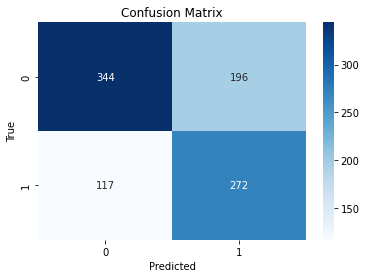

In [239]:
y_pred_high = best_model_xgb_high.predict(X_test_highend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_highend, y_pred_high)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_highend, y_pred_high)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_highend, y_pred_high)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Neural Network Classifier

In [240]:
class_weights_high = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train_highend)
class_weight_dict_high = {0: class_weights_high[0], 1: class_weights_high[1]}

In [242]:
y_train_high_float = np.array(y_train_highend, dtype=np.float32)

In [245]:
model_high = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_high.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[BinaryAccuracy(name='accuracy'),
                           Precision(name='precision'),
                           Recall(name='recall'),
                           F1Score(name='f1')])

# Set up early stopping
early_stopping_high = EarlyStopping(monitor='f1', patience=100, mode='max', restore_best_weights=True)

# # Create an instance of the F1ScoreCallback
# f1_score_callback = F1ScoreCallback(validation_data=(X_test, y_test))

nn_high_result = model_high.fit(X_train_highend, y_train_high_float, epochs=10000, batch_size=8, callbacks=[early_stopping_high], class_weight=class_weight_dict_high, validation_split=0.2)

Epoch 1/10000
217/217 [==============================] - 1s 2ms/step - loss: 1.0094 - accuracy: 0.6365 - precision: 0.5518 - recall: 0.5938 - f1: 0.5797 - val_loss: 0.7216 - val_accuracy: 0.6567 - val_precision: 0.6838 - val_recall: 0.4673 - val_f1: 0.6288
Epoch 2/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.6561 - precision: 0.5690 - recall: 0.6573 - f1: 0.5807 - val_loss: 0.6188 - val_accuracy: 0.6659 - val_precision: 0.6227 - val_recall: 0.6884 - val_f1: 0.6288
Epoch 3/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.6514 - accuracy: 0.6619 - precision: 0.5726 - recall: 0.6841 - f1: 0.5807 - val_loss: 0.6014 - val_accuracy: 0.6521 - val_precision: 0.6364 - val_recall: 0.5628 - val_f1: 0.6288
Epoch 4/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.6780 - precision: 0.5896 - recall: 0.7010 - f1: 0.5807 - val_loss: 0.6224 - val_accuracy: 0.6544 - val_precision: 0.6269 - val_reca

Epoch 33/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.5997 - accuracy: 0.6913 - precision: 0.6133 - recall: 0.6643 - f1: 0.5807 - val_loss: 0.6017 - val_accuracy: 0.6544 - val_precision: 0.6400 - val_recall: 0.5628 - val_f1: 0.6288
Epoch 34/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.6009 - accuracy: 0.6855 - precision: 0.6012 - recall: 0.6869 - f1: 0.5807 - val_loss: 0.6168 - val_accuracy: 0.6544 - val_precision: 0.6161 - val_recall: 0.6533 - val_f1: 0.6288
Epoch 35/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.6953 - precision: 0.6165 - recall: 0.6756 - f1: 0.5807 - val_loss: 0.6101 - val_accuracy: 0.6659 - val_precision: 0.6364 - val_recall: 0.6332 - val_f1: 0.6288
Epoch 36/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.6988 - precision: 0.6242 - recall: 0.6629 - f1: 0.5807 - val_loss: 0.6706 - val_accuracy: 0.6290 - val_precision: 0.5613 - val_

Epoch 65/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.5933 - accuracy: 0.6947 - precision: 0.6136 - recall: 0.6855 - f1: 0.5807 - val_loss: 0.5996 - val_accuracy: 0.6498 - val_precision: 0.6313 - val_recall: 0.5678 - val_f1: 0.6288
Epoch 66/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.6953 - precision: 0.6183 - recall: 0.6671 - f1: 0.5807 - val_loss: 0.6036 - val_accuracy: 0.6636 - val_precision: 0.6626 - val_recall: 0.5427 - val_f1: 0.6288
Epoch 67/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.6901 - precision: 0.6108 - recall: 0.6685 - f1: 0.5807 - val_loss: 0.6016 - val_accuracy: 0.6521 - val_precision: 0.6348 - val_recall: 0.5678 - val_f1: 0.6288
Epoch 68/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.5912 - accuracy: 0.6901 - precision: 0.6089 - recall: 0.6784 - f1: 0.5807 - val_loss: 0.6010 - val_accuracy: 0.6567 - val_precision: 0.6453 - val_

Epoch 97/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.6872 - precision: 0.6030 - recall: 0.6897 - f1: 0.5807 - val_loss: 0.6006 - val_accuracy: 0.6590 - val_precision: 0.6308 - val_recall: 0.6181 - val_f1: 0.6288
Epoch 98/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.6999 - precision: 0.6226 - recall: 0.6770 - f1: 0.5807 - val_loss: 0.6013 - val_accuracy: 0.6567 - val_precision: 0.6437 - val_recall: 0.5628 - val_f1: 0.6288
Epoch 99/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.7017 - precision: 0.6277 - recall: 0.6657 - f1: 0.5807 - val_loss: 0.6035 - val_accuracy: 0.6636 - val_precision: 0.6359 - val_recall: 0.6231 - val_f1: 0.6288
Epoch 100/10000
217/217 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.7046 - precision: 0.6274 - recall: 0.6841 - f1: 0.5807 - val_loss: 0.6072 - val_accuracy: 0.6613 - val_precision: 0.6548 - val

30/30 [==============================] - 0s 621us/step
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71       540
           1       0.60      0.71      0.65       389

    accuracy                           0.68       929
   macro avg       0.68      0.69      0.68       929
weighted avg       0.69      0.68      0.68       929



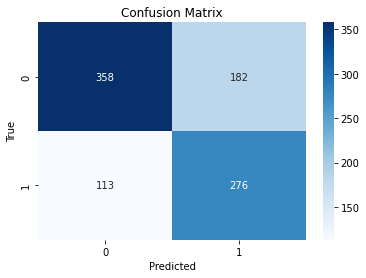

In [249]:
y_pred_high = (model_high.predict(X_test_highend) > 0.5).astype(int)

# Evaluate the random baseline model
accuracy = accuracy_score(y_test_highend, y_pred_high)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_test_highend, y_pred_high)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_highend, y_pred_high)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 3.3.3. Model Classification Analysis

Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70      1799
           1       0.60      0.75      0.67      1297

    accuracy                           0.68      3096
   macro avg       0.69      0.69      0.68      3096
weighted avg       0.70      0.68      0.69      3096



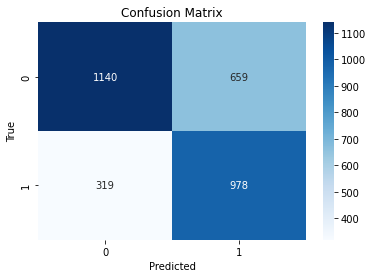

In [250]:
y_pred_high = best_model_high.predict(X_highend)

# Evaluate the random baseline model
accuracy = accuracy_score(y_highend, y_pred_high)  # Replace y_test with your true labels
print(f"Accuracy: {accuracy:.2f}")

# You can also generate classification reports if you have multiple classes
report = classification_report(y_highend, y_pred_high)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_highend, y_pred_high)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [251]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_highend, y_pred_high)

# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Create a DataFrame with additional columns
data = {'Actual': y_highend, 'Predicted': y_pred_high, 'Result': ['TP' if (a, p) == (1, 1) else 'TN' if (a, p) == (0, 0)
                                                           else 'FP' if (a, p) == (0, 1) else 'FN' for a, p in zip(y_highend, y_pred_high)]}

predictions_highend = pd.DataFrame(data)

In [253]:
highend.reset_index(inplace=True)

In [254]:
highend['Result'] = predictions_highend['Result']

<ipython-input-254-9bc307a3d2b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highend['Result'] = predictions_highend['Result']


In [255]:
y_pred_high_prob = best_model_high.predict_proba(X_highend)
max_probabilities_high = np.max(y_pred_high_prob, axis=1)
highend['prediction_confidence'] = max_probabilities_high

<ipython-input-255-9f22958fdb4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highend['prediction_confidence'] = max_probabilities_high


In [257]:
highend['prediction'] = y_pred_high

<ipython-input-257-d3161b91b5d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highend['prediction'] = y_pred_high


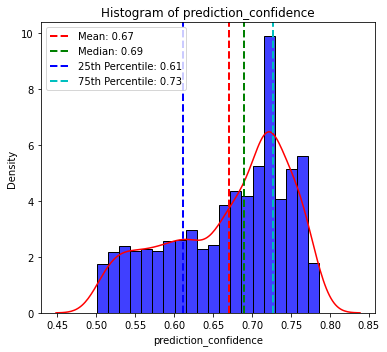

In [259]:
plot_multiple_histograms(highend[highend['prediction'] == 1], ['prediction_confidence'])

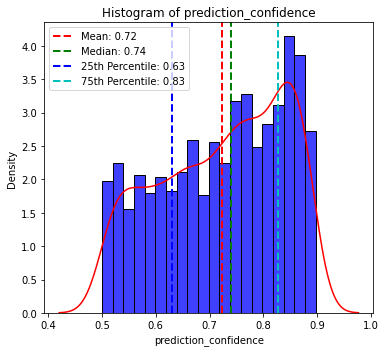

In [260]:
plot_multiple_histograms(highend[highend['prediction'] == 0], ['prediction_confidence'])

In [261]:
highend['Churn_Risk'] = pd.cut(highend['prediction_confidence'][highend['prediction'] == 1], bins=[0.5, 0.61, 1], labels=['Notable', 'Threatening'])
cut_result = pd.cut(highend['prediction_confidence'][highend['prediction'] == 0], bins=[0.5, 0.83, 1], labels=['Low', 'Least Concern'])
highend['Churn_Risk'] = highend['Churn_Risk'].astype('object')
highend.loc[highend.index.isin(cut_result.index), 'Churn_Risk'] = cut_result

<ipython-input-261-8ed1ce8385d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highend['Churn_Risk'] = pd.cut(highend['prediction_confidence'][highend['prediction'] == 1], bins=[0.5, 0.61, 1], labels=['Notable', 'Threatening'])
<ipython-input-261-8ed1ce8385d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highend['Churn_Risk'] = highend['Churn_Risk'].astype('object')


In [262]:
highend

index  Customer ID  Tenure Months Location Device Class Games Product  \
0         1            1              2  Jakarta     High End            No   
1         2            2              8  Jakarta     High End            No   
2         3            3             28  Jakarta     High End            No   
3         4            4             49  Jakarta     High End            No   
4         8            8             47  Jakarta     High End            No   
...     ...          ...            ...      ...          ...           ...   
3091   7029         7029             18  Jakarta     High End            No   
3092   7035         7035             38  Jakarta     High End            No   
3093   7036         7036             19  Jakarta     High End            No   
3094   7040         7040             72  Jakarta     High End            No   
3095   7042         7042             66  Jakarta     High End           Yes   

     Music Product Education Product Call Center Video Product  ...  \
0               No                No          No            No  ...   
1               No               Yes          No           Yes  ...   
2               No               Yes         Yes           Yes  ...   
3              Yes               Yes          No           Yes  ...   
4              Yes                No          No           Yes  ...   
...            ...               ...         ...           ...  ...   
3091            No               Yes         Yes            No  ...   
3092            No                No          No            No  ...   
3093            No                No          No           Yes  ...   
3094           Yes               Yes          No           Yes  ...   
3095            No               Yes         Yes           Yes  ...   

       Longitude Latitude  CLTV (Predicted Thou. IDR)     Combination  \
0     106.816666     -6.2                      3511.3   Combination 2   
1     106.816666     -6.2                      6983.6   Combination 3   
2     106.816666     -6.2                      6503.9   Combination 3   
3     106.816666     -6.2                      6942.0   Combination 4   
4     106.816666     -6.2                      7525.7   Combination 7   
...          ...      ...                         ...             ...   
3091  106.816666     -6.2                      5881.2   Combination 5   
3092  106.816666     -6.2                      5968.3   Combination 2   
3093  106.816666     -6.2                      3203.2   Combination 9   
3094  106.816666     -6.2                      7228.0   Combination 4   
3095  106.816666     -6.2                      6626.1  Combination 15   

      Total Expense (Thou. IDR)  Behaviour_Combination  Result  \
0                       183.820          Combination 1      TP   
1                      1036.360          Combination 2      TP   
2                      3814.720          Combination 3      TP   
3                      6605.690          Combination 4      FN   
4                      6070.285          Combination 5      FN   
...                         ...                    ...     ...   
3091                   2224.170        Combination 157      FP   
3092                   3433.300         Combination 48      FP   
3093                   1943.890         Combination 42      FP   
3094                   9659.520         Combination 85      TN   
3095                   9064.770        Combination 103      TN   

     prediction_confidence  prediction     Churn_Risk  
0                 0.717234           1    Threatening  
1                 0.696731           1    Threatening  
2                 0.514502           1        Notable  
3                 0.685529           0            Low  
4                 0.645560           0            Low  
...                    ...         ...            ...  
3091              0.598724           1        Notable  
3092              0.550767           1        Notable  
3093              0.657106    

In [263]:
highend = calculate_customer_value(highend)

<ipython-input-131-0b5ad0e64177>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_priority'] = df.apply(lambda row: row['CLTV (Predicted Thou. IDR)'] * (1 - row['prediction_confidence']) if row['prediction'] == 0 else row['CLTV (Predicted Thou. IDR)'] * row['prediction_confidence'], axis=1)
<ipython-input-131-0b5ad0e64177>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_priority'] = scaler.fit_transform(customer_priority)
<ipython-input-131-0b5ad0e64177>:11: SettingWithCopyWarning

In [265]:
highend.to_excel('highend_result.xlsx')
midend.to_excel('midend_result.xlsx')
lowend.to_excel('lowend_result.xlsx')

<ipython-input-265-7e60c76221b3>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  highend.to_excel('highend_result.xlsx')
<ipython-input-265-7e60c76221b3>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  midend.to_excel('midend_result.xlsx')
<ipython-input-265-7e60c76221b3>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  lowend.to_excel('lowend_result.xlsx')


In [266]:
highend

index  Customer ID  Tenure Months Location Device Class Games Product  \
0         1            1              2  Jakarta     High End            No   
1         2            2              8  Jakarta     High End            No   
2         3            3             28  Jakarta     High End            No   
3         4            4             49  Jakarta     High End            No   
4         8            8             47  Jakarta     High End            No   
...     ...          ...            ...      ...          ...           ...   
3091   7029         7029             18  Jakarta     High End            No   
3092   7035         7035             38  Jakarta     High End            No   
3093   7036         7036             19  Jakarta     High End            No   
3094   7040         7040             72  Jakarta     High End            No   
3095   7042         7042             66  Jakarta     High End           Yes   

     Music Product Education Product Call Center Video Product  ... Latitude  \
0               No                No          No            No  ...     -6.2   
1               No               Yes          No           Yes  ...     -6.2   
2               No               Yes         Yes           Yes  ...     -6.2   
3              Yes               Yes          No           Yes  ...     -6.2   
4              Yes                No          No           Yes  ...     -6.2   
...            ...               ...         ...           ...  ...      ...   
3091            No               Yes         Yes            No  ...     -6.2   
3092            No                No          No            No  ...     -6.2   
3093            No                No          No           Yes  ...     -6.2   
3094           Yes               Yes          No           Yes  ...     -6.2   
3095            No               Yes         Yes           Yes  ...     -6.2   

     CLTV (Predicted Thou. IDR)     Combination Total Expense (Thou. IDR)  \
0                        3511.3   Combination 2                   183.820   
1                        6983.6   Combination 3                  1036.360   
2                        6503.9   Combination 3                  3814.720   
3                        6942.0   Combination 4                  6605.690   
4                        7525.7   Combination 7                  6070.285   
...                         ...             ...                       ...   
3091                     5881.2   Combination 5                  2224.170   
3092                     5968.3   Combination 2                  3433.300   
3093                     3203.2   Combination 9                  1943.890   
3094                     7228.0   Combination 4                  9659.520   
3095                     6626.1  Combination 15                  9064.770   

      Behaviour_Combination  Result  prediction_confidence prediction  \
0             Combination 1      TP               0.717234          1   
1             Combination 2      TP               0.696731          1   
2             Combination 3      TP               0.514502          1   
3             Combination 4      FN               0.685529          0   
4             Combination 5      FN               0.645560          0   
...                     ...     ...                    ...        ...   
3091        Combination 157      FP               0.598724          1   
3092         Combination 48      FP               0.550767          1   
3093         Combination 42      FP               0.657106          1   
3094         Combination 85      TN               0.837561          0   
3095        Combination 103      TN               0.855363          0   

         Churn_Risk customer_priority  
0       Threatening          Moderate  
1       Threatening              High  
2           Notable          Moderate  
3               Low          Moderate  
4               Low          Moderate  
...             ...               ...  
3091        No

MODEL SAVE

In [272]:
import pickle

with open("model_low.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [273]:
with open("model_mid.pkl", "wb") as f:
    pickle.dump(best_model_mid, f)

In [274]:
with open("model_high.pkl", "wb") as f:
    pickle.dump(best_model_high, f)

In [277]:
def label_combinations(binary_values, multiclass_value, unique_combinations, label_counter):
    combination = tuple(binary_values + [multiclass_value])

    if combination not in unique_combinations:
        unique_combinations[combination] = f'Combination {label_counter}'
        label_counter += 1

    return unique_combinations[combination], label_counter

def label_combinations_for_input(df, binary_columns, multiclass_column):
    unique_combinations = {}
    label_counter = 1

    df['Behaviour_Combination'] = ''

    for index, row in df.iterrows():
        binary_values = [row[col] for col in binary_columns]
        multiclass_value = row[multiclass_column]

        label, label_counter = label_combinations(binary_values, multiclass_value, unique_combinations, label_counter)

        df.at[index, 'Behaviour_Combination'] = label

    return df